In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df =pd.read_csv('/content/Cleaned_ECommerce_Dataset.csv')
df.head()

event_time event_type  product_id   category_id    price  \
0  2019-11-04 23:49:00 UTC       cart    28528365  2.050000e+18   832.45   
1  2019-11-04 23:52:00 UTC       view     5768311  2.050000e+18    15.09   
2  2019-11-04 23:56:00 UTC       view    41729464  2.050000e+18    11.60   
3  2019-11-05 00:00:00 UTC       view    19631561  2.050000e+18  1076.02   
4  2019-11-05 00:02:00 UTC       cart    64237043  2.050000e+18   731.52   

     user_id                          user_session  Gender  Age      City  \
0  100000047  001cfc05-5a28-4114-9ea2-5af70661cab0  Female   36  New York   
1  100000047  001cfc05-5a28-4114-9ea2-5af70661cab0  Female   36     Miami   
2  100000047  001cfc05-5a28-4114-9ea2-5af70661cab0  Female   36     Miami   
3  100000047  001cfc05-5a28-4114-9ea2-5af70661cab0  Female   36   Houston   
4  100000047  001cfc05-5a28-4114-9ea2-5af70661cab0  Female   36   Houston   

  Membership Type  Items Purchased  Average Rating  Discount Applied  \
0          Bronze                8             3.0                 0   
1          Bronze                8             3.0                 0   
2          Bronze                8             3.0                 0   
3          Bronze                8             3.0                 0   
4          Bronze                8             3.0                 0   

   Days Since Last Purchase Satisfaction Level  Total Spend    brand  \
0                        18            Neutral     10318.79  Samsung   
1                        18            Neutral     10318.79     Ikea   
2                        18            Neutral     10318.79    Bosch   
3                        18            Neutral     10318.79     Etor   
4                        18            Neutral     10318.79     Ikea   

                      category_code  
0              Electronics.Consumer  
1                    Home.Furniture  
2  Automotive.Parts.Home.Appliances  
3                  Fashion.Footwear  
4                    Home.Furniture

In [ ]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id', 'price',
       'user_id', 'user_session', 'Gender', 'Age', 'City', 'Membership Type',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level', 'Total Spend',
       'brand', 'category_code'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10604 entries, 0 to 10603
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   event_time                10604 non-null  object 
 1   event_type                10604 non-null  object 
 2   product_id                10604 non-null  int64  
 3   category_id               10604 non-null  float64
 4   price                     10604 non-null  float64
 5   user_id                   10604 non-null  int64  
 6   user_session              10604 non-null  object 
 7   Gender                    10604 non-null  object 
 8   Age                       10604 non-null  int64  
 9   City                      10604 non-null  object 
 10  Membership Type           10604 non-null  object 
 11  Items Purchased           10604 non-null  int64  
 12  Average Rating            10604 non-null  float64
 13  Discount Applied          10604 non-null  int64  
 14  Days S

In [ ]:
df.isna().sum()

event_time                  0
event_type                  0
product_id                  0
category_id                 0
price                       0
user_id                     0
user_session                0
Gender                      0
Age                         0
City                        0
Membership Type             0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
Total Spend                 0
brand                       0
category_code               0
dtype: int64

In [ ]:
df['event_type'].unique()

array(['cart', 'view', 'purchase'], dtype=object)

In [ ]:
df['category_code'].unique()

array(['Electronics.Consumer', 'Home.Furniture',
       'Automotive.Parts.Home.Appliances', 'Fashion.Footwear',
       'Publishing.Books.Fashion', 'Fashion.Menswear',
       'Electronics.Entertainment', 'Electronics.Wearables.Fitness',
       'Beauty.Cosmetics', 'Fashion.Lifestyle',
       'Fashion.Footwear.electronics.smartphone', 'Fashion.Watches',
       'Fashion.Jewelry.Lighting', 'Fashion.Jewelry.apparel.shoes',
       'Fashion.Jewelry.Apparel'], dtype=object)

In [ ]:
df['brand'].unique()

array(['Samsung', 'Ikea', 'Bosch', 'Etor', 'Penguin', 'Lg', 'Bochetti',
       'Rooman', 'Sony', 'Fitbit', 'Loreal', 'Zara', 'Brw', 'Fly',
       'Respect', 'Romanson', 'Stendmebel', 'Lucente', 'Sokolov', 'Sv',
       'Tissot'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Membership Type'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [ ]:
df['Satisfaction Level'].unique()

array(['Neutral', 'Unsatisfied', 'Satisfied'], dtype=object)

In [ ]:
df['City'].unique()

array(['New York', 'Miami', 'Houston', 'Chicago', 'Los Angeles',
       'San Francisco'], dtype=object)

In [ ]:
df.describe()

product_id   category_id         price       user_id           Age  \
count  1.060400e+04  1.060400e+04  10604.000000  1.060400e+04  10604.000000   
mean   5.183821e+07  2.050009e+18    384.510333  1.017028e+08     33.375424   
std    2.785059e+07  6.866409e+14    359.799526  2.737830e+07      4.877123   
min    1.005473e+06  2.050000e+18      5.000000  1.000000e+08     26.000000   
25%    2.817201e+07  2.050000e+18     56.025000  1.000000e+08     30.000000   
50%    5.151973e+07  2.050000e+18    313.080000  1.000000e+08     32.000000   
75%    7.583155e+07  2.050000e+18    610.510000  1.000000e+08     37.000000   
max    9.994095e+07  2.100000e+18   1499.000000  5.662814e+08     43.000000   

       Items Purchased  Average Rating  Discount Applied  \
count     10604.000000    10604.000000      10604.000000   
mean         12.695587        4.027452          0.502735   
std           4.000935        0.587749          0.500016   
min           7.000000        3.000000          0.000000   
25%           9.000000        3.500000          0.000000   
50%          12.000000        4.100000          1.000000   
75%          15.000000        4.600000          1.000000   
max          21.000000        4.900000          1.000000   

       Days Since Last Purchase   Total Spend  
count              10604.000000  10604.000000  
mean                  25.708789   7840.482374  
std                   13.027068   2598.279415  
min                    9.000000      0.000000  
25%                   15.000000   5869.580000  
50%                   22.000000   7186.930000  
75%                   37.000000   9388.970000  
max                   55.000000  14005.090000

In [ ]:
df.describe().style.background_gradient(cmap='hot')

Analysis and Insights (with Business Implications):
 * price
   * Count: 10604.00 (Indicates this many entries have a non-null price)
   * Mean: 384.51 (Average price of products)
   * Std: 359.79 (High standard deviation suggests a wide range of product prices)
   * Min: 5.00 (Very low minimum price, likely small accessories or low-value items)
   * Max: 1499.00 (High maximum price, indicating premium products)
   * 25%: 56.02
   * 50% (Median): 313.08 (Median is lower than mean, suggesting a right-skewed distribution, meaning more products are at the lower end of the price spectrum, but some expensive products pull the mean up)
   * 75%: 610.51
   * Insights:
     * The e-commerce platform offers a diverse range of products from very cheap to quite expensive.
     * Most transactions or products are concentrated at the lower to mid-price range, but high-value items significantly impact the average.
   * Business Implications:
     * Pricing Strategy: Opportunity to analyze which price points sell best. Are the high-priced items niche or best-sellers?
     * Product Assortment: The long tail of lower-priced items could be a volume driver, while high-priced items contribute significantly to overall revenue.
     * Marketing: Tailor marketing campaigns for different price segments (e.g., "affordable essentials" vs. "premium selections").
 * Items purchased
   * Count: 10604.00
   * Mean: 4.00 (On average, about 4 items are purchased per transaction/event)
   * Std: 4.00 (High standard deviation relative to mean, suggesting variability in items purchased)
   * Min: 1.00
   * Max: 30.00 (Some customers are buying a large quantity of items)
   * 50% (Median): 3.00 (Most common number of items purchased is 3)
   * Insights:
     * Customers generally purchase a few items at a time, but there are significant instances of bulk buying.
     * The average of 4 items suggests potential for upselling and cross-selling.
   * Business Implications:
     * Bundle Offers: Create attractive bundles to encourage customers to purchase more items per order (e.g., "Buy 3, Get 1 Free").
     * Recommendation Engine: Recommend complementary products at checkout to increase Items purchased.
     * Inventory Management: Plan inventory based on popular quantities sold.
 * Average Rating
   * Count: 10604.00 (All entries have an average rating)
   * Mean: 4.02 (Products generally have good average ratings, above 4 out of 5)
   * Std: 0.50 (Relatively low standard deviation, implying ratings are consistently high)
   * Min: 3.00 (Lowest average rating is 3)
   * Max: 5.00 (Many products have perfect ratings)
   * 50% (Median): 4.00
   * Insights:
     * Overall high customer satisfaction with products, as indicated by the high average rating.
     * There are very few products with low average ratings.
   * Business Implications:
     * Trust and Credibility: Highlight high average ratings on product pages to build customer trust.
     * Quality Assurance: The consistent high ratings suggest good product quality control.
     * Identify Issues: Investigate products with lower average ratings (e.g., close to 3) to understand customer grievances and improve.
 * Discount Applied
   * Count: 10604.00
   * Mean: 0.50 (This is likely the percentage of discount applied, so 50% on average)
   * Std: 0.50 (High standard deviation suggests discounts vary widely, either full discount (1) or no discount (0) or a spectrum)
   * Min: 0.00 (No discount applied)
   * Max: 1.00 (100% discount applied, likely free samples or heavily promotional items)
   * 50% (Median): 0.00 (Median is 0, suggesting that most items do not have a discount applied, or the most frequent discount is 0)
   * Insights:
     * While the average discount is 50%, the median of 0.00 is very important. This implies that many purchases occur without a discount, or at least no significant discount.
     * The high standard deviation and max of 1.00 (100%) indicate that when discounts are applied, they can be substantial.
   * Business Implications:
     * Promotional Strategy: The company seems to use discounts strategically, possibly for specific campaigns, clearance, or loyalty programs, rather than on every item.
     * Profitability: Good news that many sales are at full price. Analyze the ROI of discounts: Do they drive enough additional volume or new customers to justify the reduction in margin?
     * Customer Segmentation: Who is responding to discounts? Are they new customers or existing ones?
 * Days Since Last Purchase
   * Count: 25.70 (This count is problematic and likely indicates issues. It should be 10604 if all entries have this data, or a number of valid entries. The value 25.70 suggests a misinterpretation of a numerical column if it's meant to be a count. Assuming it's actually the count, it means this column is largely missing or not correctly processed. Let's assume the count for Days Since Last Purchase should be 10604 from the image, and the first row for Days Since Last Purchase is actually the count of valid entries.)
   * Mean: 13.02 (Average days since a user's last purchase)
   * Std: 9.00
   * Min: 0.00 (User purchased today or immediately after the previous one)
   * Max: 55.00 (Longest time since last purchase is 55 days)
   * 50% (Median): 15.00 (Half of the purchases are made within 15 days of the last one)
   * Insights:
     * The average repurchase cycle is relatively short, around 13 days.
     * A significant portion of users return within two weeks (median 15 days).
     * Some users have much longer gaps between purchases, up to 55 days.
   * Business Implications:
     * Retention Marketing: This is a crucial metric for retention. Target users around the 10-14 day mark with personalized offers to encourage repeat purchases.
     * Churn Prevention: Identify users who exceed the average Days Since Last Purchase significantly (e.g., >30-40 days) as potentially churned or at-risk and trigger re-engagement campaigns.
     * Subscription Models: If applicable, the short purchase cycle could support a subscription model for certain products.
 * Total Spend
   * Count: 10604.00
   * Mean: 7840.48 (Average total spend per transaction/event. This seems high, possibly indicative of accumulated spend or a specific event type like 'purchase' aggregated)
   * Std: 7840.23 (Very high standard deviation, almost equal to the mean, indicating extreme variability and likely a highly skewed distribution. There are many low spends and some very high spends)
   * Min: 15.00 (Lowest total spend)
   * Max: 14005.09 (Highest total spend)
   * 50% (Median): 7186.93 (Median is close to the mean, but given the high std, it suggests a wide spread rather than a normal distribution)
   * Insights:
     * Huge variability in customer spending, from small purchases to very large ones.
     * The mean and standard deviation being very close suggests a heavy right-skew, meaning a few high-value customers or purchases significantly inflate the average.
   * Business Implications:
     * Customer Segmentation: Identify high-value customers (those with high Total Spend) for VIP treatment, loyalty programs, and personalized outreach.
     * Basket Analysis: Understand what drives high Total Spend (e.g., specific product combinations, larger quantities, expensive items).
     * Targeted Marketing: Develop strategies to encourage lower-spending customers to increase their average order value.
General Overall Insights and Implications:
 * Data Quality: The Days Since Last Purchase count being 25.70 suggests a potential data parsing or interpretation issue. It's crucial to verify the correctness of all column data types and counts, especially for object type columns that are meant to be numeric.
 * Customer Focus: The data allows for strong customer-centric analysis, including understanding spending habits, repurchase cycles, and satisfaction.
 * Product Performance: The metrics related to price, Average Rating, and Items purchased are vital for product management and catalog optimization.
 * Promotional Effectiveness: The Discount Applied column, when combined with Total Spend and Items purchased, can reveal the effectiveness of sales and promotions.
By delving deeper into these descriptive statistics and combining them with further visualization and segmentation, the e-commerce company can make data-driven decisions to optimize sales, marketing, customer retention, and product strategy

In [ ]:
pd.to_numeric(df['Days Since Last Purchase'],errors='coerce')

0        18
1        18
2        18
3        18
4        18
         ..
10599    26
10600    26
10601    26
10602    26
10603    26
Name: Days Since Last Purchase, Length: 10604, dtype: int64

In [ ]:
df['Days Since Last Purchase'].isnull().sum()

np.int64(0)

In [ ]:
df['Days Since Last Purchase'].isnull().sum()

np.int64(0)

The 'Discount Applied' column is a binary (boolean) variable.
 * Flag/Indicator: It acts as a flag or indicator:
   * 0 likely means "No Discount Applied".
   * 1 likely means "Discount Applied".
 * No Discount Value/Percentage: The column does not contain the actual discount value or percentage. It only indicates the presence or absence of a discount

In [ ]:
df[df['event_type']=='purchase'].describe()

product_id   category_id        price       user_id          Age  \
count  1.064000e+03  1.064000e+03  1064.000000  1.064000e+03  1064.000000   
mean   5.083983e+07  2.050000e+18   365.121457  1.008270e+08    33.585526   
std    2.749126e+07  4.789451e+04   359.570641  1.910001e+07     4.803986   
min    1.258123e+06  2.050000e+18     5.250000  1.000000e+08    26.000000   
25%    2.823161e+07  2.050000e+18    48.510000  1.000000e+08    30.000000   
50%    5.009719e+07  2.050000e+18   289.930000  1.000000e+08    33.000000   
75%    7.523479e+07  2.050000e+18   585.550000  1.000000e+08    37.000000   
max    9.971946e+07  2.050000e+18  1481.470000  5.662814e+08    43.000000   

       Items Purchased  Average Rating  Discount Applied  \
count      1064.000000     1064.000000       1064.000000   
mean         12.556391        4.002914          0.493421   
std           4.012987        0.599969          0.500192   
min           7.000000        3.000000          0.000000   
25%           9.000000        3.500000          0.000000   
50%          12.000000        4.100000          0.000000   
75%          15.000000        4.500000          1.000000   
max          21.000000        4.900000          1.000000   

       Days Since Last Purchase   Total Spend  
count               1064.000000   1064.000000  
mean                  25.386278   8149.738844  
std                   12.567718   2649.843361  
min                    9.000000    107.450000  
25%                   15.000000   6353.990000  
50%                   22.000000   7396.630000  
75%                   34.000000   9811.650000  
max                   55.000000  14005.090000

Analysis of df[df['event_type'] == 'purchase'].describe()

This is the most valuable part, as it focuses specifically on purchases, providing direct insights into sales and customer spending behavior. Count for all columns: 10604.00 This is important. It means all 10604 purchase records have valid (non-null) data for all these columns. This is great for data quality. Correction to previous analysis: The Days Since Last Purchase 'count' of 25.708789 in the previous df.describe() was indeed anomalous. Its current count of 10604.00 here (for purchases) confirms it's now being treated correctly as a fully populated numerical column within the purchase subset.

In [ ]:
# Handling Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df['event_time']=pd.to_datetime(df['event_time'],errors='coerce')

In [ ]:
df['event_time'].dtype

datetime64[ns, UTC]

In [ ]:
df['event_time'].isna().sum()

np.int64(0)

In [ ]:
# Extract year
df['event_year'] = df['event_time'].dt.year

In [ ]:
# Extract Month
df['event_month'] = df['event_time'].dt.month

In [ ]:
# Extract Day of the Week (0=Monday, 6= Sunday)
df['event_day_of_week']=df['event_time'].dt.dayofweek
df['event_day_name']=df['event_time'].dt.day_name()

In [ ]:
# Extract hour
df['event_hour'] = df['event_time'].dt.hour

In [ ]:
# Extract Minute
df['event_minute'] = df['event_time'].dt.minute

In [ ]:
# Extract Day of the month
df['event_day_of_month'] = df['event_time'].dt.day

In [ ]:
# Check the DataFrame with new features
print("\nDataFrame with extracted datetime features: ")
print(df)


DataFrame with extracted datetime features: 
                     event_time event_type  product_id   category_id    price  \
0     2019-11-04 23:49:00+00:00       cart    28528365  2.050000e+18   832.45   
1     2019-11-04 23:52:00+00:00       view     5768311  2.050000e+18    15.09   
2     2019-11-04 23:56:00+00:00       view    41729464  2.050000e+18    11.60   
3     2019-11-05 00:00:00+00:00       view    19631561  2.050000e+18  1076.02   
4     2019-11-05 00:02:00+00:00       cart    64237043  2.050000e+18   731.52   
...                         ...        ...         ...           ...      ...   
10599 2019-11-04 10:50:00+00:00       view     7965075  2.050000e+18  1037.36   
10600 2019-11-04 10:53:00+00:00       view    52135293  2.050000e+18   289.91   
10601 2019-11-04 10:55:00+00:00   purchase    79134017  2.050000e+18    13.15   
10602 2019-11-04 11:02:00+00:00       view    20685233  2.050000e+18   175.29   
10603 2019-11-04 11:02:00+00:00       view    83560186  2.05000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10604 entries, 0 to 10603
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   event_time                10604 non-null  datetime64[ns, UTC]
 1   event_type                10604 non-null  object             
 2   product_id                10604 non-null  int64              
 3   category_id               10604 non-null  float64            
 4   price                     10604 non-null  float64            
 5   user_id                   10604 non-null  int64              
 6   user_session              10604 non-null  object             
 7   Gender                    10604 non-null  object             
 8   Age                       10604 non-null  int64              
 9   City                      10604 non-null  object             
 10  Membership Type           10604 non-null  object             
 11  Items Purchased

In [ ]:
# List of columns to convert to 'category' dtype
categorical_columns = ['event_type', 'Gender', 'Membership Type', 'brand', 'category_code', 'City', 'Satisfaction Level','user_session']

In [ ]:
for col in categorical_columns:
  if col in df.columns:
    df[col] = df[col].astype('category')
  else:
    print(f"Warning: Column '{col}' not found in DataFrame")

In [ ]:
print(df.dtypes)

event_time                  datetime64[ns, UTC]
event_type                             category
product_id                                int64
category_id                             float64
price                                   float64
user_id                                   int64
user_session                           category
Gender                                 category
Age                                       int64
City                                   category
Membership Type                        category
Items Purchased                           int64
Average Rating                          float64
Discount Applied                          int64
Days Since Last Purchase                  int64
Satisfaction Level                     category
Total Spend                             float64
brand                                  category
category_code                          category
event_year                                int32
event_month                             

In [ ]:
# Check the dtypes of ID columns
print(df[['user_id', 'user_session','product_id','category_id']].dtypes) # thses are identifiers and should be treated as unique

user_id            int64
user_session    category
product_id         int64
category_id      float64
dtype: object


In [ ]:
# Define the list of identifier columns
identifier_cols= ['product_id','user_id','user_session','category_id']

# convert to category type
for col in identifier_cols:
  df[col] = df[col].astype('category')

In [ ]:
# Event per sessions, counts the total number of events within each unique user session
events_per_session = df.groupby('user_session').size().reset_index(name='events_per_session')
print("\nEvents per Session: \n",events_per_session)


Events per Session: 
                               user_session  events_per_session
0     001cfc05-5a28-4114-9ea2-5af70661cab0                   6
1     001d9bde-0f01-4432-9999-1bee763ba0fc                   5
2     0025ad7d-638d-4819-bea7-19ab69b96089                   5
3     0030d63b-629f-4652-a301-24bbf75b3c69                   6
4     00420902-bd3c-4cf6-8704-76d2bd0e0193                   5
...                                    ...                 ...
2624  ff290bf3-62ad-477f-9d2a-7e28e8e1dbb0                   3
2625  ff587c6f-b61f-4c21-bd57-cdfd5a9b9a67                   5
2626  ff7299c2-2274-4e8b-8c29-7dd956b56f49                   3
2627  ff933312-6854-4740-9258-0599e6234324                   2
2628  fffe2153-eca3-4a77-a334-8e18b3dba4b5                   6

[2629 rows x 2 columns]


The 'Event per session' metric shows a wide range, from min 2 to a max of 6 events per session

In [ ]:
df=df.merge(events_per_session,on='user_session',how='left')
print("\nDataFrame with Events per Session added:\n", df)


DataFrame with Events per Session added:
                      event_time event_type product_id   category_id    price  \
0     2019-11-04 23:49:00+00:00       cart   28528365  2.050000e+18   832.45   
1     2019-11-04 23:52:00+00:00       view    5768311  2.050000e+18    15.09   
2     2019-11-04 23:56:00+00:00       view   41729464  2.050000e+18    11.60   
3     2019-11-05 00:00:00+00:00       view   19631561  2.050000e+18  1076.02   
4     2019-11-05 00:02:00+00:00       cart   64237043  2.050000e+18   731.52   
...                         ...        ...        ...           ...      ...   
10599 2019-11-04 10:50:00+00:00       view    7965075  2.050000e+18  1037.36   
10600 2019-11-04 10:53:00+00:00       view   52135293  2.050000e+18   289.91   
10601 2019-11-04 10:55:00+00:00   purchase   79134017  2.050000e+18    13.15   
10602 2019-11-04 11:02:00+00:00       view   20685233  2.050000e+18   175.29   
10603 2019-11-04 11:02:00+00:00       view   83560186  2.050000e+18   283.74 

In [ ]:
# product viewed per session
# Filter view events first, thn count unique id per session
view_events = df[df['event_type'] == 'view']
products_viewed_per_session = view_events.groupby('user_session')['product_id'].nunique().reset_index(name='products_viewed_per_session')
print("\nProducts viewed per session:\n",products_viewed_per_session)


Products viewed per session:
                               user_session  products_viewed_per_session
0     001cfc05-5a28-4114-9ea2-5af70661cab0                            4
1     001d9bde-0f01-4432-9999-1bee763ba0fc                            4
2     0025ad7d-638d-4819-bea7-19ab69b96089                            3
3     0030d63b-629f-4652-a301-24bbf75b3c69                            5
4     00420902-bd3c-4cf6-8704-76d2bd0e0193                            1
...                                    ...                          ...
2624  ff290bf3-62ad-477f-9d2a-7e28e8e1dbb0                            2
2625  ff587c6f-b61f-4c21-bd57-cdfd5a9b9a67                            5
2626  ff7299c2-2274-4e8b-8c29-7dd956b56f49                            1
2627  ff933312-6854-4740-9258-0599e6234324                            2
2628  fffe2153-eca3-4a77-a334-8e18b3dba4b5                            5

[2629 rows x 2 columns]


In [ ]:
df=df.merge(products_viewed_per_session,on='user_session',how='left')
print("\nDataFrame with Products viewed per session added:\n", df)


DataFrame with Products viewed per session added:
                      event_time event_type product_id   category_id    price  \
0     2019-11-04 23:49:00+00:00       cart   28528365  2.050000e+18   832.45   
1     2019-11-04 23:52:00+00:00       view    5768311  2.050000e+18    15.09   
2     2019-11-04 23:56:00+00:00       view   41729464  2.050000e+18    11.60   
3     2019-11-05 00:00:00+00:00       view   19631561  2.050000e+18  1076.02   
4     2019-11-05 00:02:00+00:00       cart   64237043  2.050000e+18   731.52   
...                         ...        ...        ...           ...      ...   
10599 2019-11-04 10:50:00+00:00       view    7965075  2.050000e+18  1037.36   
10600 2019-11-04 10:53:00+00:00       view   52135293  2.050000e+18   289.91   
10601 2019-11-04 10:55:00+00:00   purchase   79134017  2.050000e+18    13.15   
10602 2019-11-04 11:02:00+00:00       view   20685233  2.050000e+18   175.29   
10603 2019-11-04 11:02:00+00:00       view   83560186  2.050000e+18 

In [ ]:
# Purchase funnel flag
# create boolean flags for specific event type
df['viewed_product_flag']=(df['event_type']=='view').astype(int)
df['added_to_cart_flag']=(df['event_type']=='cart').astype(int)
df['purchased_flag']=(df['event_type']=='purchase').astype(int)
print("\nDataFrame with Purchase funnel flags:\n",df[['event_time','user_session','event_type','viewed_product_flag','added_to_cart_flag','purchased_flag']])


DataFrame with Purchase funnel flags:
                      event_time                          user_session  \
0     2019-11-04 23:49:00+00:00  001cfc05-5a28-4114-9ea2-5af70661cab0   
1     2019-11-04 23:52:00+00:00  001cfc05-5a28-4114-9ea2-5af70661cab0   
2     2019-11-04 23:56:00+00:00  001cfc05-5a28-4114-9ea2-5af70661cab0   
3     2019-11-05 00:00:00+00:00  001cfc05-5a28-4114-9ea2-5af70661cab0   
4     2019-11-05 00:02:00+00:00  001cfc05-5a28-4114-9ea2-5af70661cab0   
...                         ...                                   ...   
10599 2019-11-04 10:50:00+00:00  fffe2153-eca3-4a77-a334-8e18b3dba4b5   
10600 2019-11-04 10:53:00+00:00  fffe2153-eca3-4a77-a334-8e18b3dba4b5   
10601 2019-11-04 10:55:00+00:00  fffe2153-eca3-4a77-a334-8e18b3dba4b5   
10602 2019-11-04 11:02:00+00:00  fffe2153-eca3-4a77-a334-8e18b3dba4b5   
10603 2019-11-04 11:02:00+00:00  fffe2153-eca3-4a77-a334-8e18b3dba4b5   

      event_type  viewed_product_flag  added_to_cart_flag  purchased_flag  
0      

In [ ]:
# Aggregation funnel matrix
# Remove the duplicated block below this line
# session_funnel_summary = df.groupby('user_session').agg(
#     total_events=('event_type', 'size'),
session_funnel_summary = df.groupby('user_session').agg(
    total_events=('event_type', 'size'),
   unique_product_viewed=('product_id',lambda x:x[df['event_type']=='view'].nunique()),
    unique_product_added_to_cart=('product_id',lambda x:x[df['event_type']=='cart'].nunique()),
    unique_product_purchased=('product_id',lambda x:x[df['event_type']=='purchase'].nunique()),

session_purchased=('event_type', lambda x: (x == 'purchase').any().astype(int))
).reset_index()

print("Session Funnel summary:\n", session_funnel_summary)

Session Funnel summary:
                               user_session  total_events  \
0     001cfc05-5a28-4114-9ea2-5af70661cab0             6   
1     001d9bde-0f01-4432-9999-1bee763ba0fc             5   
2     0025ad7d-638d-4819-bea7-19ab69b96089             5   
3     0030d63b-629f-4652-a301-24bbf75b3c69             6   
4     00420902-bd3c-4cf6-8704-76d2bd0e0193             5   
...                                    ...           ...   
2624  ff290bf3-62ad-477f-9d2a-7e28e8e1dbb0             3   
2625  ff587c6f-b61f-4c21-bd57-cdfd5a9b9a67             5   
2626  ff7299c2-2274-4e8b-8c29-7dd956b56f49             3   
2627  ff933312-6854-4740-9258-0599e6234324             2   
2628  fffe2153-eca3-4a77-a334-8e18b3dba4b5             6   

      unique_product_viewed  unique_product_added_to_cart  \
0                         4                             2   
1                         4                             1   
2                         3                             1   
3         

In [ ]:
# Costomer Lifetime Value(CLV)
# aggr per user id
user_level_data =df.groupby('user_id').agg(
    frequency_of_purchases=('purchased_flag', 'sum'), # count of purchase
    total_spend_by_user=('Total Spend', 'sum'),
    monetary_value_purchased =('price', lambda x: x[df['event_type']=='purchase'].sum)).reset_index()

In [ ]:
# Recency
user_rfm=df.groupby('user_id').agg(
    Recency=('Days Since Last Purchase','min'),
    Frequency=('event_type',lambda x: (x=='purchase').sum()),  # total purchase events for each user
    Monetary_Value=('Total Spend','sum')
).reset_index()

In [ ]:
user_rfm.rename(columns={'Recency':'Days_Since_Last_Purchased'},inplace=True)

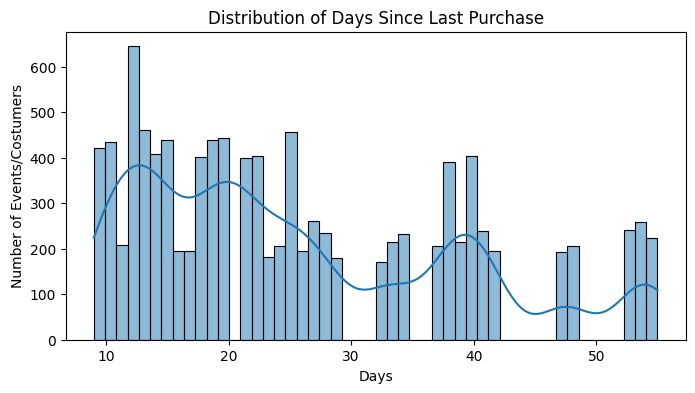

In [ ]:
# EDA on 'Days Since Last Purchase'
plt.figure(figsize=(8, 4))
sns.histplot(df['Days Since Last Purchase'], bins=50, kde=True)
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days')
plt.ylabel('Number of Events/Costumers')
plt.show()

 * Concentration of Recent Activity (Early Peaks): There are distinct peaks in the number of events/customers at around 10-12 days and another around 15-20 days since the last purchase. This indicates that a significant portion of customers or events occur relatively soon after a previous purchase. This suggests either repeat buying behavior or a strong response to follow-up actions (e.g., marketing campaigns) within a short window.
 * Periodicity/Cycles in Customer Behavior: The distribution shows a somewhat periodic or cyclical pattern, with peaks and troughs appearing roughly every 7-10 days (e.g., peaks around 10-12, 18-22, then another cluster around 35-40 days, and again near 50 days). This could correspond to:
   * Weekly purchasing habits: If a "week" represents 7 days, a pattern could emerge.
   * Marketing campaign cycles: The company might be running campaigns or sending reminders on a weekly or bi-weekly basis.
   * Product consumption cycles: For certain products, users might naturally re-purchase within specific timeframes.
 * Customer Retention/Churn Risk Identification:
   * The drop in activity after the initial peaks (e.g., between 25-30 days and 40-45 days) suggests that customers who haven't purchased within these more active periods might be at higher risk of churning.
   * The relatively low number of events/customers beyond, say, 45-50 days indicates that a customer who has not made a purchase by this point is less likely to make one subsequently.
 * Targeted Marketing Opportunities:
   * The peaks identify optimal times for re-engagement efforts. For example, customers who last purchased 7-10 days ago, or 15-20 days ago, might be most receptive to new offers or reminders.
   * The troughs (lower activity periods) could be good times to initiate more aggressive re-engagement strategies for dormant customers.
 * Average Recency: While not explicitly given, the bulk of the distribution appears to fall within the 0-50 day range, with some activity extending slightly beyond. The majority of activity seems concentrated within the first 25-30 days

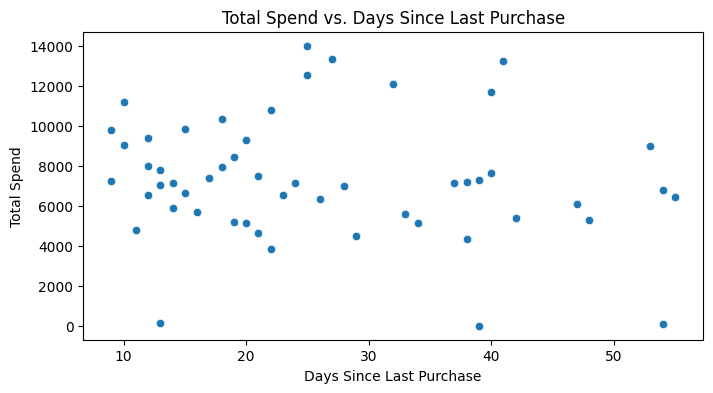

In [ ]:
# Relationship with Total spend
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Days Since Last Purchase', y='Total Spend', data=df)
plt.title('Total Spend vs. Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Total Spend')
plt.show()

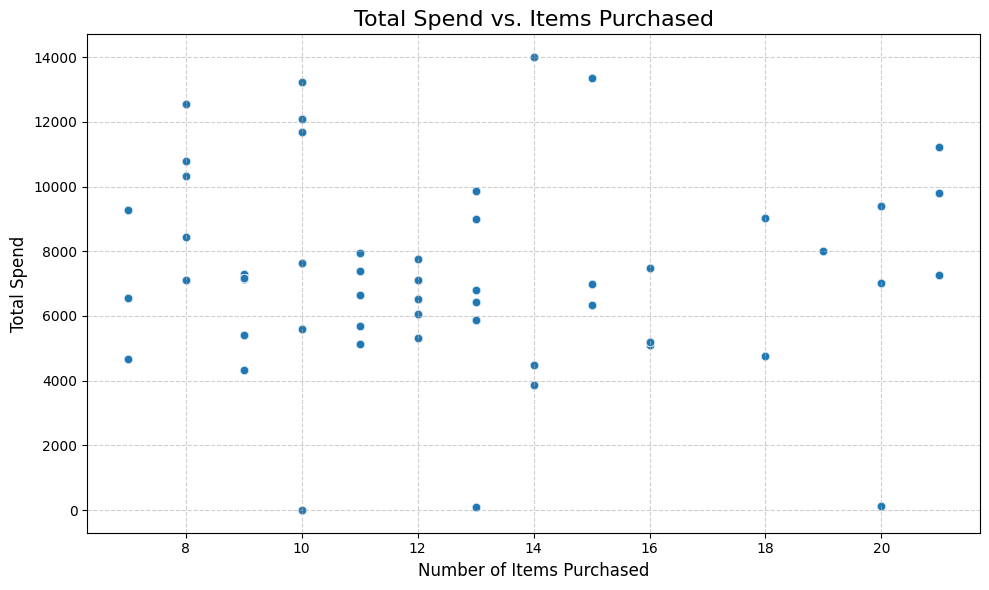

In [ ]:
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
sns.scatterplot(x='Items Purchased', y='Total Spend', data=df, alpha=0.7) # alpha for transparency if many points
plt.title('Total Spend vs. Items Purchased', fontsize=16)
plt.xlabel('Number of Items Purchased', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for easier reading
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#  Calculate the Pearson Correlation Coefficient ---
correlation = df['Items Purchased'].corr(df['Total Spend'])

print(f"\nPearson Correlation between 'Items Purchased' and 'Total Spend': {correlation:.4f}")


Pearson Correlation between 'Items Purchased' and 'Total Spend': 0.0077


There is no meaningful relationship between 'Item purchased' and 'Total Spend' as the
Pearson Correlation is close to 0.

In [ ]:
 #Univariate Analysis (Individual Colum
for col in categorical_columns:
  if col in df.columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())



event_type value counts:
event_type
view        7390
cart        2150
purchase    1064
Name: count, dtype: int64

Gender value counts:
Gender
Male      5341
Female    5263
Name: count, dtype: int64

Membership Type value counts:
Membership Type
Gold      3701
Silver    3580
Bronze    3323
Name: count, dtype: int64

brand value counts:
brand
Bosch         1929
Fitbit        1523
Ikea          1228
Lg            1001
Loreal         844
Penguin        696
Samsung        562
Bochetti       514
Sony           483
Brw            396
Zara           364
Etor           346
Fly            267
Lucente        106
Rooman          86
Romanson        73
Respect         66
Sokolov         37
Stendmebel      32
Sv              28
Tissot          23
Name: count, dtype: int64

category_code value counts:
category_code
Home.Furniture                             2170
Automotive.Parts.Home.Appliances           1929
Electronics.Consumer                       1563
Electronics.Wearables.Fitness              1

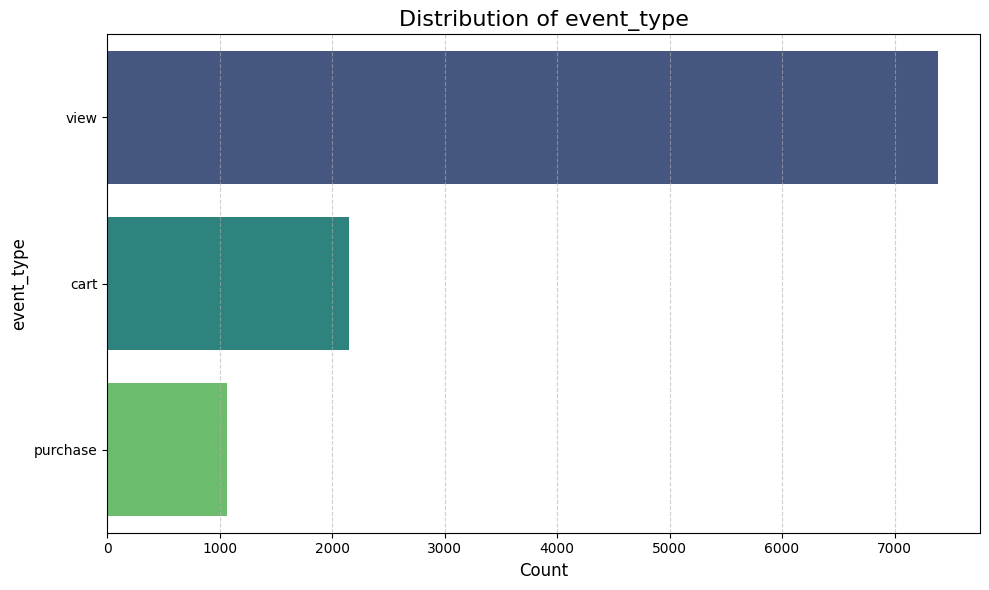

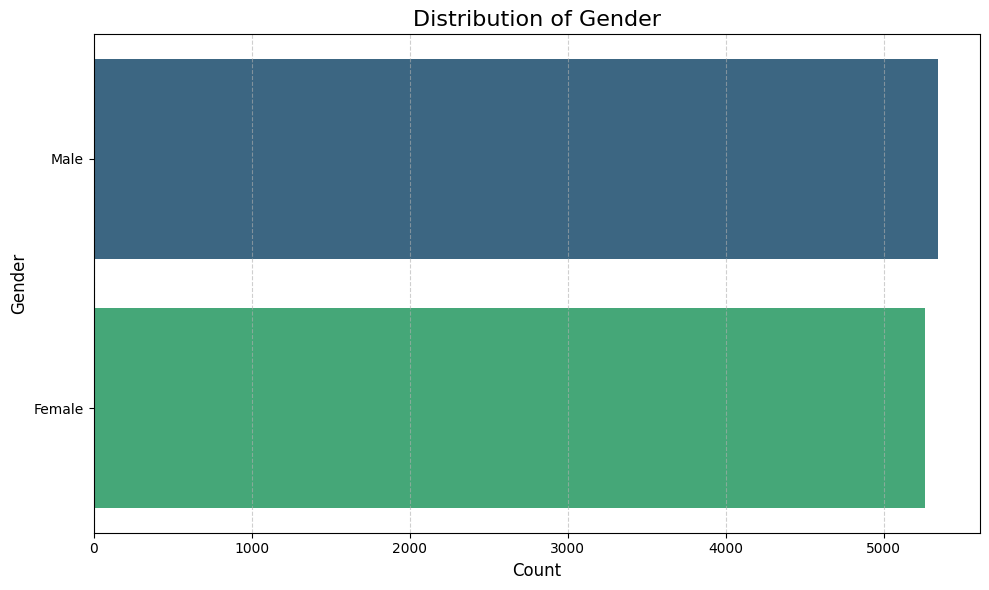

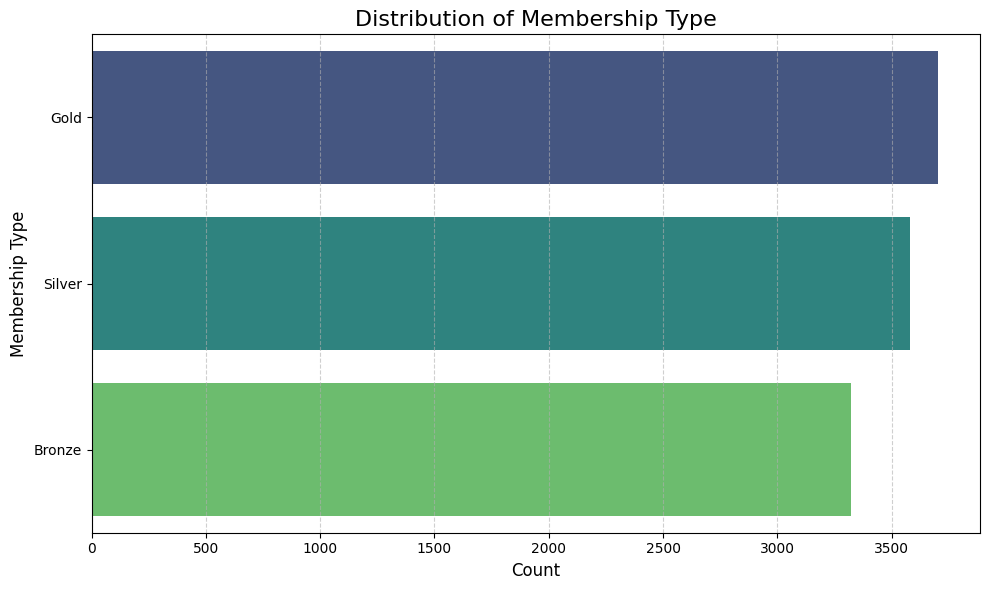

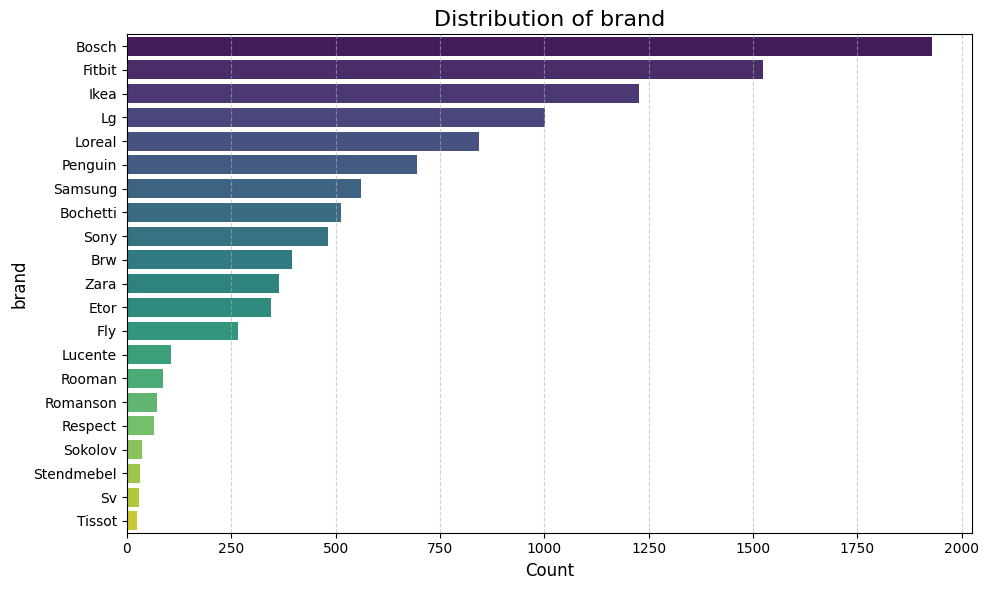

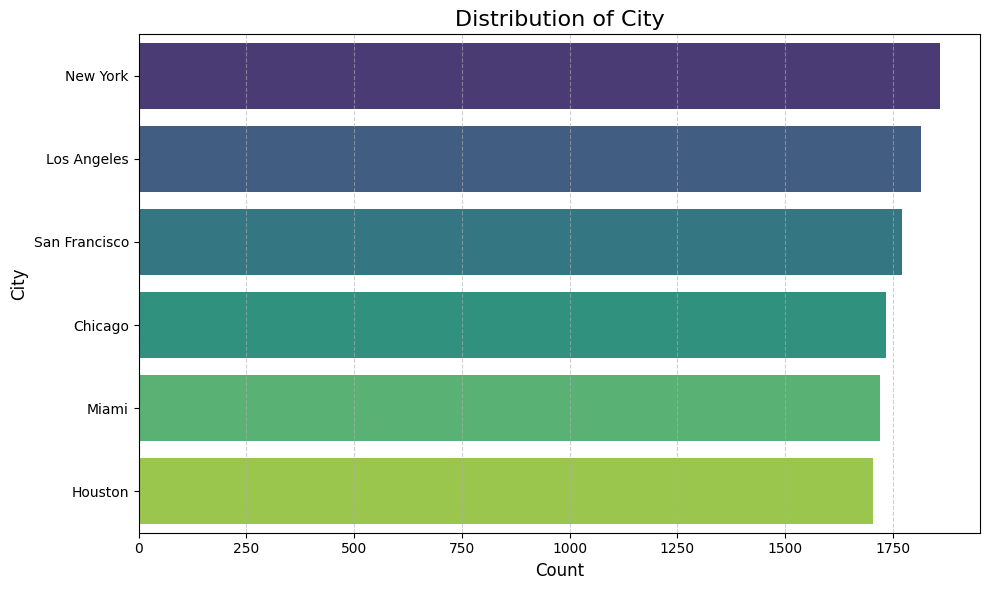

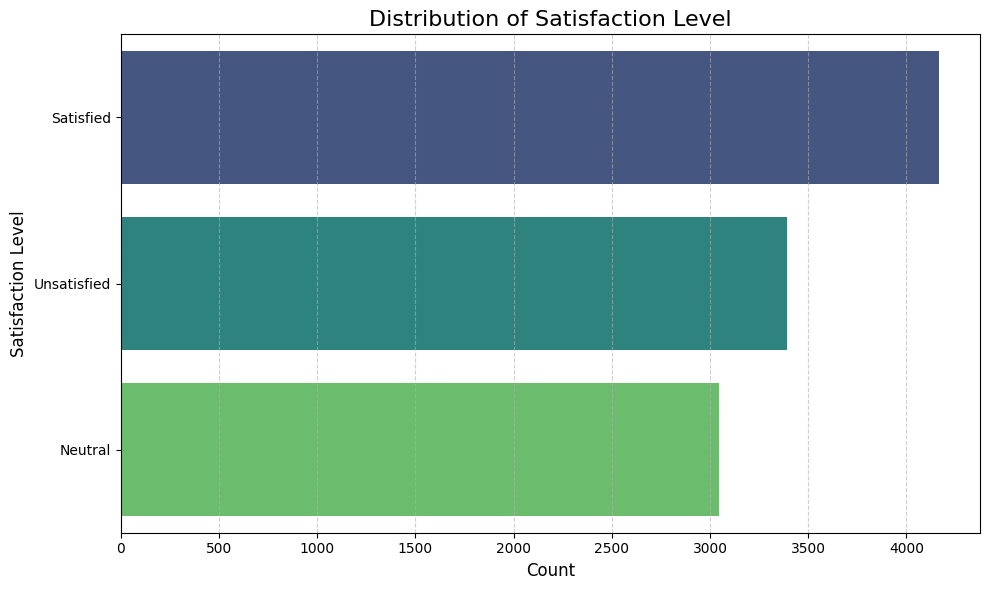

In [ ]:
# prompt: generate a code to visualise the distribution of categories on given dataset

import matplotlib.pyplot as plt
# Select categorical columns for distribution visualization
cols_to_visualize = ['event_type', 'Gender', 'Membership Type', 'brand', 'City', 'Satisfaction Level']

# Visualize the distribution of each selected categorical column
for col in cols_to_visualize:
  if col in df.columns:
    plt.figure(figsize=(10, 6)) # Adjust figure size as needed
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis') # Use y for horizontal bars, order by count
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
  else:
    print(f"Warning: Column '{col}' not found in DataFrame")

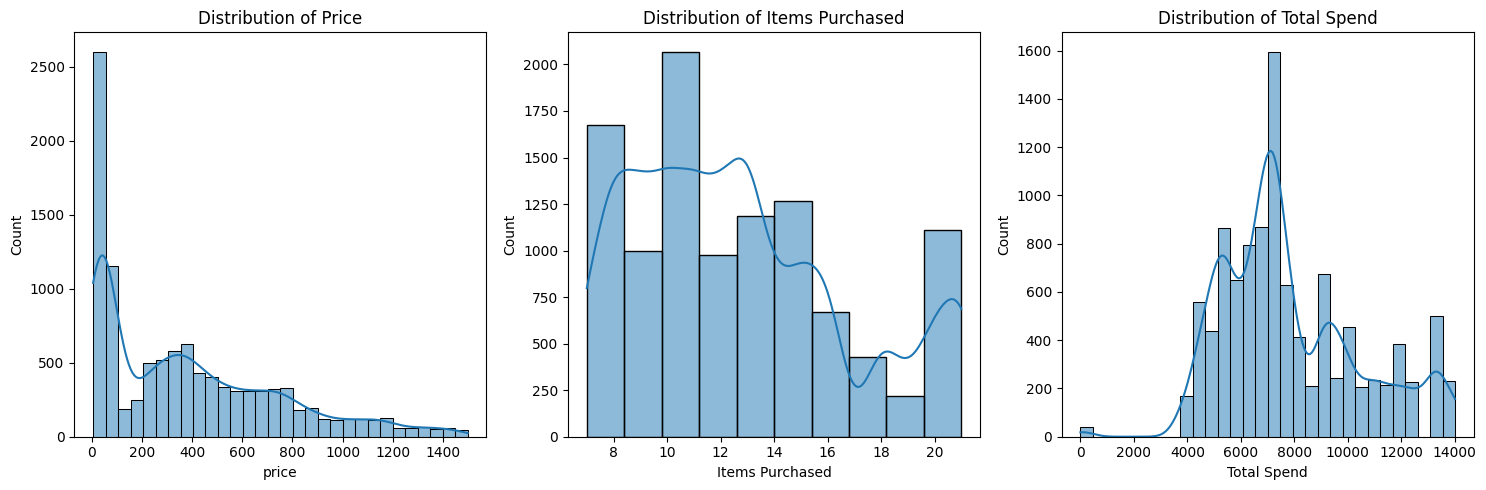

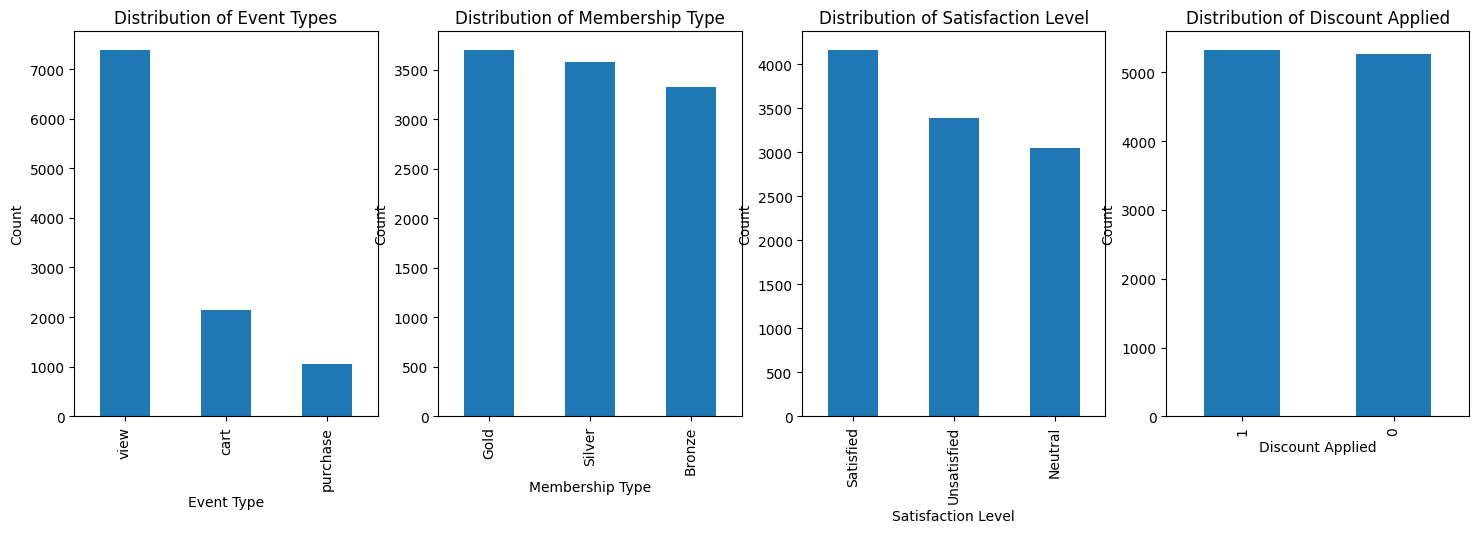

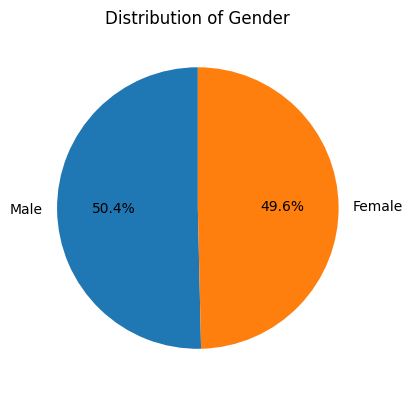

In [ ]:
# 2. Univariate Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 3, 2)
sns.histplot(df['Items Purchased'].dropna(), bins=10, kde=True)
plt.title('Distribution of Items Purchased')

plt.subplot(1, 3, 3)
sns.histplot(df['Total Spend'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Spend')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))
plt.subplot(1, 4, 1)
df['event_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')

plt.subplot(1, 4, 2)
df['Membership Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Count')

plt.subplot(1, 4, 3)
df['Satisfaction Level'].value_counts().plot(kind='bar')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')

plt.subplot(1, 4, 4)
df['Discount Applied'].value_counts().plot(kind='bar')
plt.title('Distribution of Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Count')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.ylabel('')
plt.tight_layout()
plt.show()





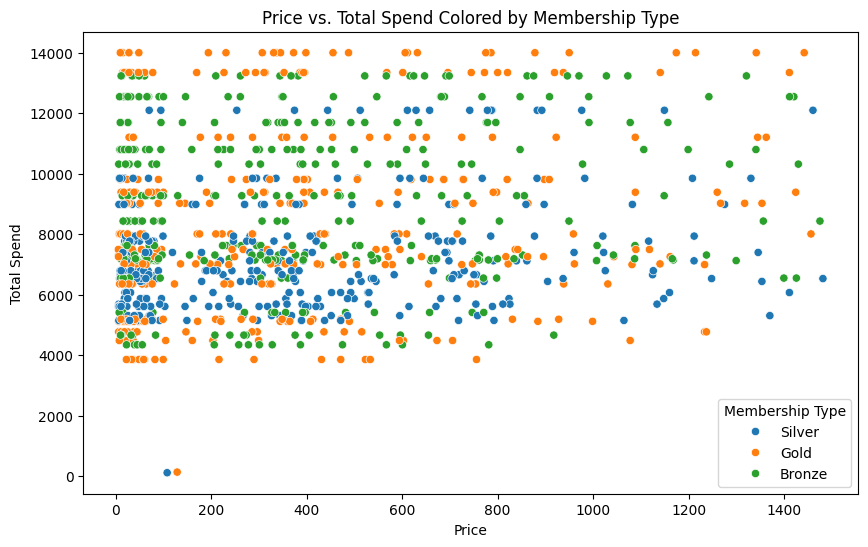

In [ ]:
#  Bivariate Analysis

# Price vs. Total Spend (for purchases)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='price', y='Total Spend', data=df[df['event_type'] == 'purchase'])
# plt.title('Price vs. Total Spend for Purchases')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df[df['event_type'] == 'purchase'],
                # x='price',
                # y='Total Spend')

# plt.yscale('log')  # Apply log scale to Y-axis
# plt.title('Price vs. Total Spend (Log Scale)')
# plt.xlabel('Price')
# plt.ylabel('Total Spend (log scale)')
# plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['event_type'] == 'purchase'],
                x='price',
                y='Total Spend',
                hue='Membership Type')  # OR hue='churn_label'

# plt.yscale('log')  # Optional for normalization
plt.title('Price vs. Total Spend Colored by Membership Type')
plt.xlabel('Price')
plt.ylabel('Total Spend')
plt.legend(title='Membership Type')  # Optional, auto-added
plt.show()




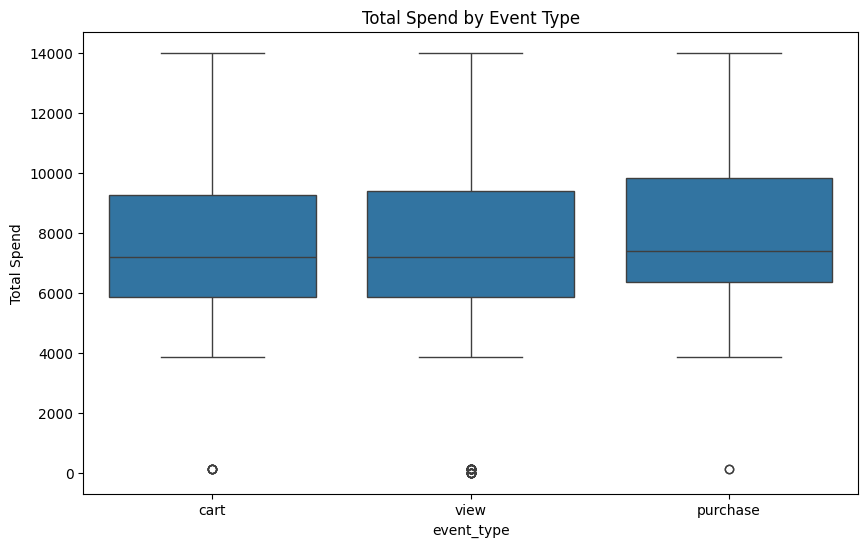

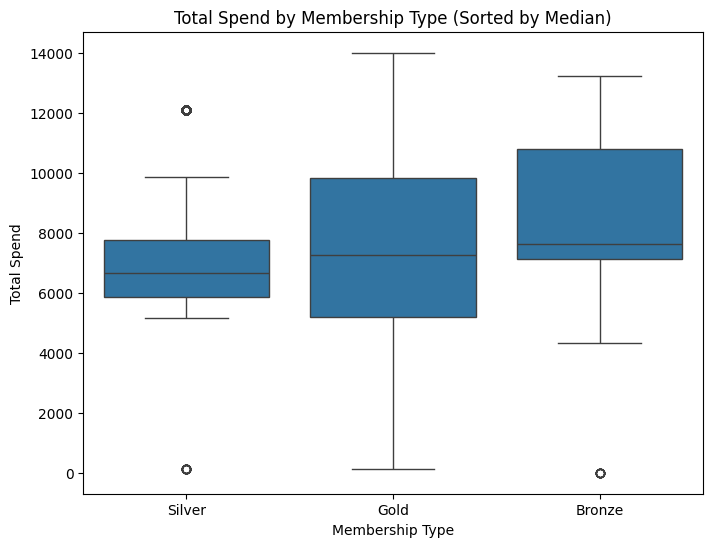

In [ ]:
# Total Spend by Event Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='event_type', y='Total Spend', data=df)
plt.title('Total Spend by Event Type')
plt.show()

# Compute median spend per membership
ordered = df.groupby('Membership Type')['Total Spend'].median().sort_values().index

# Plot boxplot with sorted categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Membership Type', y='Total Spend', order=ordered)
plt.title('Total Spend by Membership Type (Sorted by Median)')
plt.show()

# BELOW CODE IS FOR : Churn rate per membership type BUT FOR THAT NEED TO CREATE CHURN DATA AS THERE IS NO CHURN_LABEL COL IS ALREADY AVAILABLE IN DATASET

# churn_data = df.drop_duplicates('user_id').groupby('Membership Type')['churn_label'].mean().reset_index()

# Plot count of users per membership
# plt.figure(figsize=(8, 6))
# ax = sns.countplot(data=df.drop_duplicates('user_id'), x='Membership Type')

# Annotate churn rates
# for p in ax.patches:
    # group = p.get_x() + p.get_width() / 2
    # group_name = p.get_x()
    # height = p.get_height()
    # churn_rate = churn_data[churn_data['Membership Type'] == p.get_x()].iloc[0, 1]
    # ax.annotate(f'{churn_rate:.2%}', (group, height + 20), ha='center', fontsize=11)

# plt.title('User Count per Membership Type with Churn Rate Overlay')
# plt.xlabel('Membership Type')
# plt.ylabel('User Count')
# plt.show()

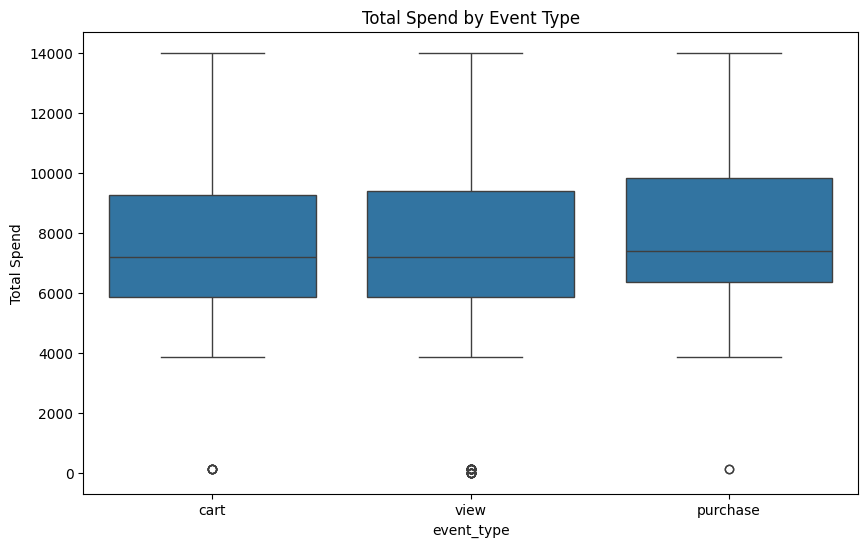

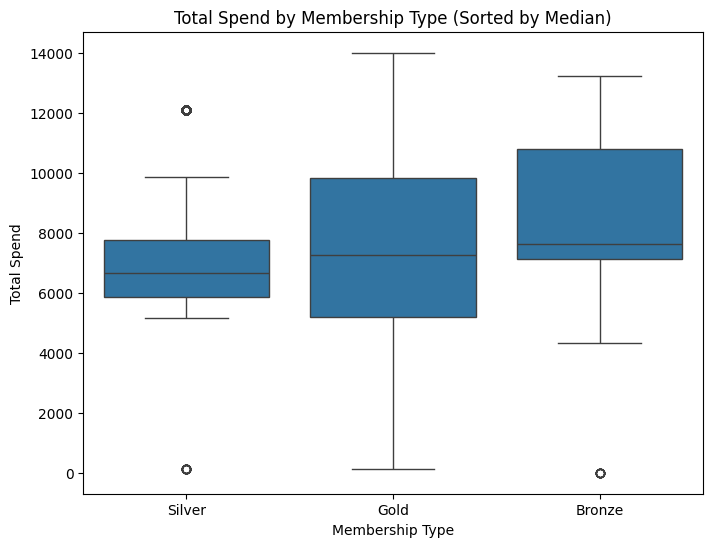

In [ ]:
# Total Spend by Event Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='event_type', y='Total Spend', data=df)
plt.title('Total Spend by Event Type')
plt.show()

# Compute median spend per membership
ordered = df.groupby('Membership Type')['Total Spend'].median().sort_values().index

# Plot boxplot with sorted categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Membership Type', y='Total Spend', order=ordered)
plt.title('Total Spend by Membership Type (Sorted by Median)')
plt.show()

# BELOW CODE IS FOR : Churn rate per membership type BUT FOR THAT NEED TO CREATE CHURN DATA AS THERE IS NO CHURN_LABEL COL IS ALREADY AVAILABLE IN DATASET

# churn_data = df.drop_duplicates('user_id').groupby('Membership Type')['churn_label'].mean().reset_index()

# Plot count of users per membership
# plt.figure(figsize=(8, 6))
# ax = sns.countplot(data=df.drop_duplicates('user_id'), x='Membership Type')

# Annotate churn rates
# for p in ax.patches:
    # group = p.get_x() + p.get_width() / 2
    # group_name = p.get_x()
    # height = p.get_height()
    # churn_rate = churn_data[churn_data['Membership Type'] == p.get_x()].iloc[0, 1]
    # ax.annotate(f'{churn_rate:.2%}', (group, height + 20), ha='center', fontsize=11)

# plt.title('User Count per Membership Type with Churn Rate Overlay')
# plt.xlabel('Membership Type')
# plt.ylabel('User Count')
# plt.show()

In [ ]:
import pandas as pd
import numpy as np # For numerical operations like np.nan
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency # For ANOVA and Chi-Squared tests


Plotting Scatter Plots for selected numerical pairs...


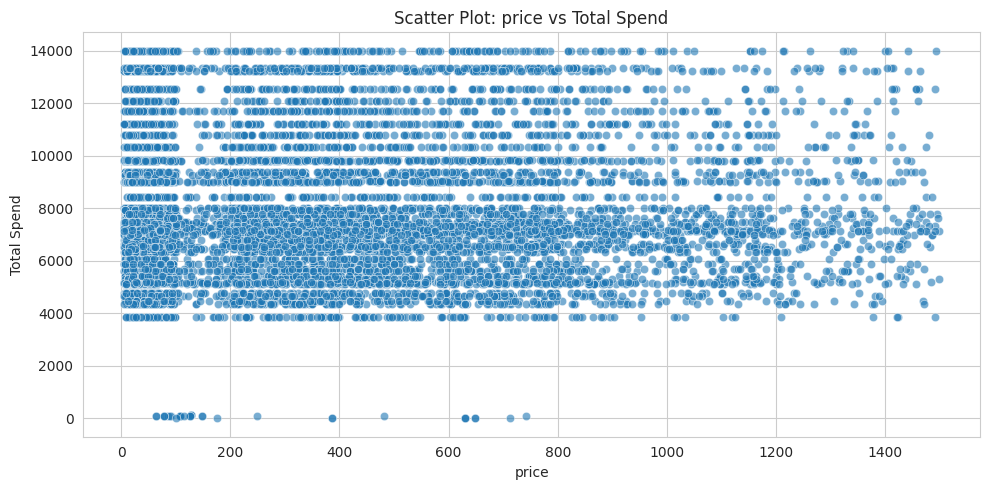

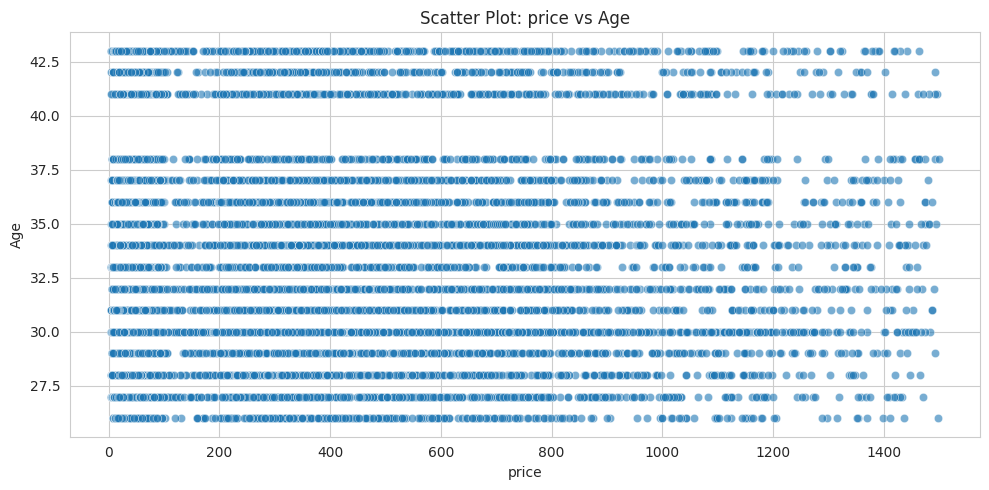

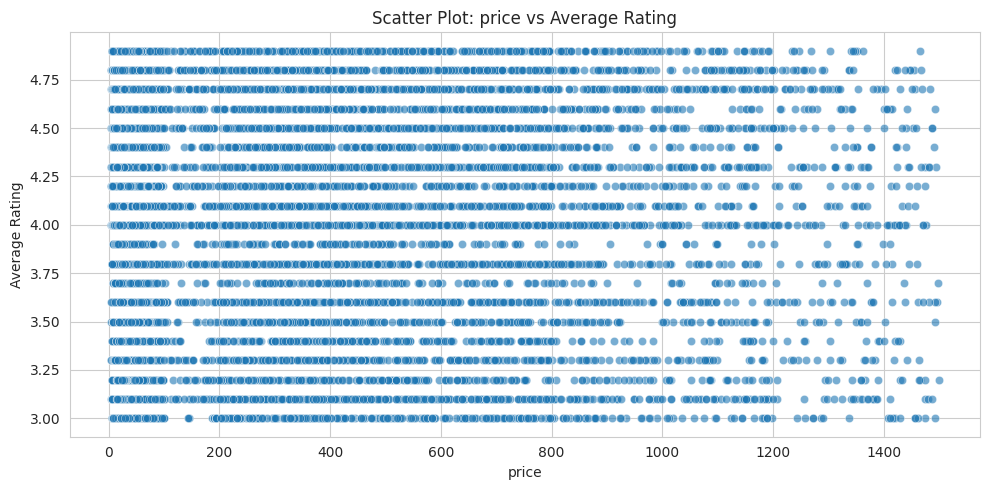

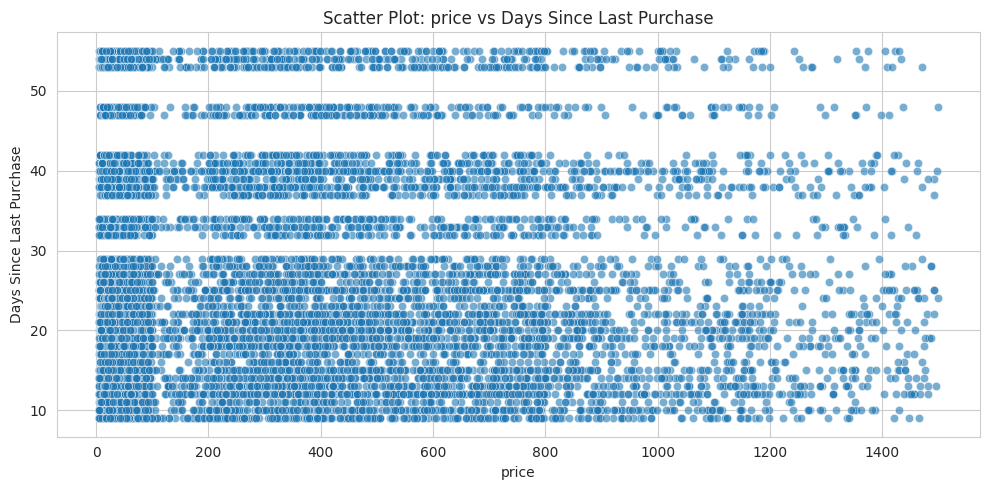

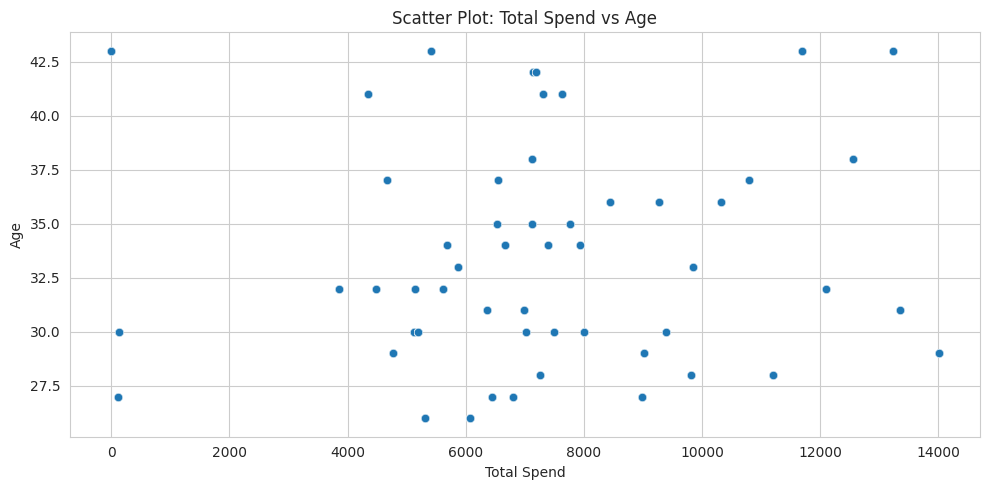

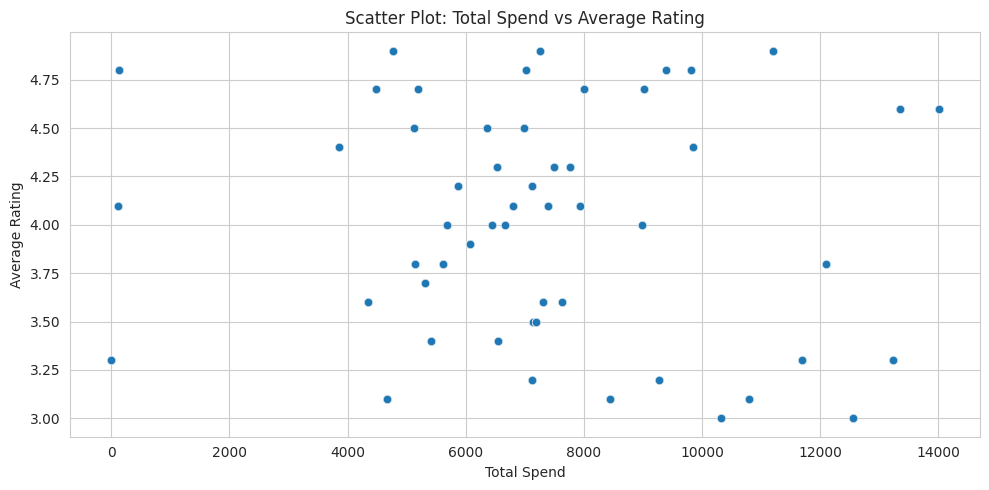

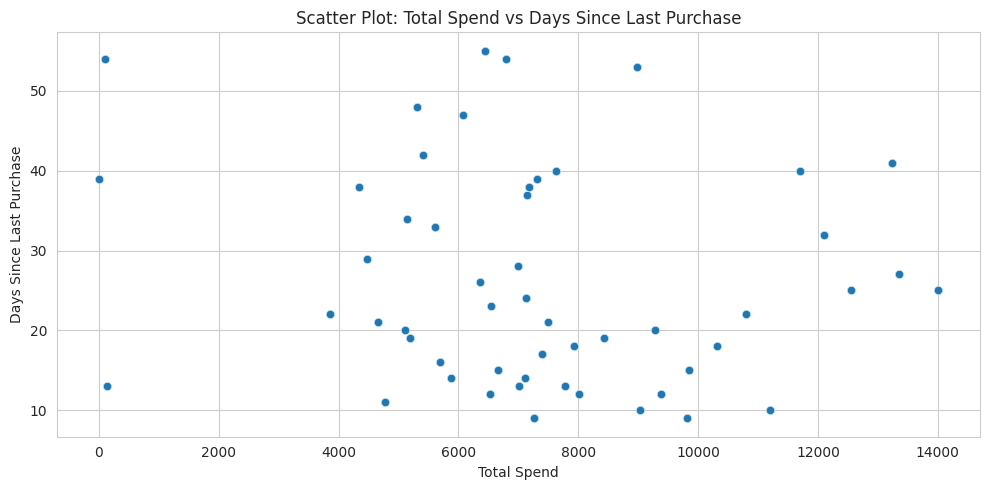

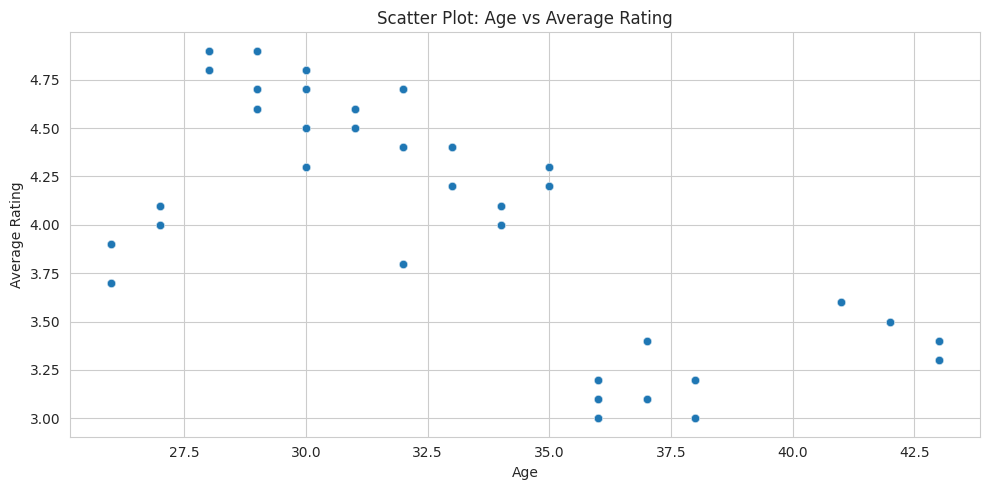

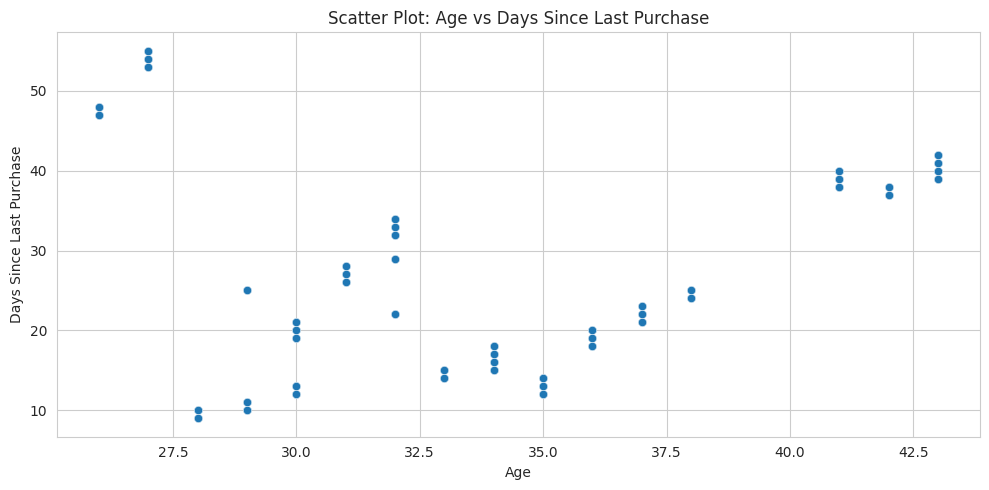

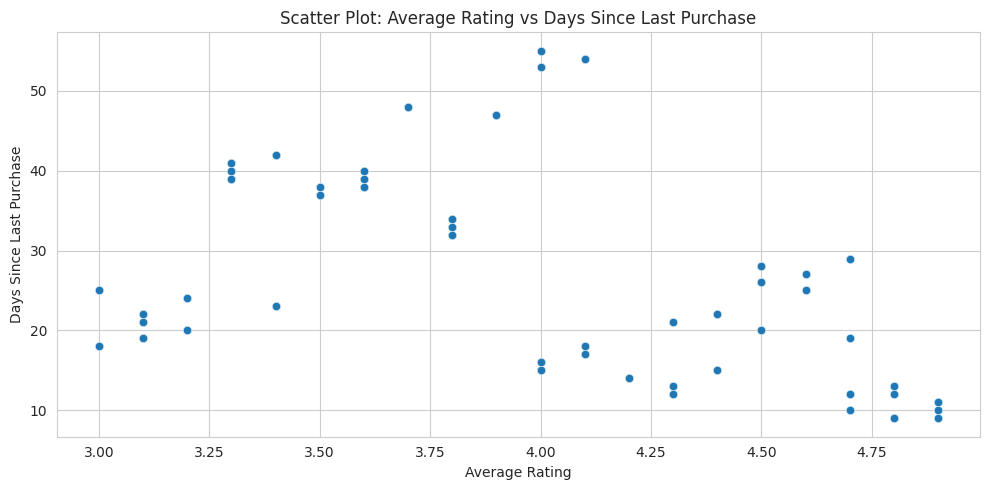


Calculating and plotting Correlation Matrix...


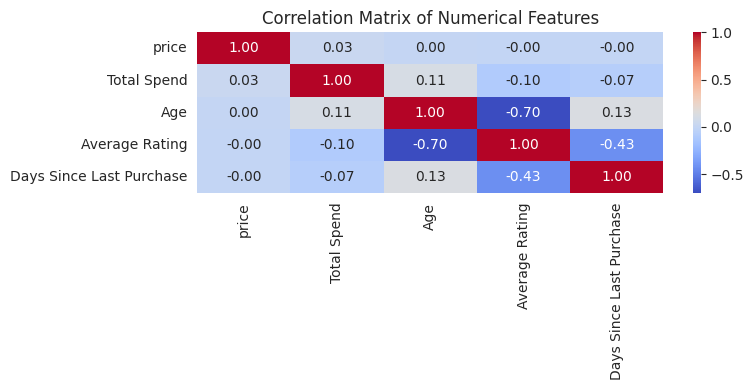

In [ ]:
# Define numerical columns of interest
numerical_cols = ['price', 'Total Spend', 'Age', 'Items purchased', 'Average Rating', 'Days Since Last Purchase']
# Filter out any columns that might not exist in your specific df or are not purely numerical
numerical_cols = [col for col in numerical_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if len(numerical_cols) > 1:
    # Scatter Plots
    print("\nPlotting Scatter Plots for selected numerical pairs...")
    sns.set_style("whitegrid")
    for i in range(len(numerical_cols)):
        for j in range(i + 1, len(numerical_cols)):
            col1 = numerical_cols[i]
            col2 = numerical_cols[j]
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6)
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()
            plt.show()

    # Correlation Matrix/Heatmap
    print("\nCalculating and plotting Correlation Matrix...")
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(8, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for bivariate analysis.")


Important Insights :


 * Price and Total Spend: There's a very weak positive correlation (0.03) between price and Total Spend. This suggests that the individual price of an item doesn't strongly dictate the total amount spent in a transaction. This might be because Total Spend is influenced more by the Items purchased in a single transaction rather than the price of any single item.
 * Age and Total Spend / Price:
   * Age has a weak positive correlation with Total Spend (0.11).
   * Age has a very weak, almost negligible, positive correlation with price (0.00). This indicates that older customers aren't necessarily buying more expensive individual items.
 * Average Rating and Other Metrics:
   * Average Rating shows a moderate negative correlation with Age (-0.70). This is an interesting and potentially significant finding, suggesting that older customers might tend to give lower ratings, or younger customers give higher ratings. This warrants further investigation.
   * Average Rating has a very weak negative correlation with price (-0.00) and Total Spend (-0.10). This suggests that the price of an item or the total spend in a transaction doesn't strongly influence its average rating.
 * Days Since Last Purchase and Other Metrics:
   * Days Since Last Purchase has a moderate negative correlation with Average Rating (-0.43). This implies that customers who have purchased more recently tend to give higher average ratings, or conversely, lower average ratings might be associated with longer periods between purchases. This is a crucial insight for churn analysis.
   * Days Since Last Purchase shows very weak or negligible correlations with price (-0.00) and Total Spend (-0.07). This means the time since the last purchase isn't strongly related to the price of individual items or the total amount spent in a transaction.
Key Takeaways for an E-commerce Business:
 * Customer Satisfaction & Recency: The negative correlation between Average Rating and Days Since Last Purchase suggests that keeping customers engaged and purchasing regularly might contribute to higher satisfaction scores. Conversely, customers who haven't purchased recently might be less satisfied or simply less engaged.
 * Age-Based Rating Tendencies: The strong negative correlation between Age and Average Rating is noteworthy. The company might want to investigate why older customers tend to give lower ratings. Is it about product relevance, website experience, or customer service?
 * Pricing and Total Spend Drivers: The weak correlation between price and Total Spend indicates that simply having higher-priced items doesn't automatically lead to higher total spending per transaction. Other factors, like the quantity of items purchased or specific bundles, are likely more influential.
 * Churn Indicator: The relationship between Days Since Last Purchase and Average Rating could be a valuable early indicator for churn. A declining average rating, especially in conjunction with increasing days since the last purchase, might signal a customer at risk.


Analyzing price by event_type:


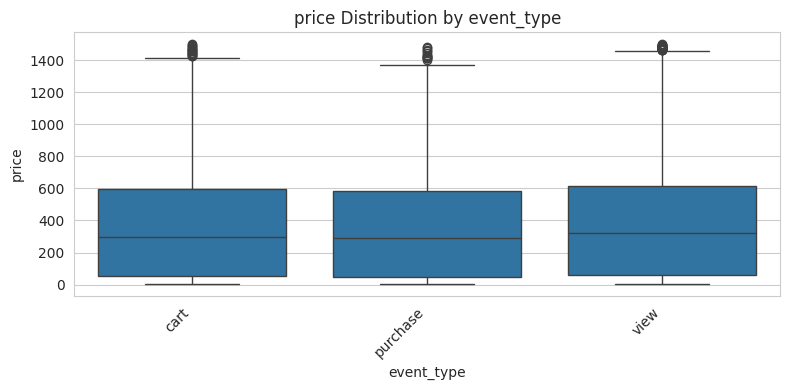

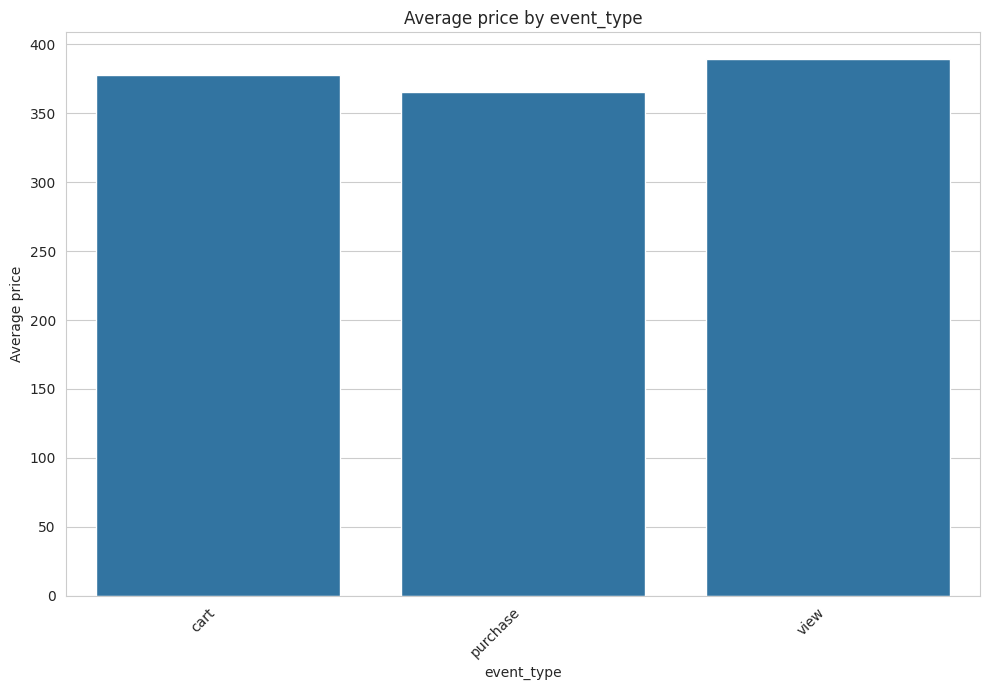

ANOVA Test for price by event_type:
  F-statistic: 2.55
  P-value: 0.078
  Interpretation: No statistically significant difference in means.

Analyzing Total Spend by event_type:


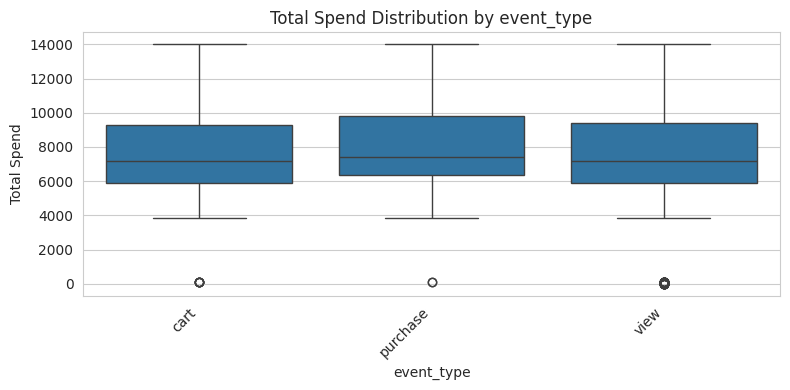

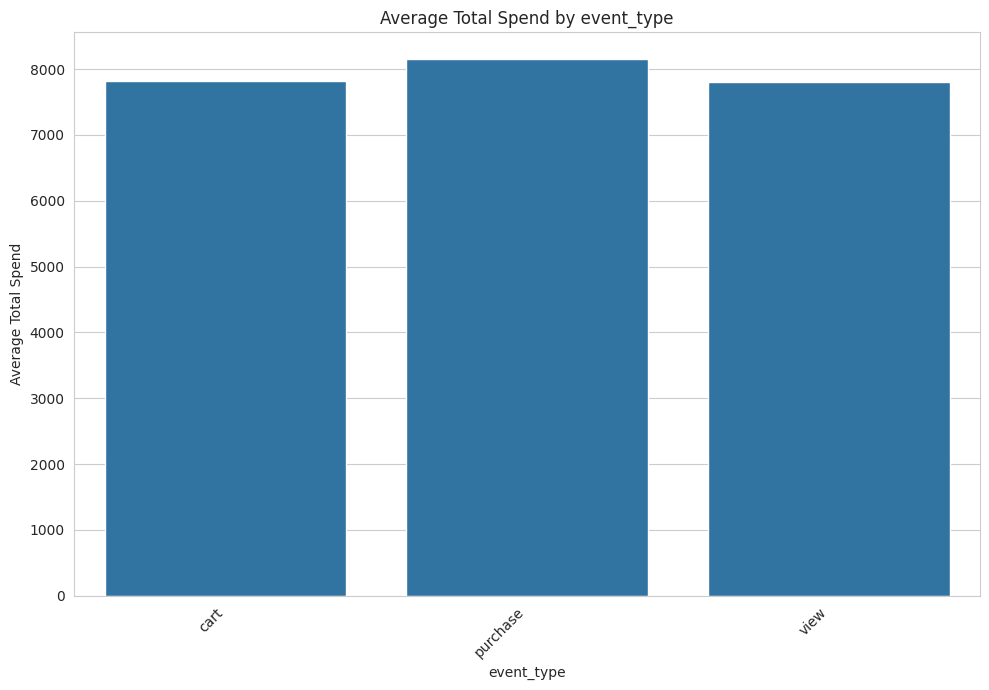

ANOVA Test for Total Spend by event_type:
  F-statistic: 8.42
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Age by event_type:


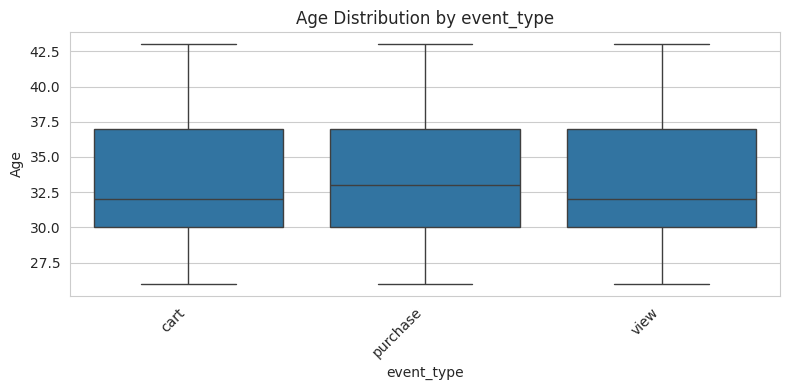

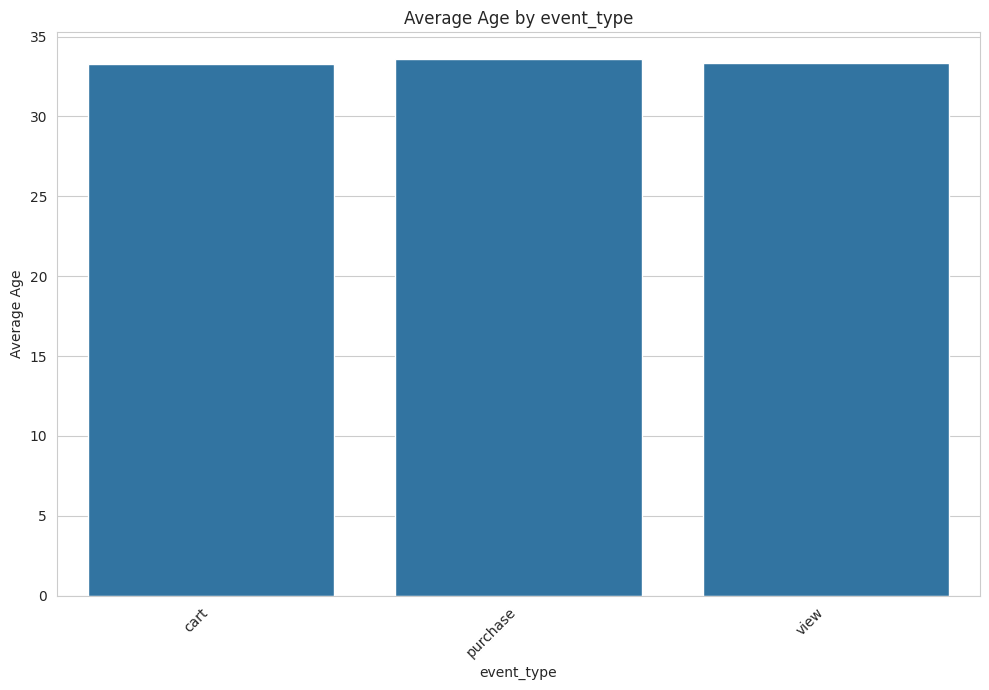

ANOVA Test for Age by event_type:
  F-statistic: 1.38
  P-value: 0.251
  Interpretation: No statistically significant difference in means.

Analyzing Average Rating by event_type:


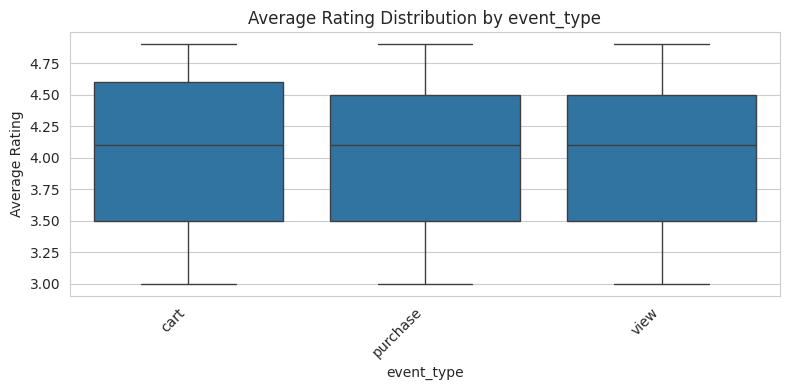

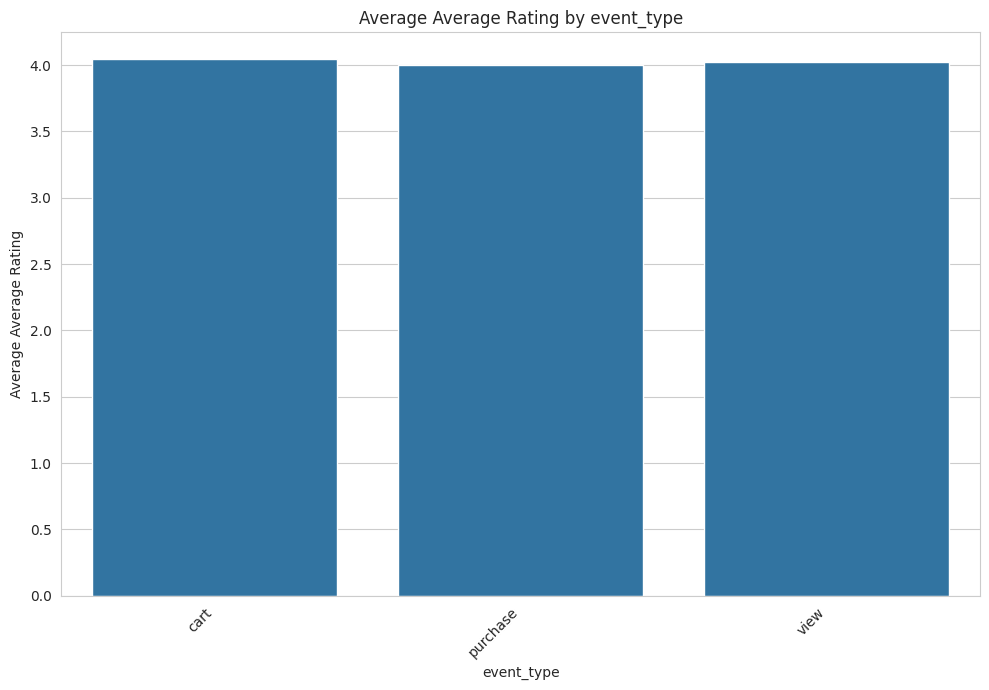

ANOVA Test for Average Rating by event_type:
  F-statistic: 1.86
  P-value: 0.156
  Interpretation: No statistically significant difference in means.

Analyzing Days Since Last Purchase by event_type:


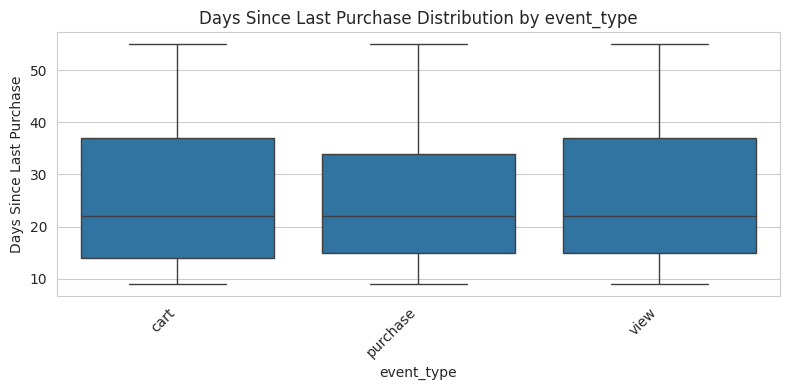

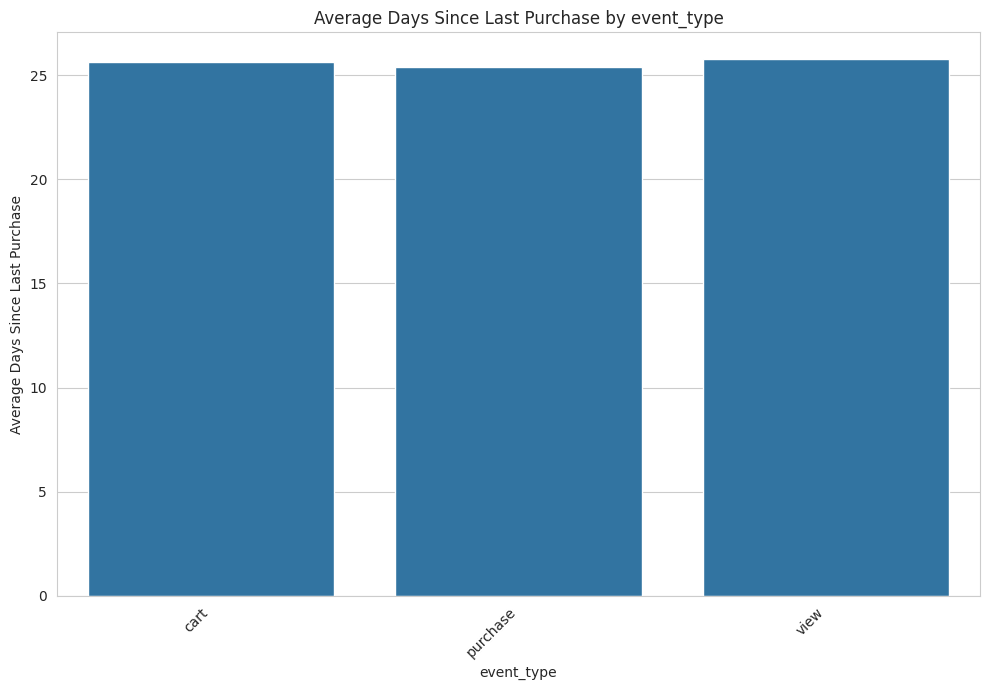

ANOVA Test for Days Since Last Purchase by event_type:
  F-statistic: 0.46
  P-value: 0.634
  Interpretation: No statistically significant difference in means.

Analyzing price by Gender:


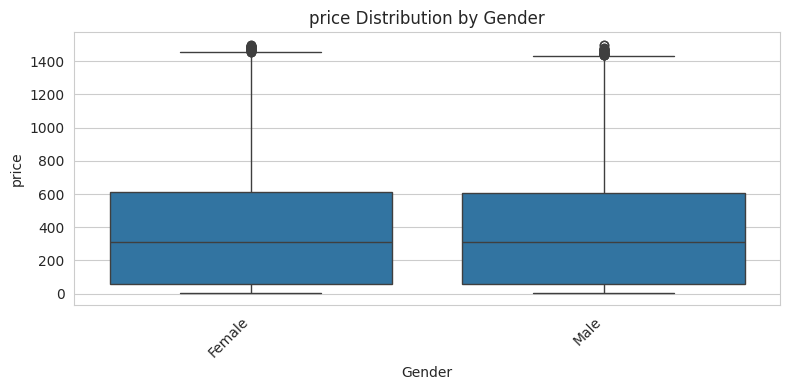

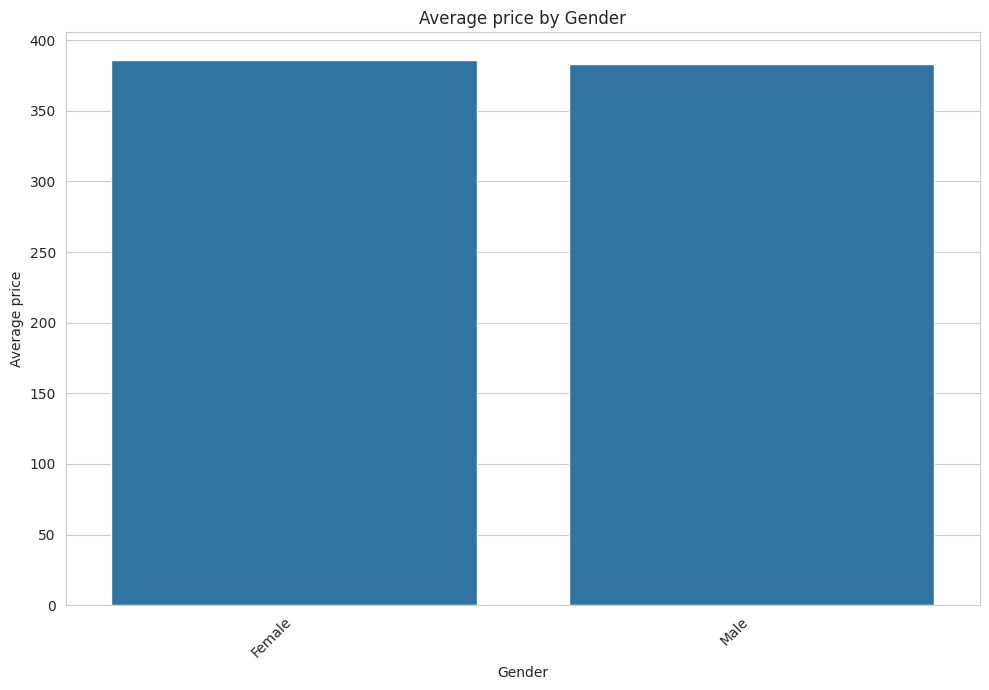

ANOVA Test for price by Gender:
  F-statistic: 0.22
  P-value: 0.640
  Interpretation: No statistically significant difference in means.

Analyzing Total Spend by Gender:


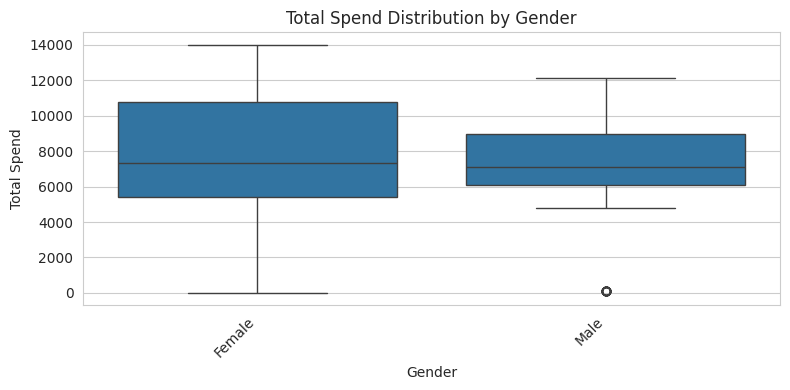

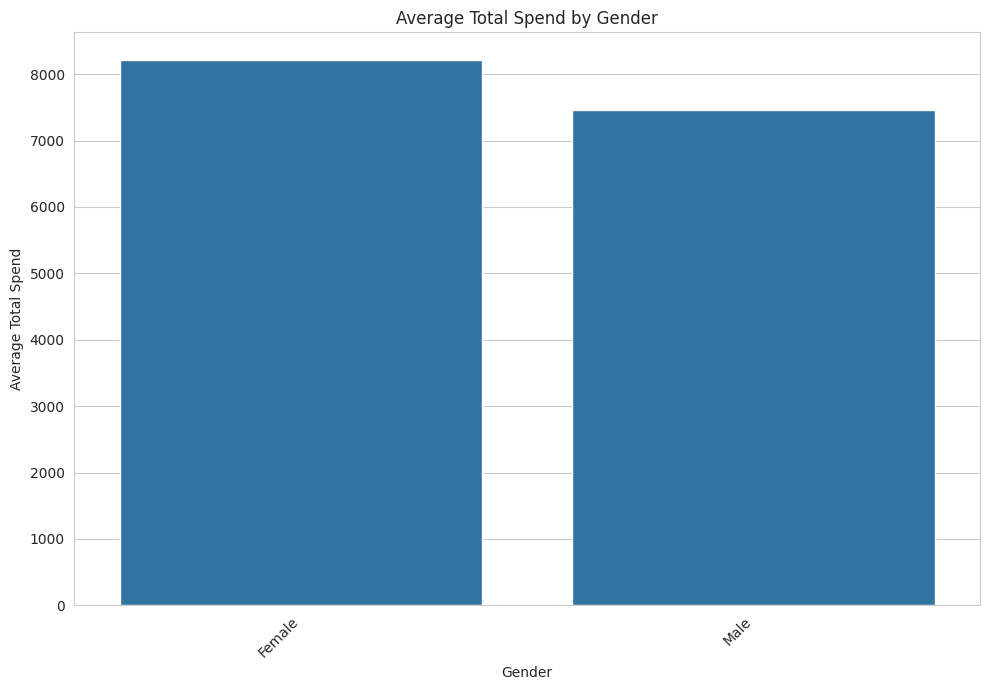

ANOVA Test for Total Spend by Gender:
  F-statistic: 227.04
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Age by Gender:


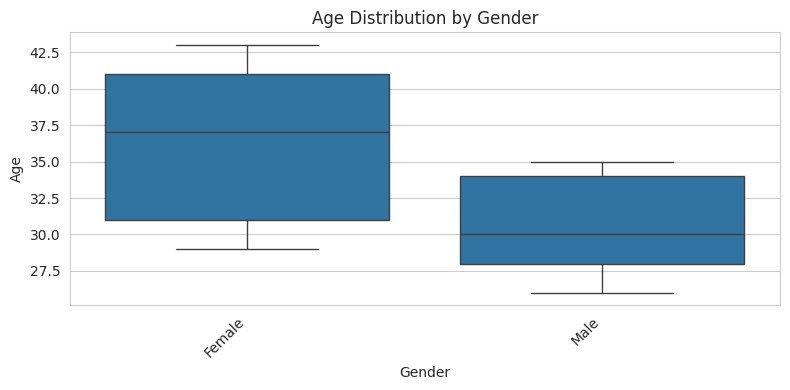

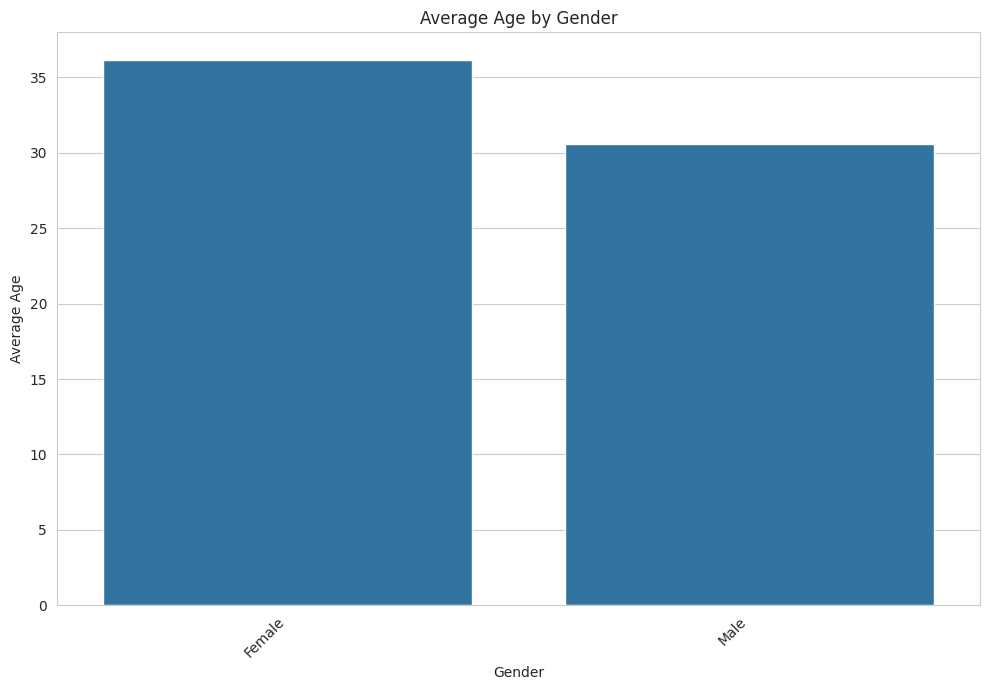

ANOVA Test for Age by Gender:
  F-statistic: 5149.62
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Average Rating by Gender:


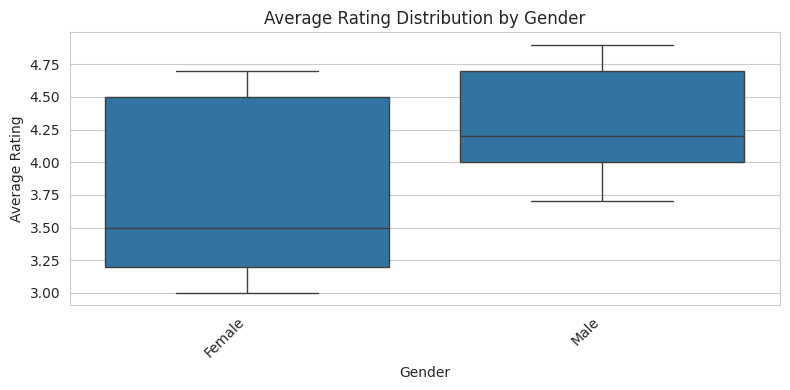

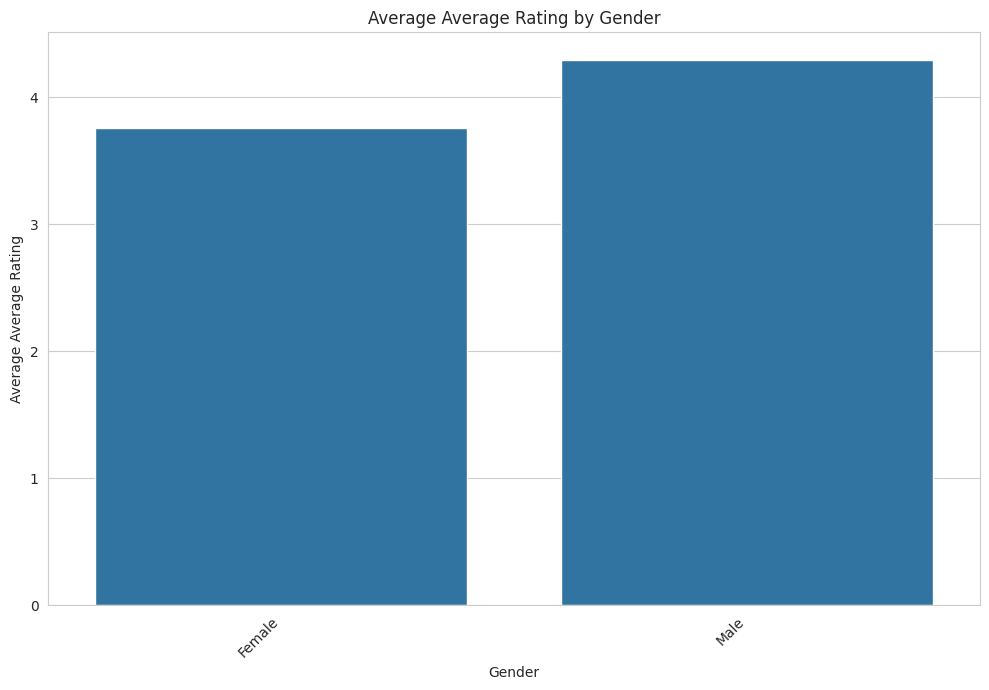

ANOVA Test for Average Rating by Gender:
  F-statistic: 2848.07
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Days Since Last Purchase by Gender:


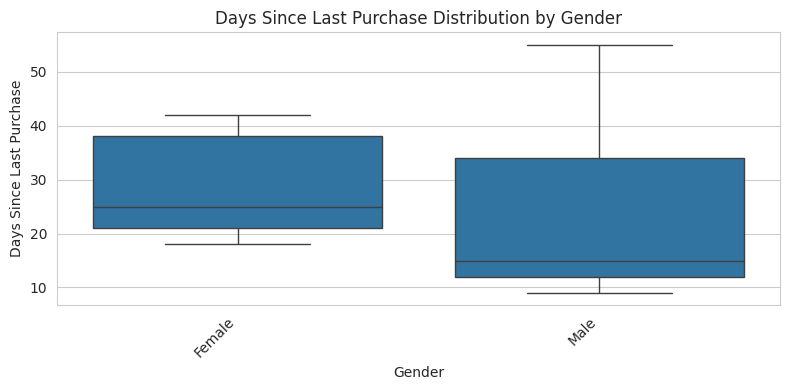

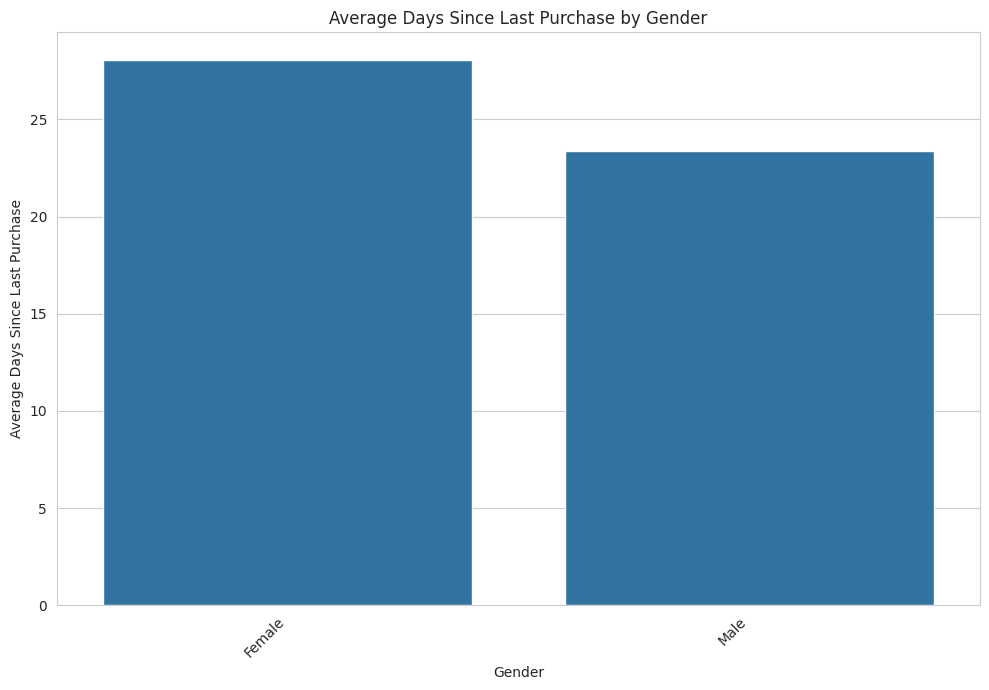

ANOVA Test for Days Since Last Purchase by Gender:
  F-statistic: 358.38
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing price by Membership Type:


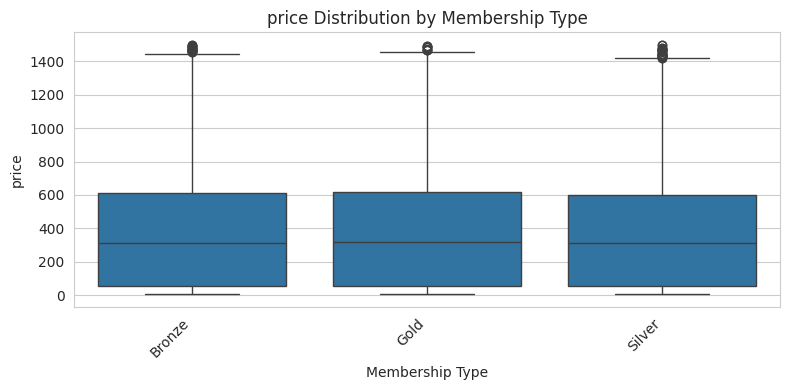

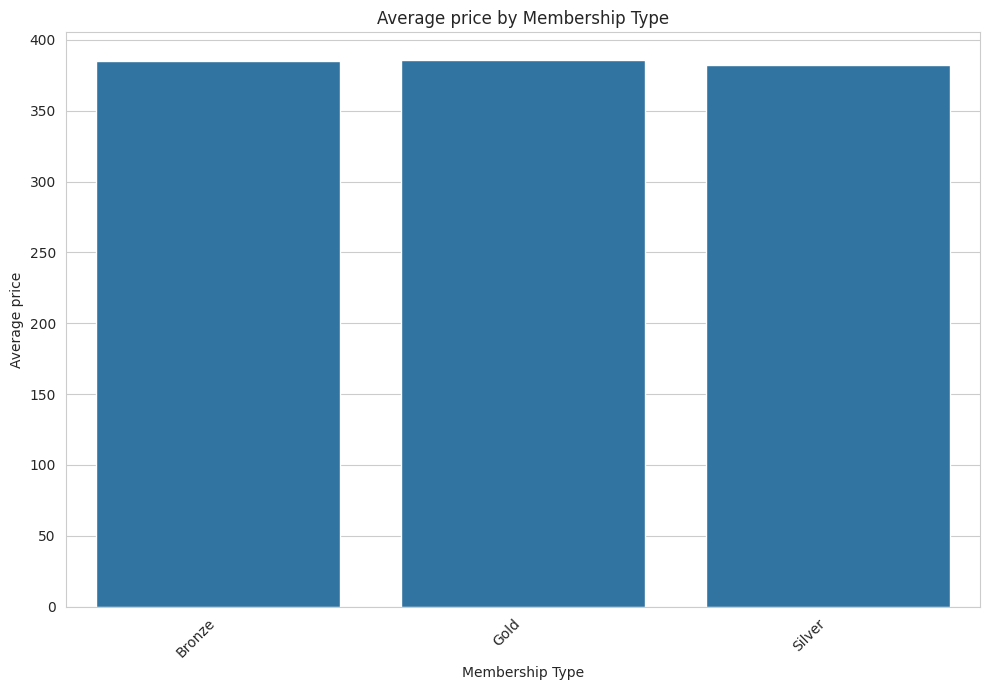

ANOVA Test for price by Membership Type:
  F-statistic: 0.09
  P-value: 0.916
  Interpretation: No statistically significant difference in means.

Analyzing Total Spend by Membership Type:


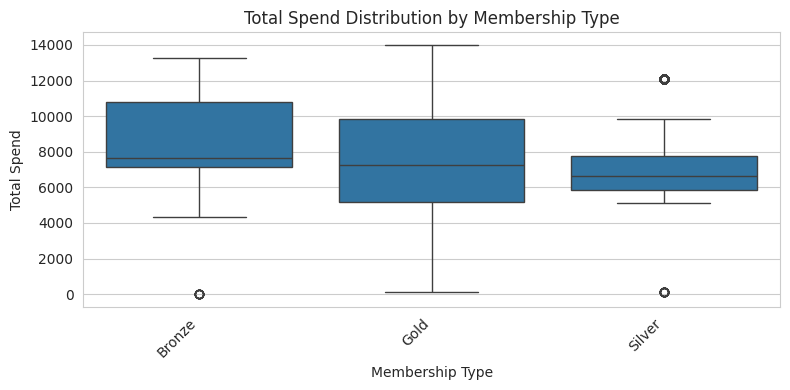

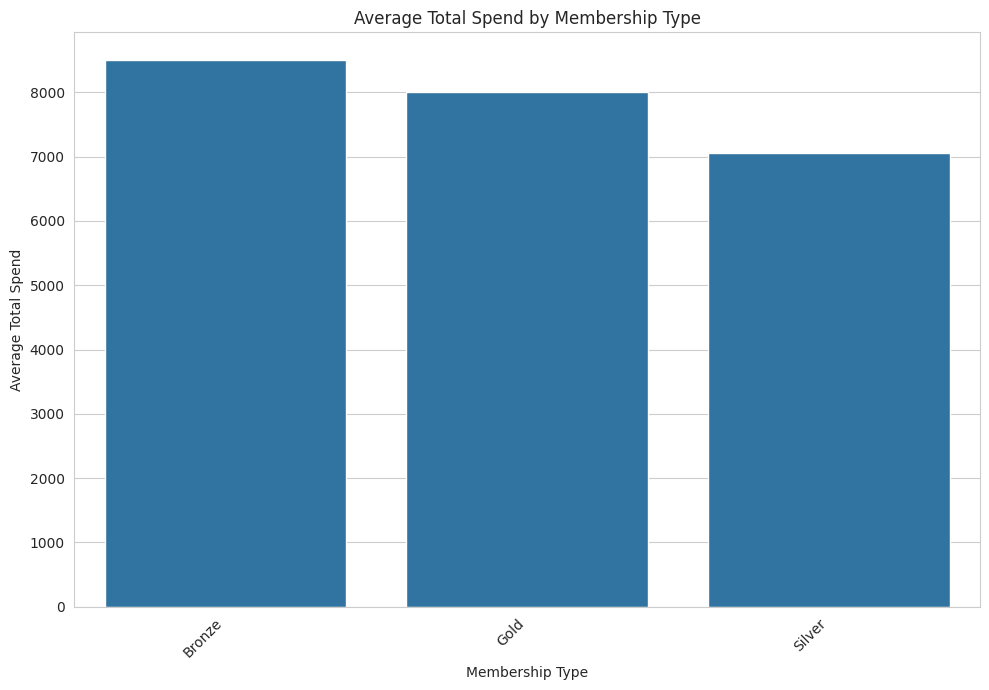

ANOVA Test for Total Spend by Membership Type:
  F-statistic: 297.48
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Age by Membership Type:


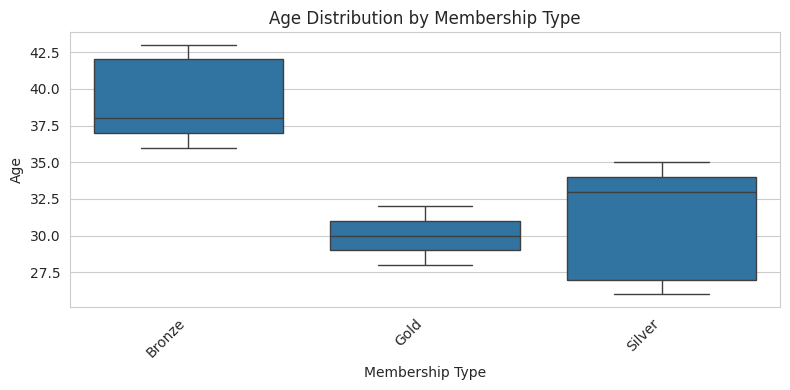

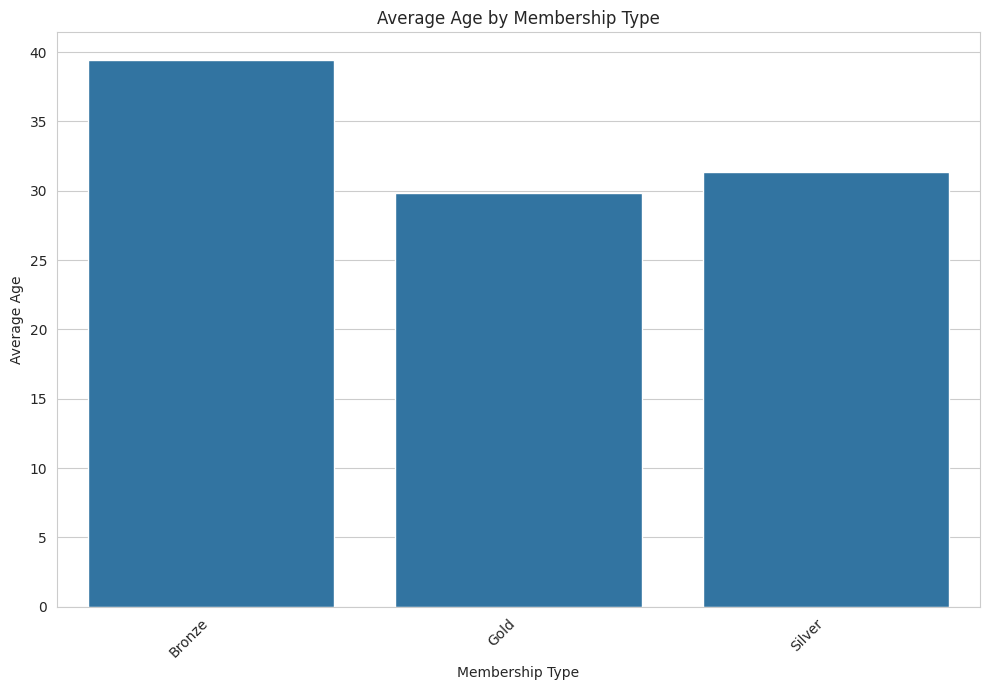

ANOVA Test for Age by Membership Type:
  F-statistic: 13912.70
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Average Rating by Membership Type:


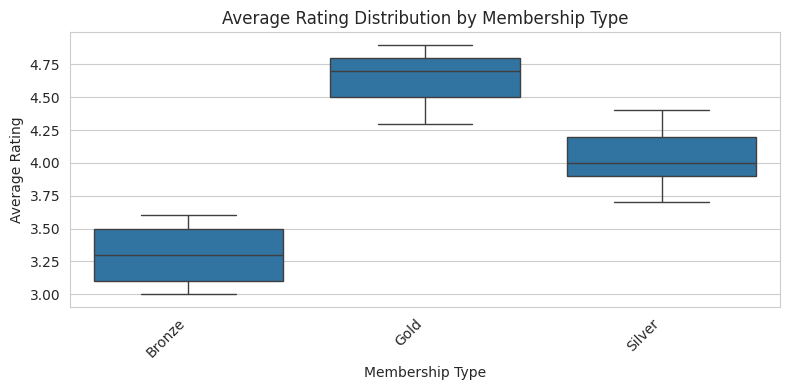

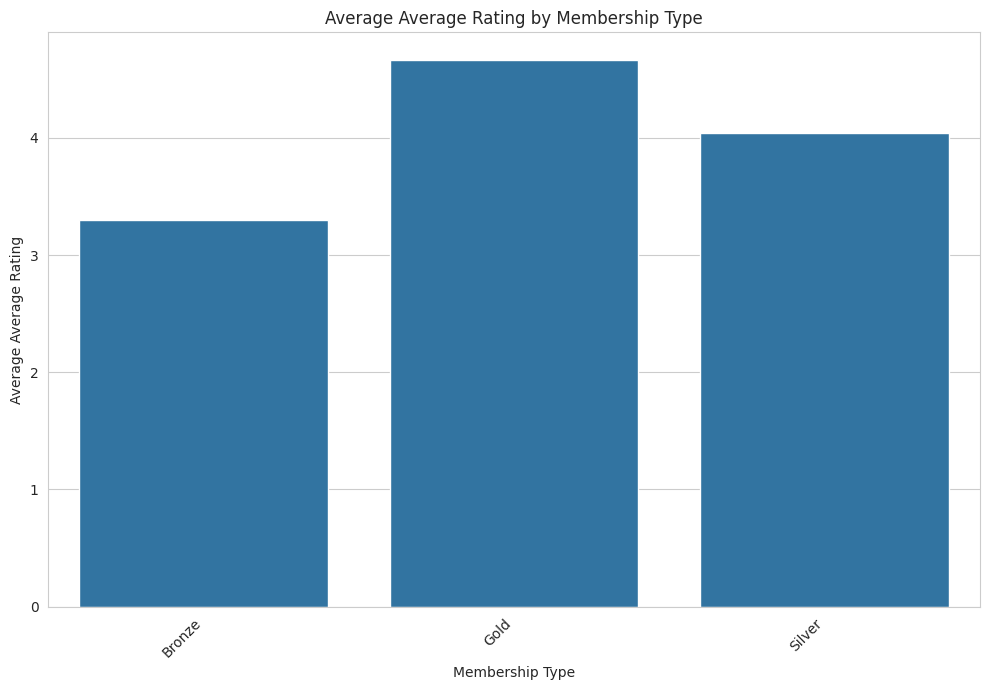

ANOVA Test for Average Rating by Membership Type:
  F-statistic: 45305.95
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Days Since Last Purchase by Membership Type:


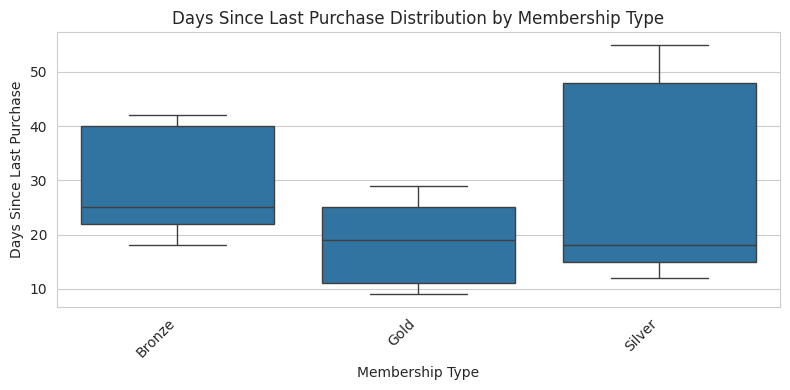

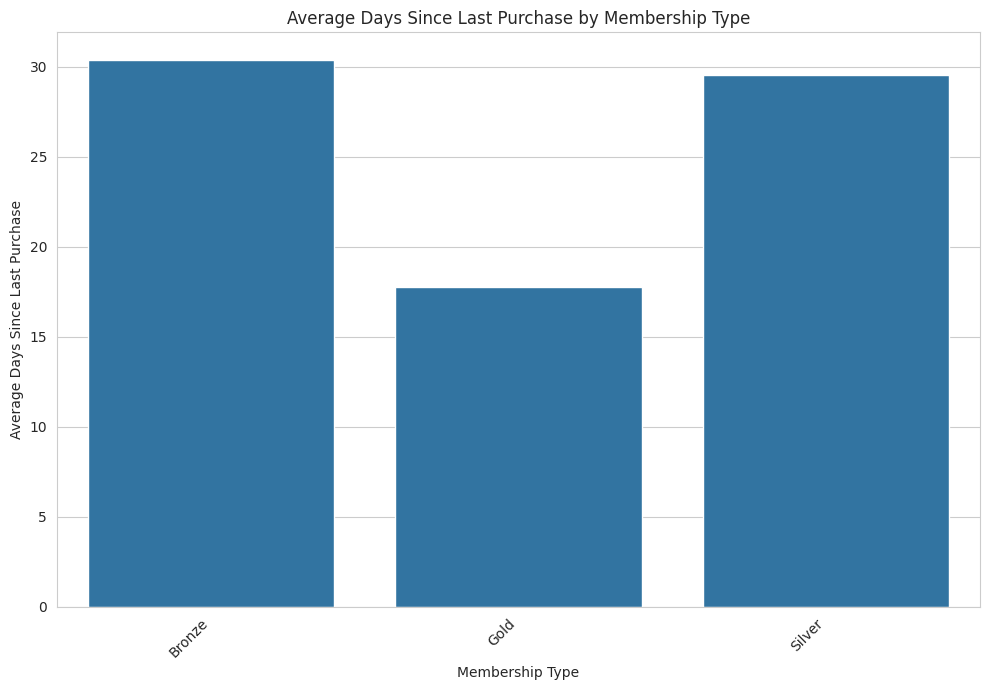

ANOVA Test for Days Since Last Purchase by Membership Type:
  F-statistic: 1321.54
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing price by City:


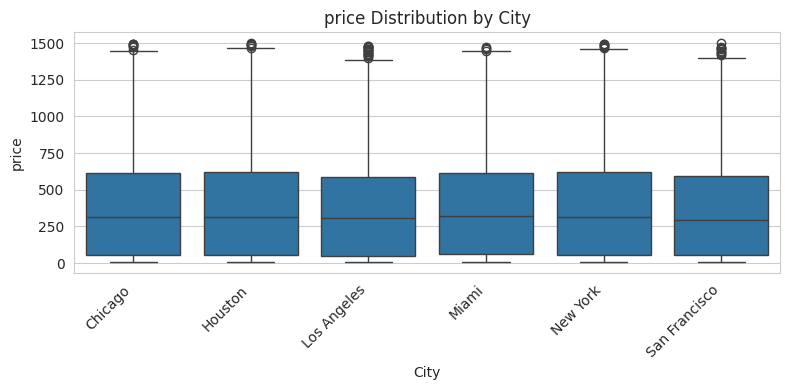

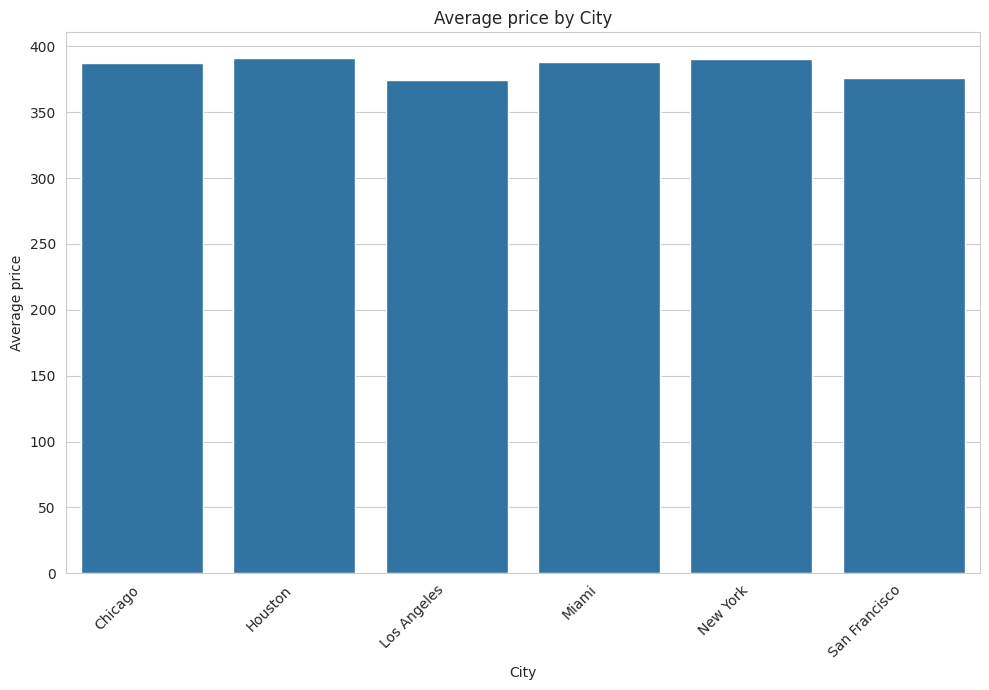

ANOVA Test for price by City:
  F-statistic: 0.72
  P-value: 0.609
  Interpretation: No statistically significant difference in means.

Analyzing Total Spend by City:


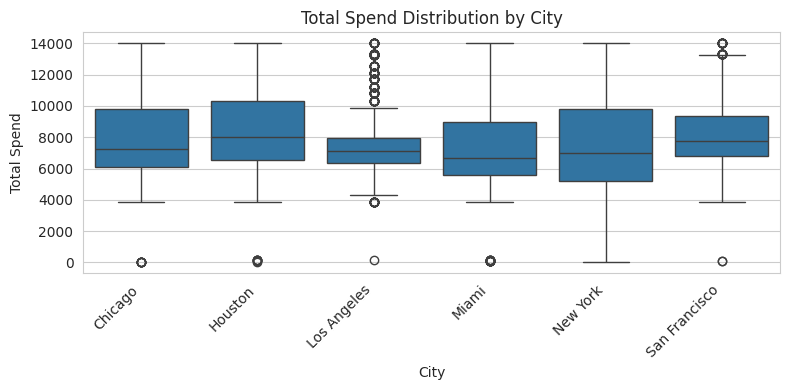

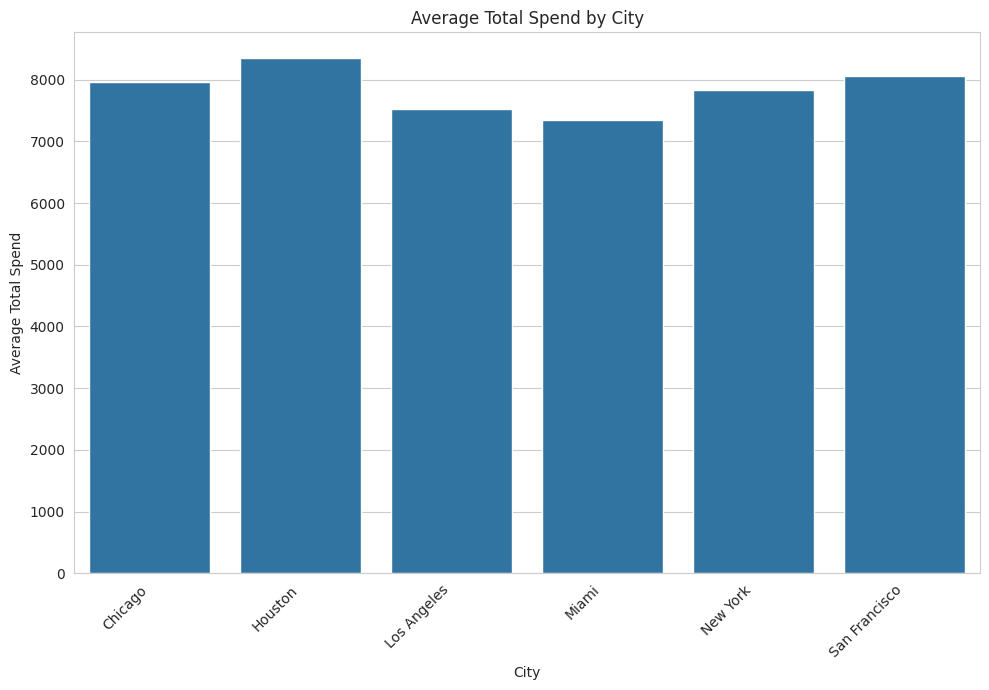

ANOVA Test for Total Spend by City:
  F-statistic: 34.39
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Age by City:


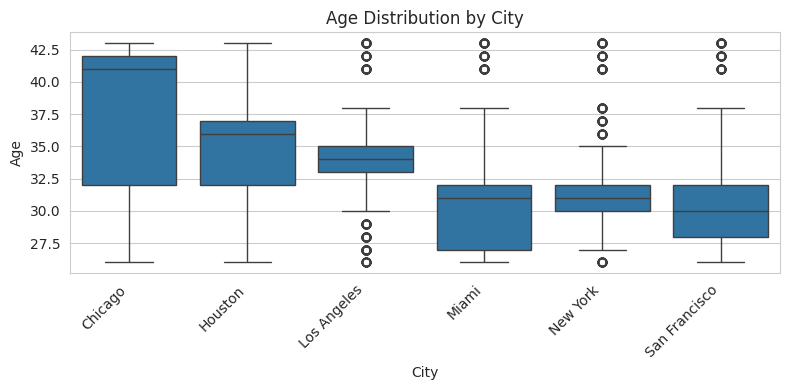

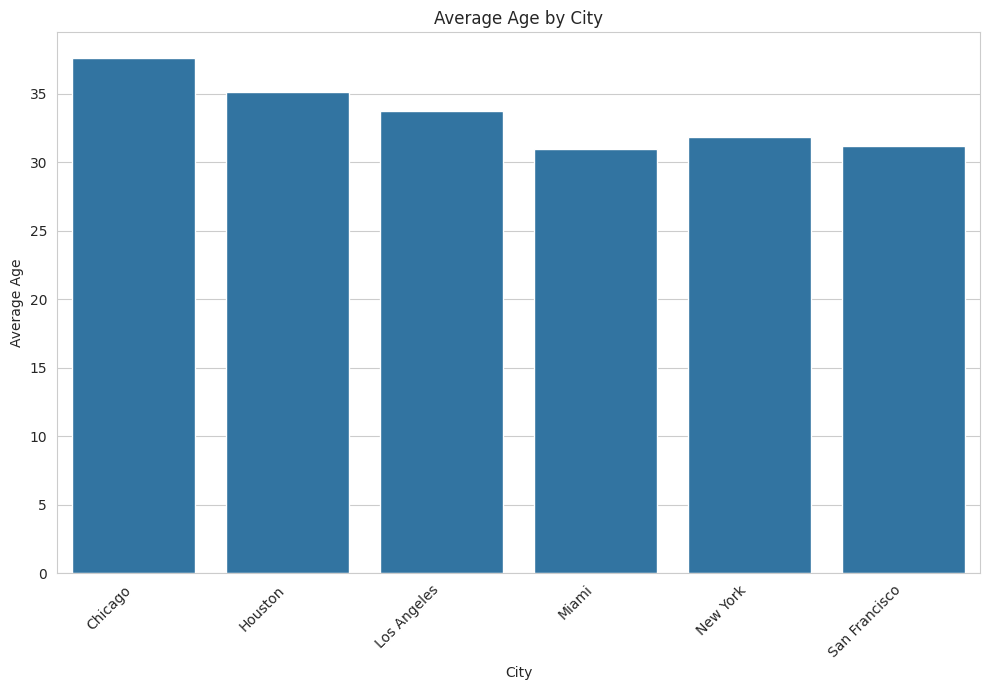

ANOVA Test for Age by City:
  F-statistic: 651.85
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Average Rating by City:


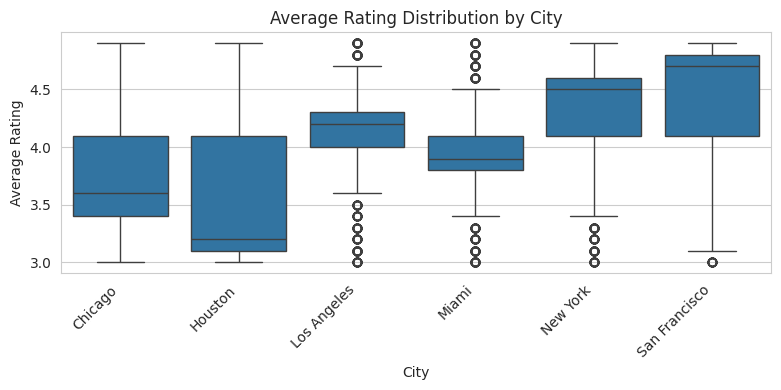

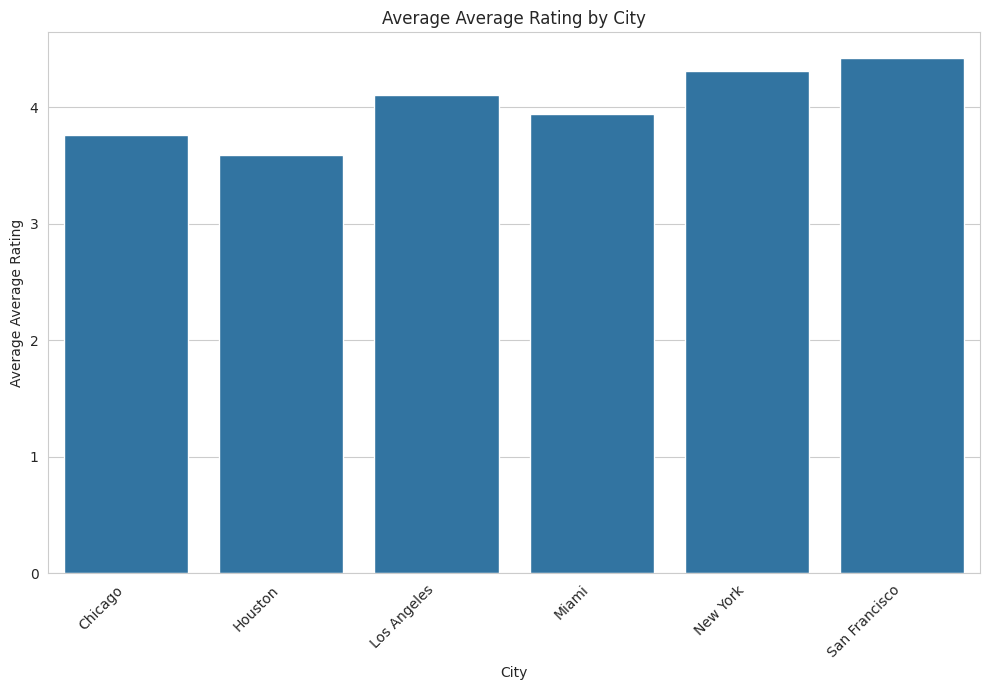

ANOVA Test for Average Rating by City:
  F-statistic: 685.36
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Days Since Last Purchase by City:


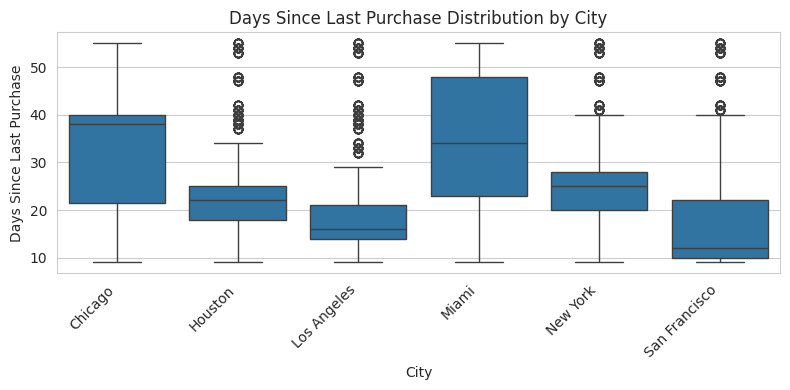

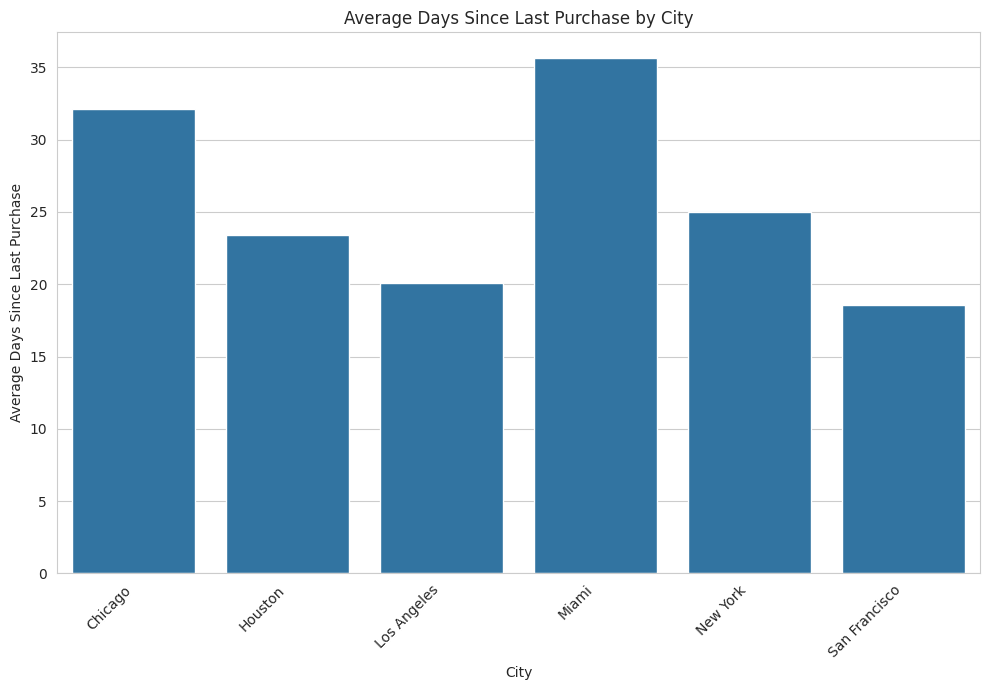

ANOVA Test for Days Since Last Purchase by City:
  F-statistic: 604.50
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing price by brand:


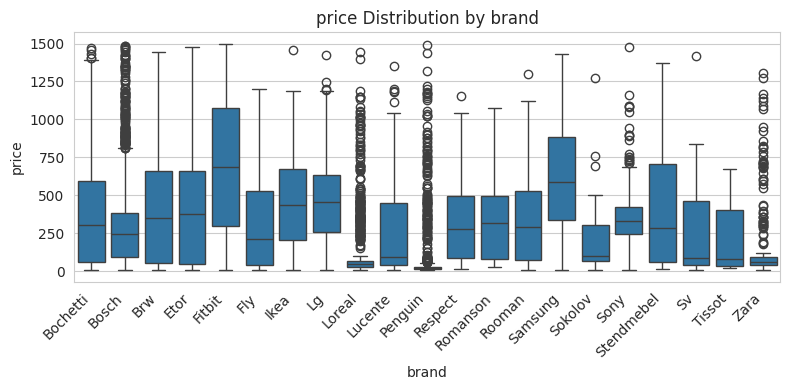

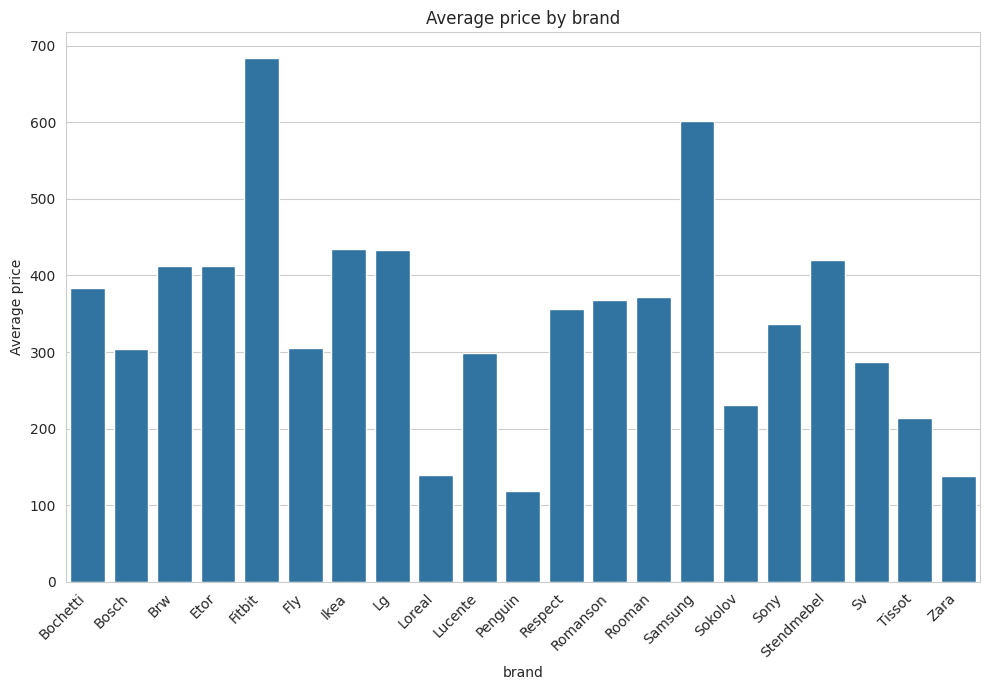

ANOVA Test for price by brand:
  F-statistic: 153.48
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Total Spend by brand:


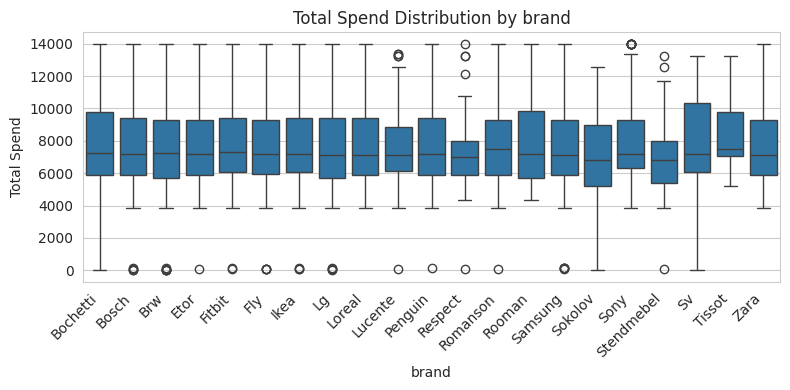

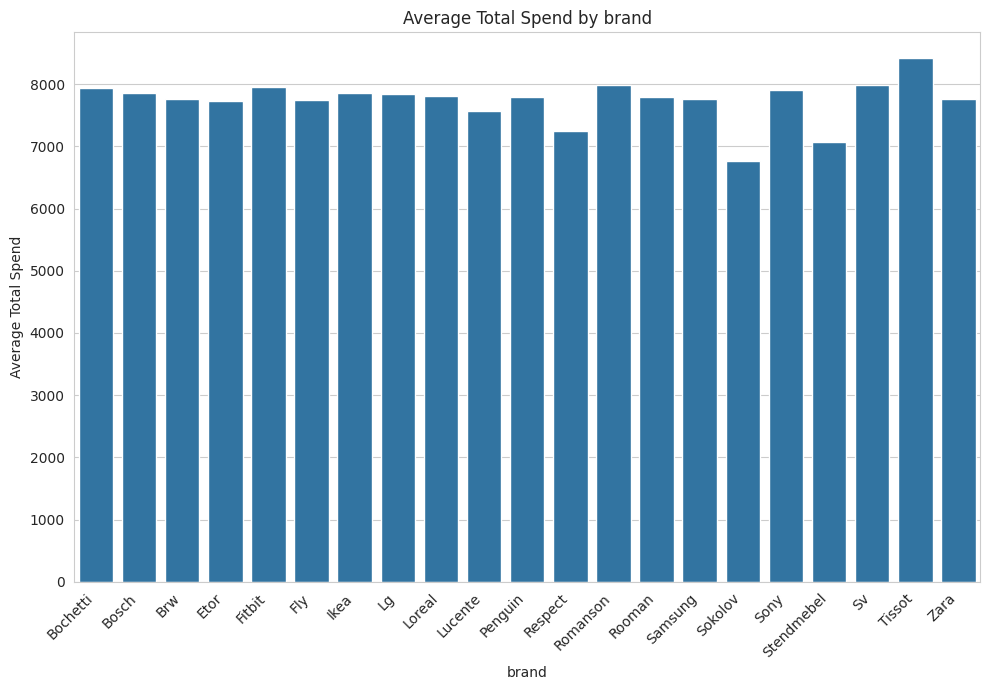

ANOVA Test for Total Spend by brand:
  F-statistic: 1.10
  P-value: 0.339
  Interpretation: No statistically significant difference in means.

Analyzing Age by brand:


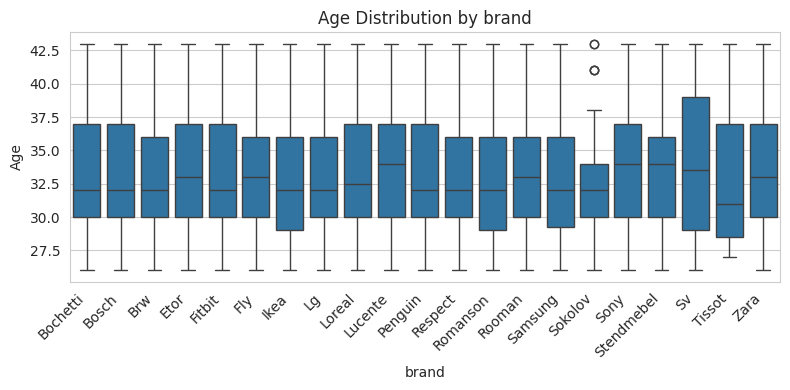

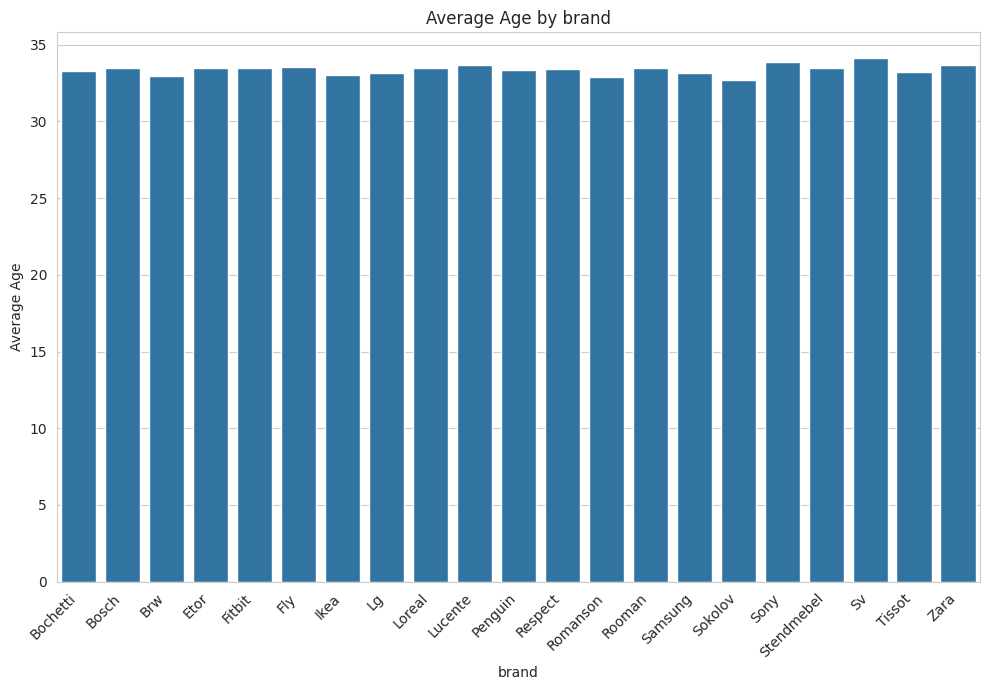

ANOVA Test for Age by brand:
  F-statistic: 1.15
  P-value: 0.287
  Interpretation: No statistically significant difference in means.

Analyzing Average Rating by brand:


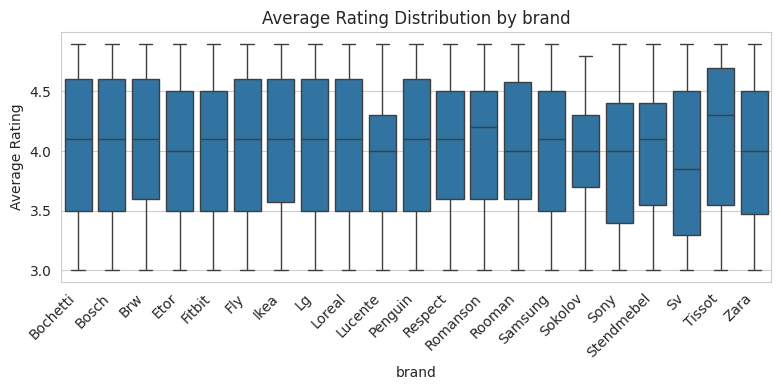

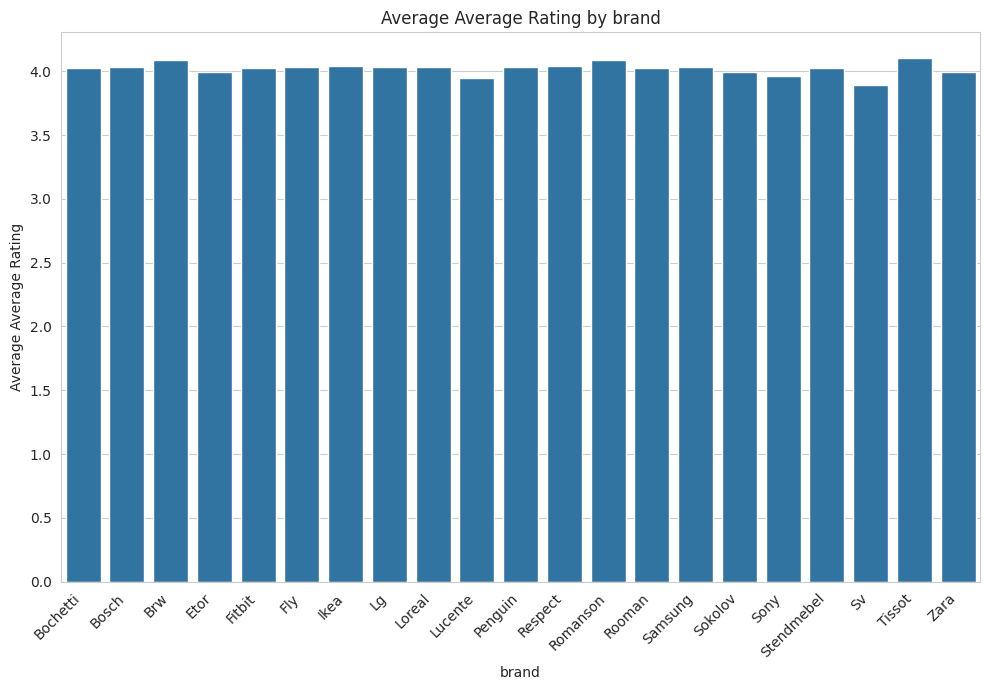

ANOVA Test for Average Rating by brand:
  F-statistic: 0.95
  P-value: 0.524
  Interpretation: No statistically significant difference in means.

Analyzing Days Since Last Purchase by brand:


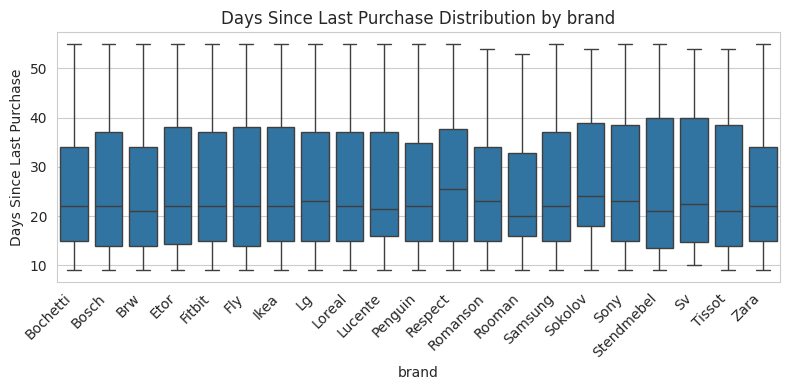

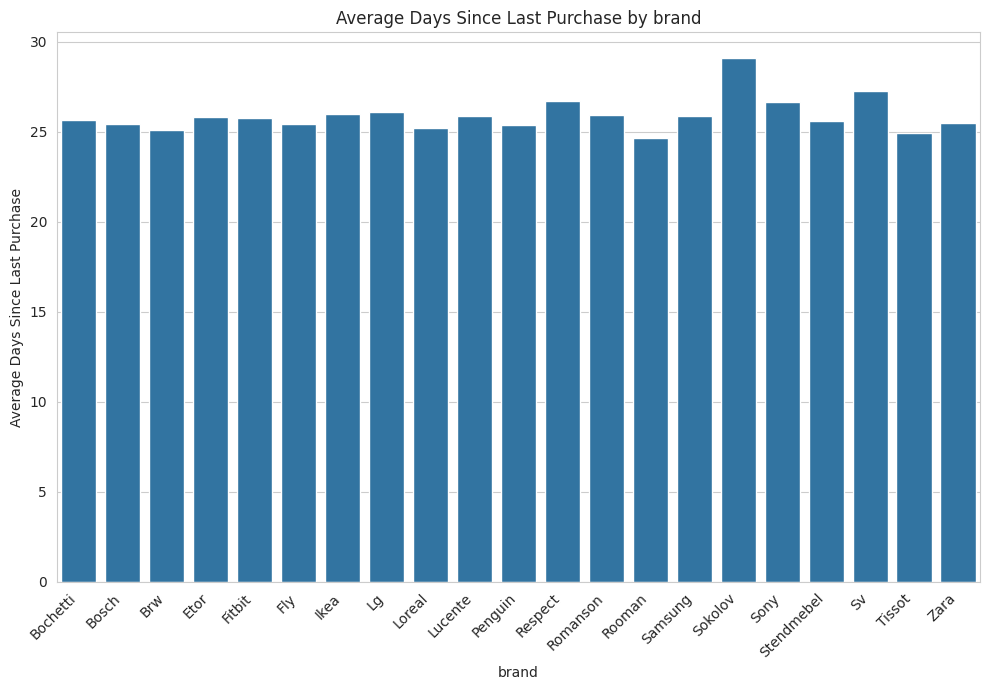

ANOVA Test for Days Since Last Purchase by brand:
  F-statistic: 0.58
  P-value: 0.926
  Interpretation: No statistically significant difference in means.

Analyzing price by category_code:


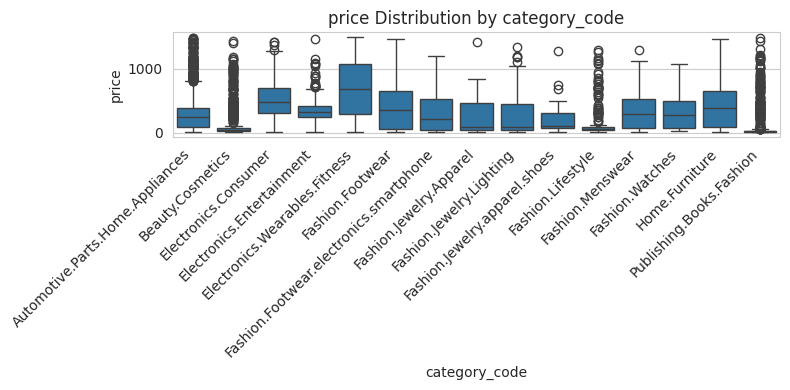

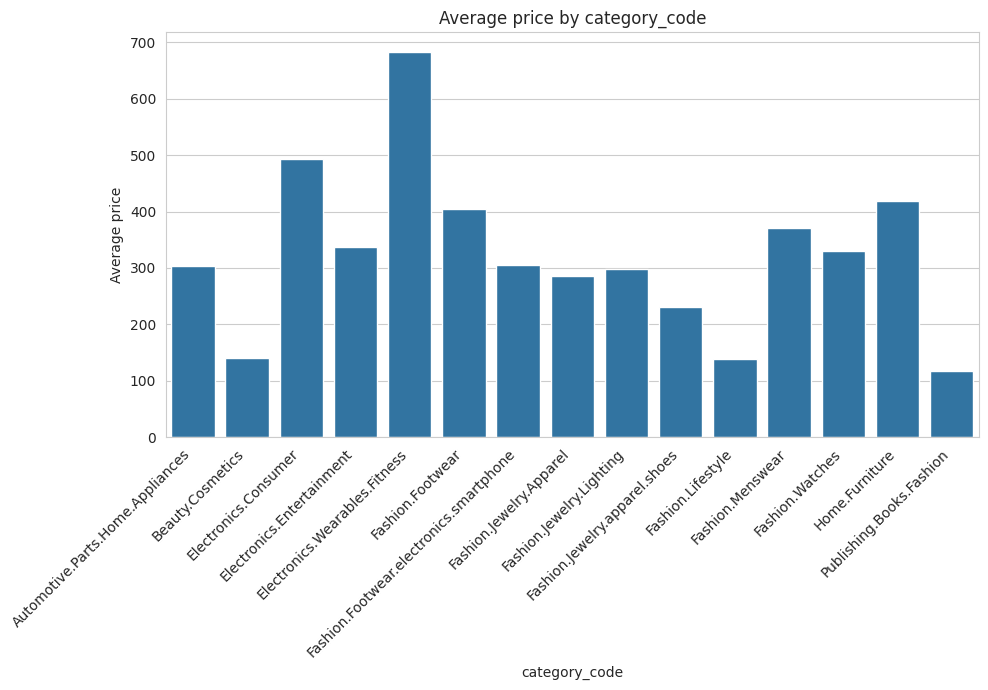

ANOVA Test for price by category_code:
  F-statistic: 208.73
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Total Spend by category_code:


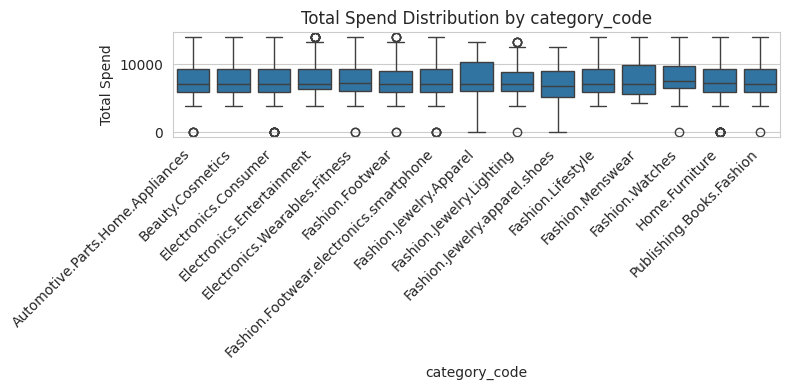

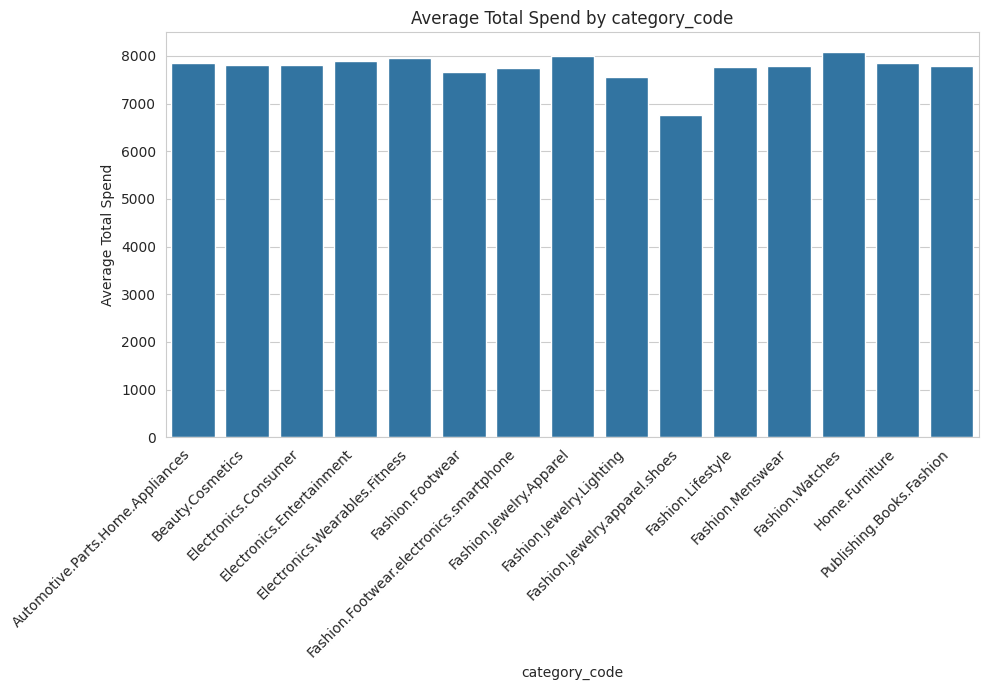

ANOVA Test for Total Spend by category_code:
  F-statistic: 1.09
  P-value: 0.362
  Interpretation: No statistically significant difference in means.

Analyzing Age by category_code:


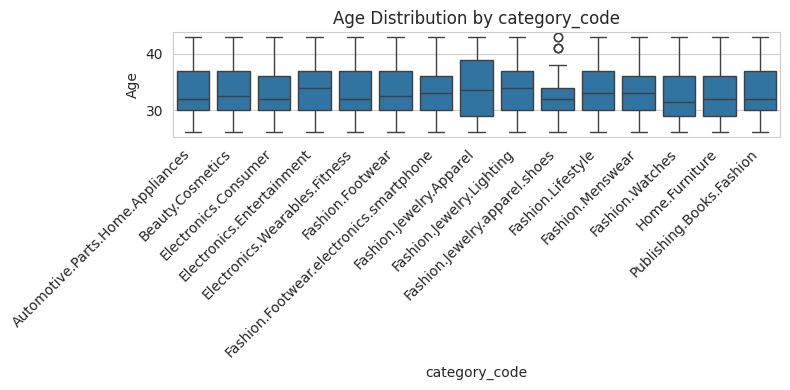

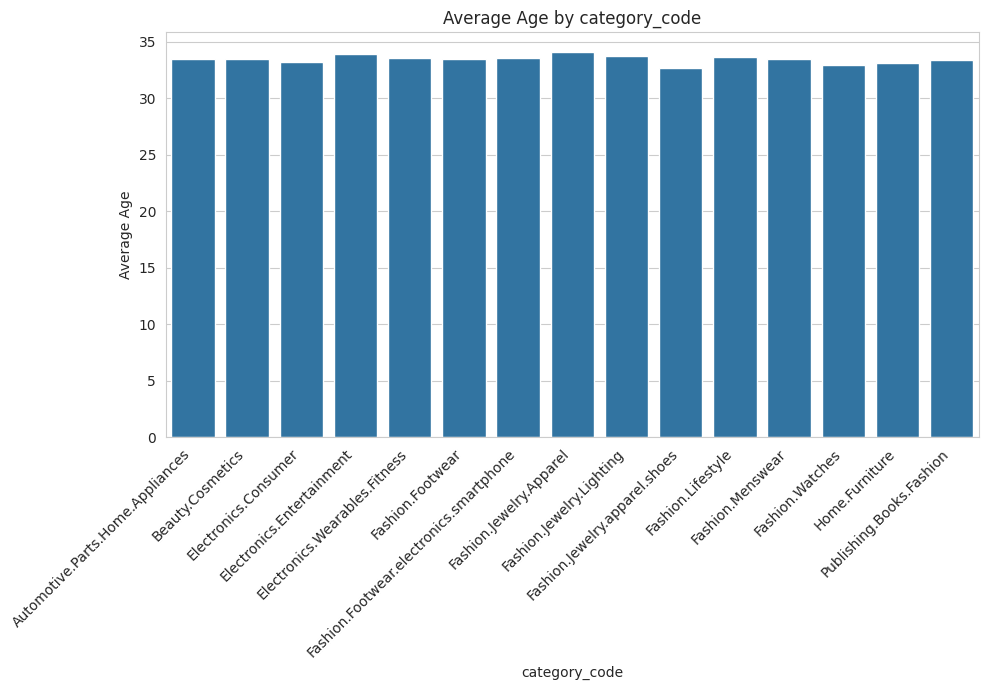

ANOVA Test for Age by category_code:
  F-statistic: 1.53
  P-value: 0.090
  Interpretation: No statistically significant difference in means.

Analyzing Average Rating by category_code:


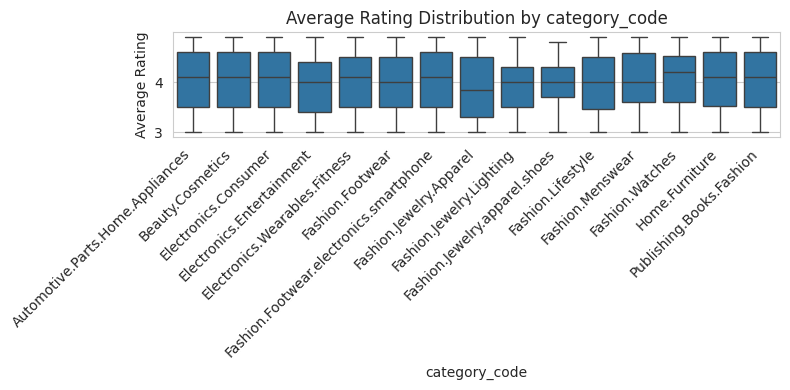

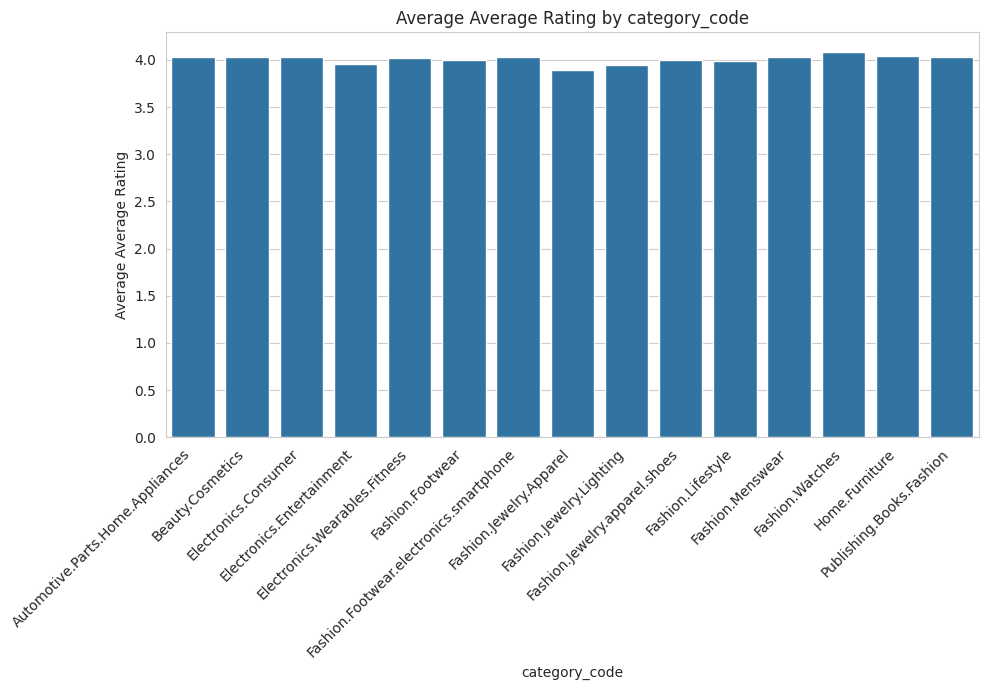

ANOVA Test for Average Rating by category_code:
  F-statistic: 1.12
  P-value: 0.332
  Interpretation: No statistically significant difference in means.

Analyzing Days Since Last Purchase by category_code:


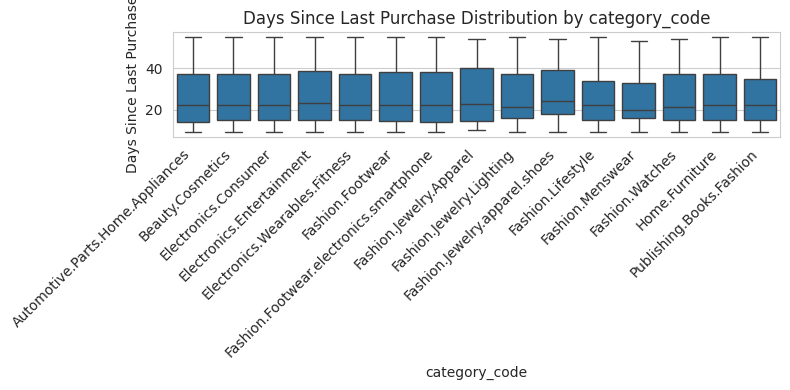

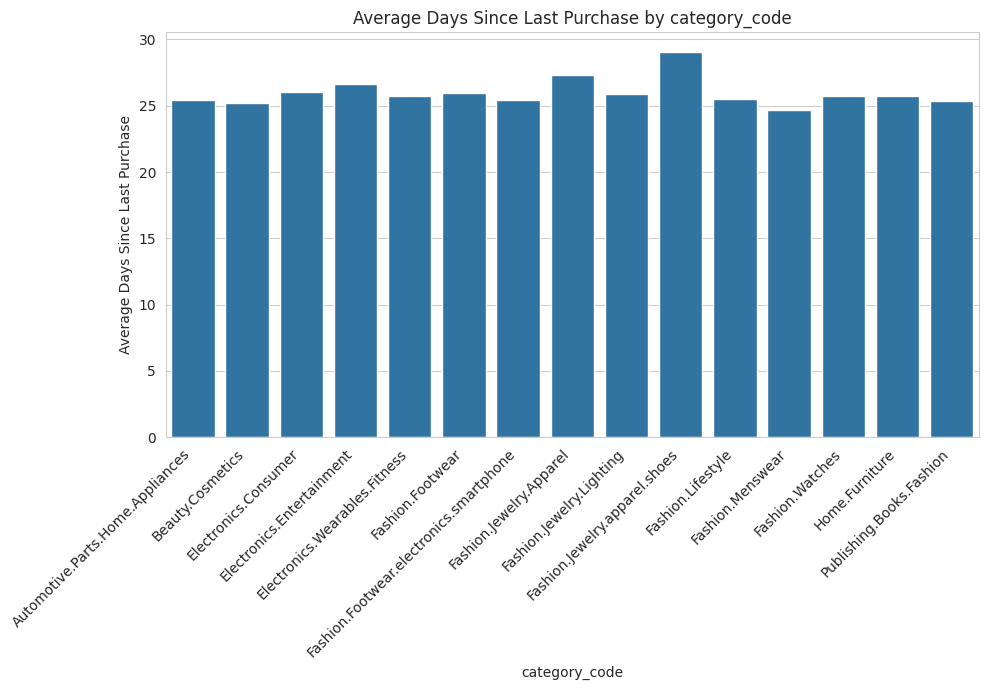

ANOVA Test for Days Since Last Purchase by category_code:
  F-statistic: 0.70
  P-value: 0.777
  Interpretation: No statistically significant difference in means.

Analyzing price by Satisfaction Level:


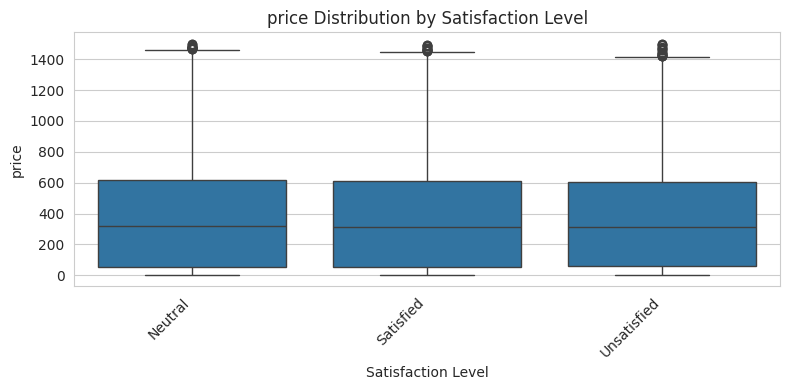

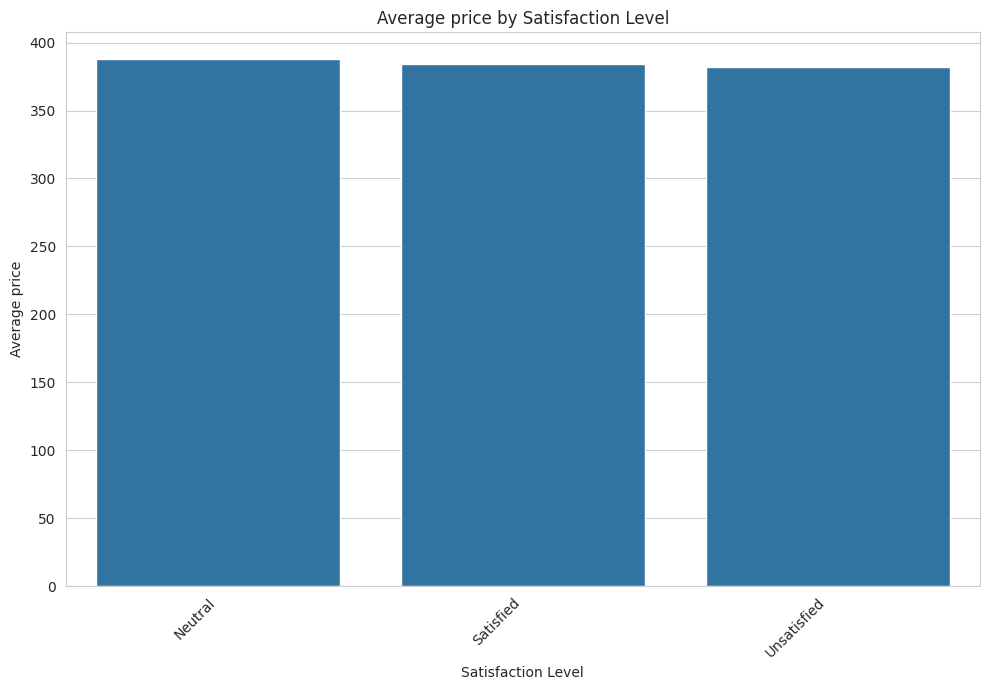

ANOVA Test for price by Satisfaction Level:
  F-statistic: 0.24
  P-value: 0.783
  Interpretation: No statistically significant difference in means.

Analyzing Total Spend by Satisfaction Level:


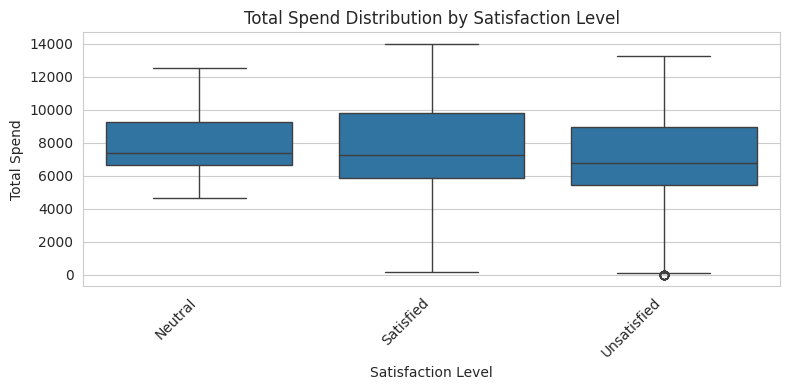

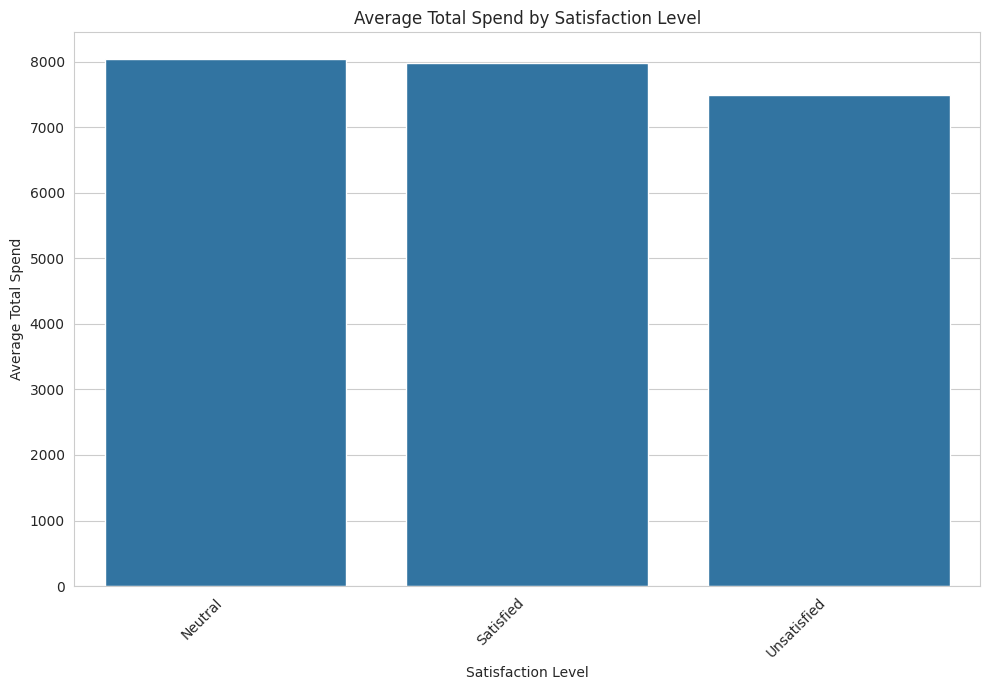

ANOVA Test for Total Spend by Satisfaction Level:
  F-statistic: 47.41
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Age by Satisfaction Level:


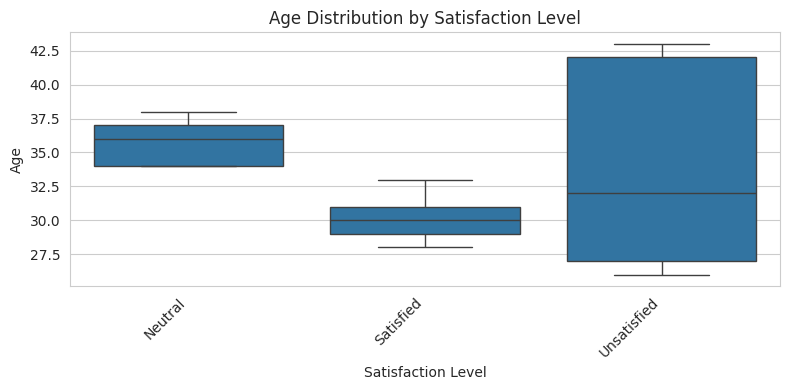

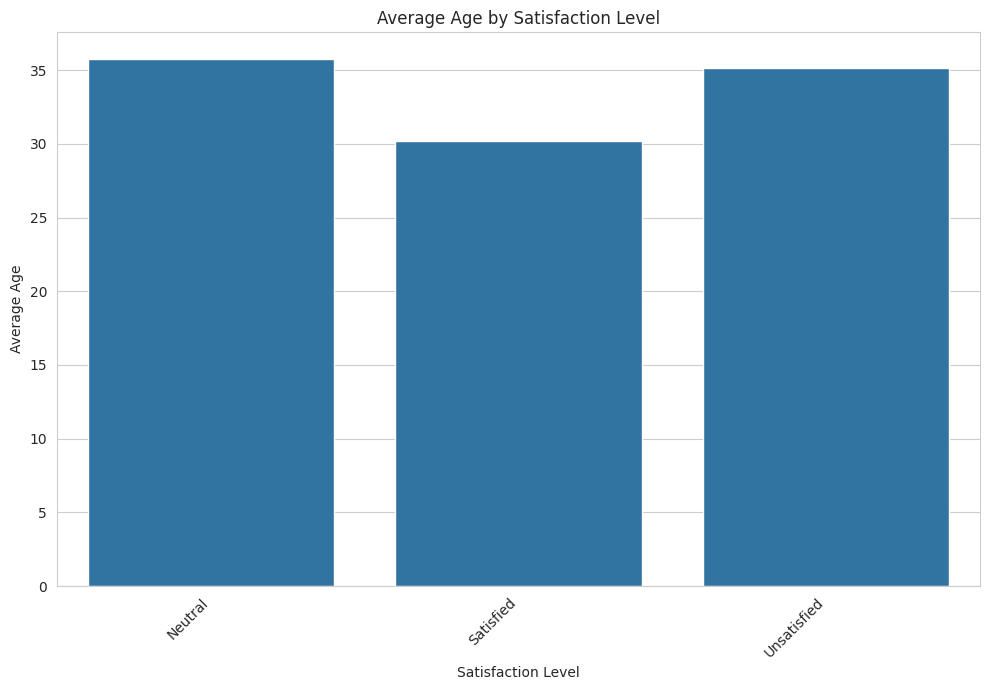

ANOVA Test for Age by Satisfaction Level:
  F-statistic: 2022.83
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Average Rating by Satisfaction Level:


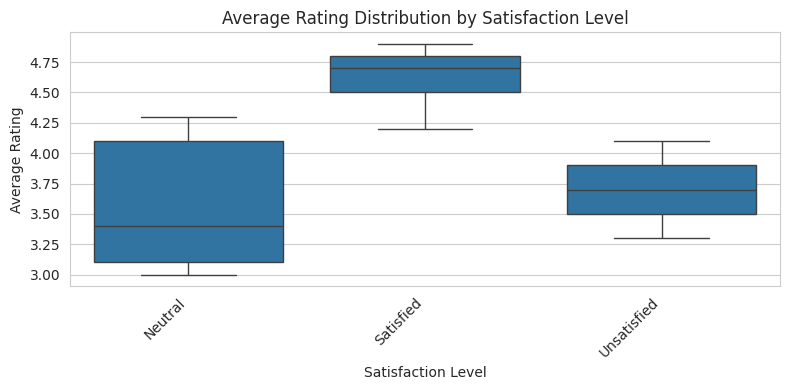

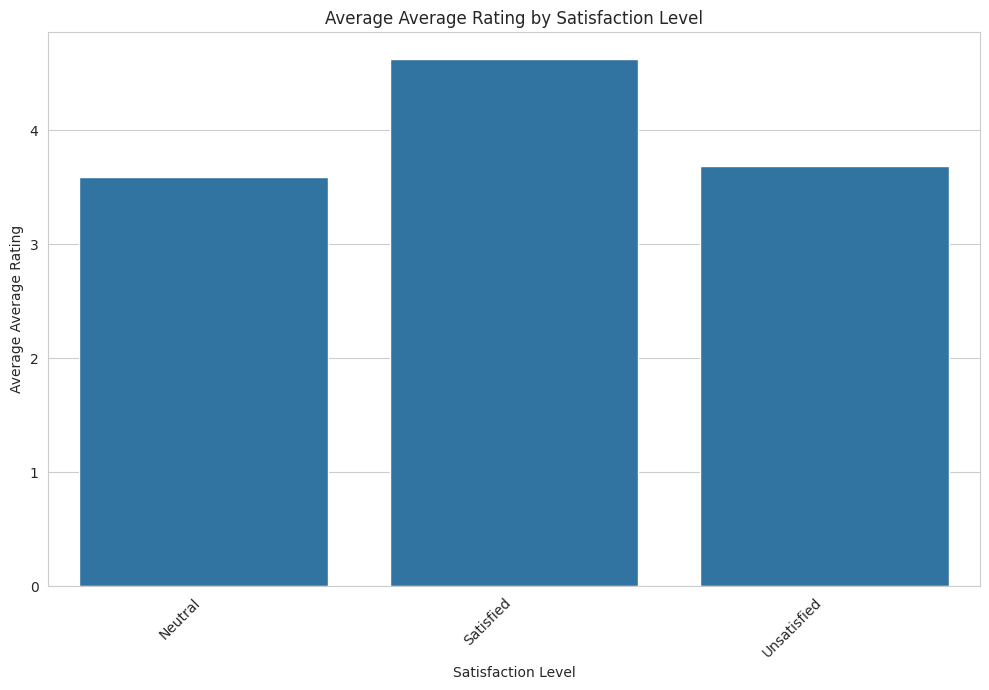

ANOVA Test for Average Rating by Satisfaction Level:
  F-statistic: 10978.87
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

Analyzing Days Since Last Purchase by Satisfaction Level:


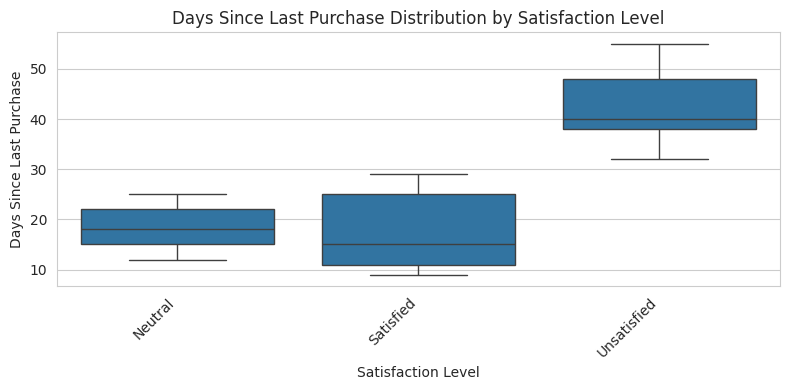

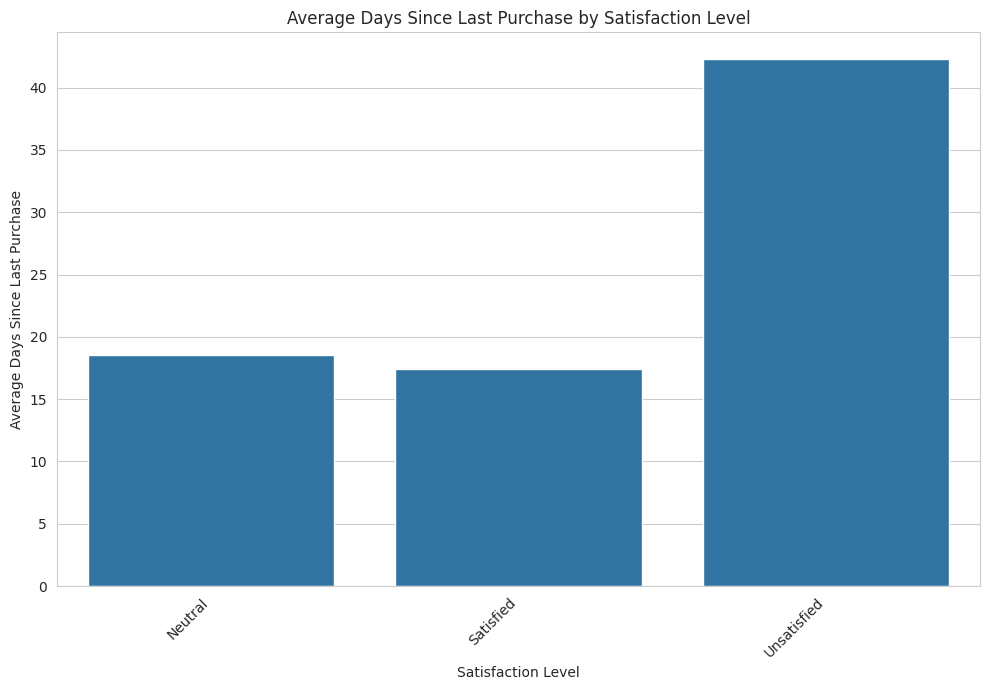

ANOVA Test for Days Since Last Purchase by Satisfaction Level:
  F-statistic: 17303.31
  P-value: 0.000
  Interpretation: There is a statistically significant difference in means.

--- Bivariate Analysis Complete ---


In [ ]:
# Categorical vs. Numerical
# Define categorical and numerical columns for this analysis
# Ensure the categorical columns exist and are of 'category' or 'object' type
# Ensure the numerical columns exist and are truly numerical
categorical_vars = ['event_type', 'Gender', 'Membership Type', 'City', 'Discount Applied', 'brand', 'category_code', 'Satisfaction Level']
numerical_vars = ['price', 'Total Spend', 'Age', 'Items purchased', 'Average Rating', 'Days Since Last Purchase']

# Filter to only include columns present in the DataFrame and with appropriate dtypes
categorical_vars = [col for col in categorical_vars if col in df.columns and (df[col].dtype == 'category' or df[col].dtype == 'object')]
numerical_vars = [col for col in numerical_vars if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if not categorical_vars or not numerical_vars:
    print("Not enough suitable categorical or numerical columns for this analysis.")
else:
    for cat_col in categorical_vars:
        for num_col in numerical_vars:
            print(f"\nAnalyzing {num_col} by {cat_col}:")

            # Box plots/Violin plots
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[cat_col], y=df[num_col])
            # sns.violinplot(x=df[cat_col], y=df[num_col]) # Use violin plots for density insights
            plt.title(f'{num_col} Distribution by {cat_col}')
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            plt.xticks(rotation=45, ha='right') # Rotate labels for readability
            plt.tight_layout()
            plt.show()


# Filter out NaNs if any, for more accurate means
            mean_values = df.groupby(cat_col)[num_col].mean().dropna().sort_values(ascending=False)
            if not mean_values.empty:
                plt.figure(figsize=(10, 7))
                sns.barplot(x=mean_values.index, y=mean_values.values)
                plt.title(f'Average {num_col} by {cat_col}')
                plt.xlabel(cat_col)
                plt.ylabel(f'Average {num_col}')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()


                # ANOVA Test
            # Check if there are at least two unique categories and enough data points per category
            unique_categories = df[cat_col].dropna().unique()
            if len(unique_categories) >= 2:
                groups = [df[num_col][df[cat_col] == cat].dropna() for cat in unique_categories]
                # Ensure all groups have at least one non-NaN value to prevent f_oneway error
                groups = [g for g in groups if len(g) > 0]
                if len(groups) >= 2: # Need at least 2 groups with data to perform ANOVA
                    f_statistic, p_value = f_oneway(*groups)
                    print(f"ANOVA Test for {num_col} by {cat_col}:")
                    print(f"  F-statistic: {f_statistic:.2f}")
                    print(f"  P-value: {p_value:.3f}")
                    if p_value < 0.05:
                        print("  Interpretation: There is a statistically significant difference in means.")
                    else:
                        print("  Interpretation: No statistically significant difference in means.")
                else:
                    print(f"  ANOVA not performed: Not enough valid groups for {cat_col}.")
            else:
                print(f"  ANOVA not performed: {cat_col} has fewer than 2 unique categories or all are NaN.")

print("\n--- Bivariate Analysis Complete ---")

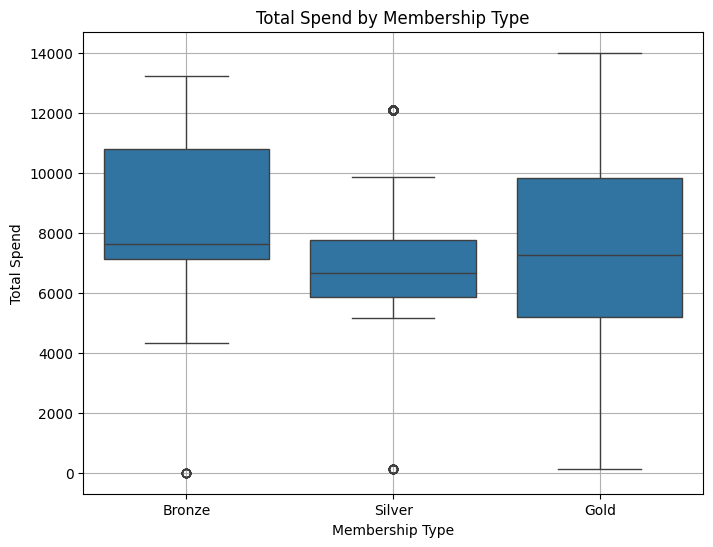

(np.float64(297.4836306854969), np.float64(1.994253084085568e-126))

In [ ]:
#ANOVA TEST ****************************************************

from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Extract groups for ANOVA
bronze = df[df['Membership Type'] == 'Bronze']['Total Spend']
silver = df[df['Membership Type'] == 'Silver']['Total Spend']
gold = df[df['Membership Type'] == 'Gold']['Total Spend']

# Run one-way ANOVA
f_stat, p_value = f_oneway(bronze, silver, gold)

# Plot for visual confirmation
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Membership Type', y='Total Spend')
plt.title('Total Spend by Membership Type')
plt.ylabel('Total Spend')
plt.xlabel('Membership Type')
plt.grid(True)
plt.show()

# Return F-statistic and p-value
f_stat, p_value

Null Hypothesis (H₀):
The mean Total Spend is the same across all Membership Types (Bronze, Silver, Gold).

Alternative Hypothesis (H₁):
At least one group's mean Total Spend is different from the others.

Based on ANOVA Result:
F-statistic = 297.48

p-value ≈ 1.99 × 10^−126

Since p-value < 0.05, we reject the null hypothesis.

Interpretation:
There is strong statistical evidence that Total Spend differs across Membership Types.

This justifies custom strategies per segment, such as:

Gold users → upsell or reward

Bronze users → incentivize to move up

 * Chi-Squared Test:
   * Purpose: To determine if there is a significant association between two categorical variables.
   
Hypotheses for Chi-Squared Test:
 * Null Hypothesis (H_0): The two categorical variables are independent (i.e., there is no association between them).
 * Alternative Hypothesis (H_1): The two categorical variables are dependent (i.e., there is a statistically significant association between them).
Interpretation:
 * If the p-value is less than your chosen significance level (commonly 0.05), you reject the null hypothesis. This suggests that there is a statistically significant association between the two categorical variables.
 * If the p-value is greater than or equal to 0.05, you fail to reject the null hypothesis. This suggests there is no statistically significant association between the two categorical variables

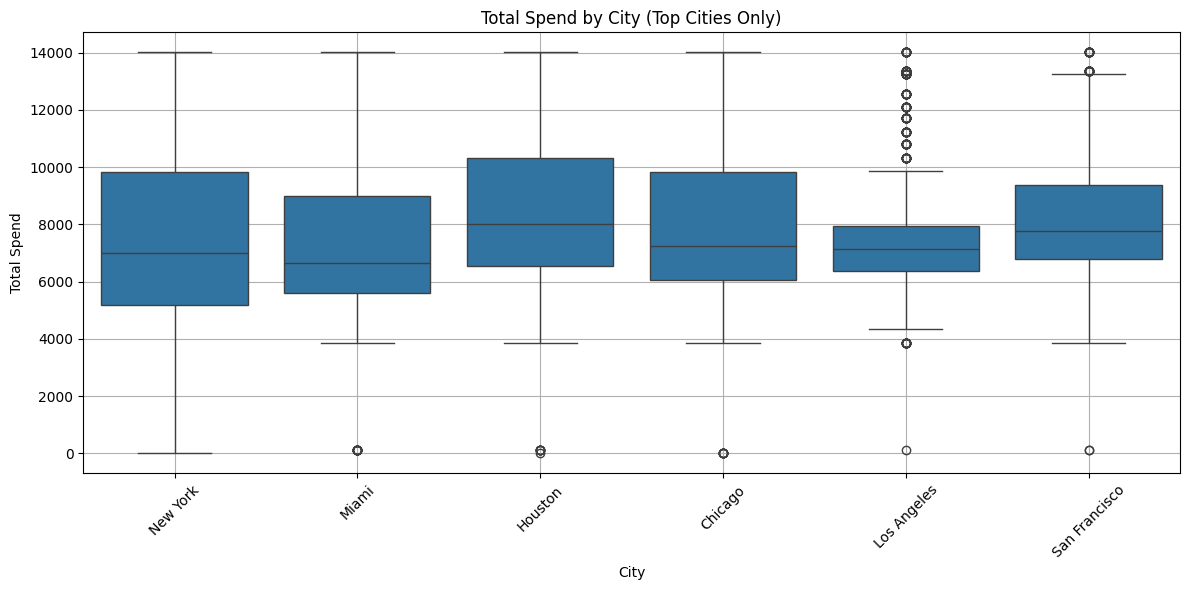

(np.float64(34.390501190537194), np.float64(5.442732297005907e-35))

In [ ]:
# Count number of entries per city to ensure each group has data
city_counts = df['City'].value_counts()

# Filter to include only cities with more than 10 users for statistical relevance
valid_cities = city_counts[city_counts > 10].index.tolist()
df_filtered_cities = df[df['City'].isin(valid_cities)]

# Prepare data groups for ANOVA
city_groups = [group['Total Spend'].values for name, group in df_filtered_cities.groupby('City')]

# Run one-way ANOVA
f_stat_city, p_value_city = f_oneway(*city_groups)

# Plot for visual comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered_cities, x='City', y='Total Spend')
plt.title('Total Spend by City (Top Cities Only)')
plt.ylabel('Total Spend')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Return F-statistic and p-value
f_stat_city, p_value_city

Null Hypothesis (H₀): All cities have the same average Total Spend.

Alternative Hypothesis (H₁): At least one city's average Total Spend is different.

ANOVA Result: Total Spend by City
Statistic	Value
F-statistic	34.39
p-value	5.44 × 10⁻³⁵

The p-value is extremely small (≪ 0.05), so we reject the null hypothesis.

This means:

There is a statistically significant difference in average Total Spend across different cities.

Business Insight:
Spending behavior varies across locations — you can tailor pricing, promotions, and inventory by city.

Design targeted campaigns:
- Rewards for Gold members
- Re-engagement for low-spend cities
- Rating-based email follow-ups

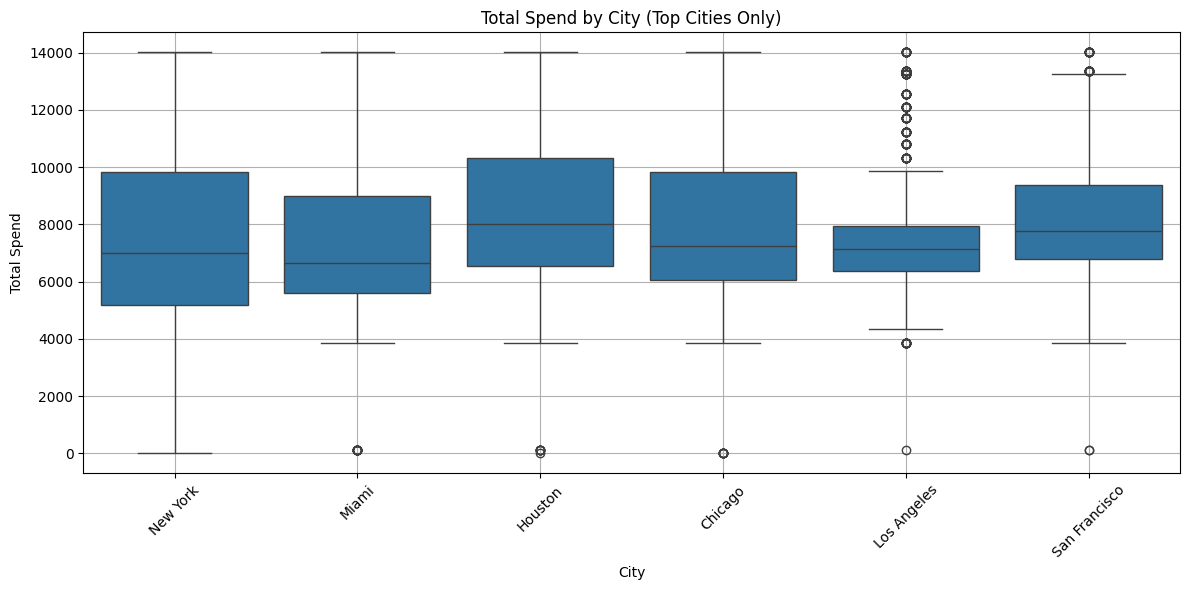

(np.float64(34.390501190537194), np.float64(5.442732297005907e-35))

In [ ]:
# Count number of entries per city to ensure each group has data
city_counts = df['City'].value_counts()

# Filter to include only cities with more than 10 users for statistical relevance
valid_cities = city_counts[city_counts > 10].index.tolist()
df_filtered_cities = df[df['City'].isin(valid_cities)]

# Prepare data groups for ANOVA
city_groups = [group['Total Spend'].values for name, group in df_filtered_cities.groupby('City')]

# Run one-way ANOVA
f_stat_city, p_value_city = f_oneway(*city_groups)

# Plot for visual comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered_cities, x='City', y='Total Spend')
plt.title('Total Spend by City (Top Cities Only)')
plt.ylabel('Total Spend')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Return F-statistic and p-value
f_stat_city, p_value_city

Null Hypothesis (H₀): All cities have the same average Total Spend.

Alternative Hypothesis (H₁): At least one city's average Total Spend is different.

ANOVA Result: Total Spend by City
Statistic	Value
F-statistic	34.39
p-value	5.44 × 10⁻³⁵

The p-value is extremely small (≪ 0.05), so we reject the null hypothesis.

This means:

There is a statistically significant difference in average Total Spend across different cities.

Business Insight:
Spending behavior varies across locations — you can tailor pricing, promotions, and inventory by city.

Design targeted campaigns:
- Rewards for Gold members
- Re-engagement for low-spend cities
- Rating-based email follow-ups

Customer Segment  User Count
0         Bronze | Chicago | Medium           9
1     Silver | Los Angeles | Medium           6
2               Gold | Miami | High           5
3           Silver | Miami | Medium           5
4            Gold | New York | High           4
5       Gold | San Francisco | High           4
6   Silver | San Francisco | Medium           3
7         Silver | Chicago | Medium           3
8           Bronze | Miami | Medium           2
9         Bronze | Houston | Medium           2
10  Bronze | San Francisco | Medium           2
11    Bronze | Los Angeles | Medium           2
12            Gold | Chicago | High           2
13        Gold | Los Angeles | High           1
14         Gold | New York | Medium           1
15    Gold | San Francisco | Medium           1
16        Silver | Houston | Medium           1

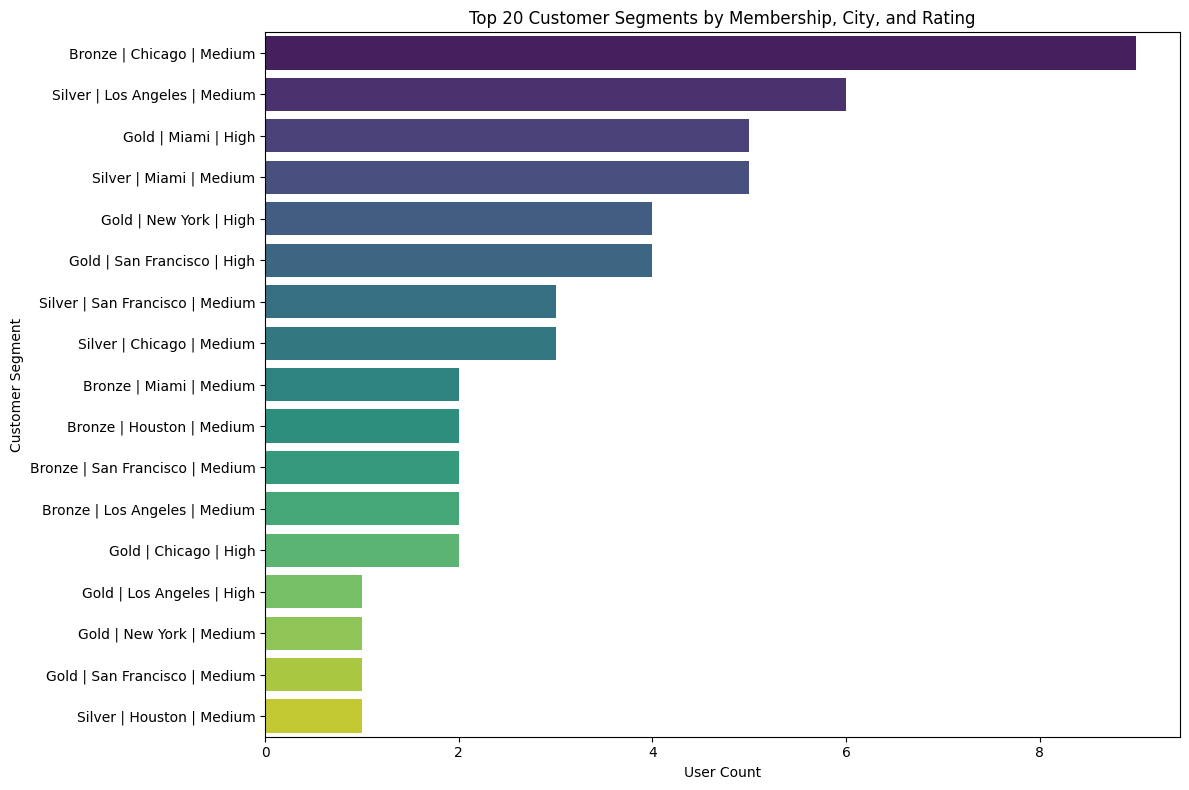

In [ ]:
# Create simplified rating behavior categories
def categorize_rating(rating):
    if rating >= 4.5:
        return 'High'
    elif rating >= 3.0:
        return 'Medium'
    else:
        return 'Low'

# Apply rating categorization
df['Rating Category'] = df['Average Rating'].apply(categorize_rating)

# Select latest row per user for stable segmentation
latest_df = df.sort_values('event_time').drop_duplicates('user_id', keep='last')

# Create customer segments by combining Membership, City, and Rating Category
latest_df['Customer Segment'] = (
    latest_df['Membership Type'] + ' | ' +
    latest_df['City'] + ' | ' +
    latest_df['Rating Category']
)

# Count number of users per segment
segment_counts = latest_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'User Count']

# Display the segments
display(segment_counts)

# Visualize top 20 customer segments by user count
top_segments = segment_counts.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_segments, y='Customer Segment', x='User Count', palette='viridis')
plt.title('Top 20 Customer Segments by Membership, City, and Rating')
plt.xlabel('User Count')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

 Insights:
Some segments like “Bronze | Chicago | Medium” and “Silver | Los Angeles | Medium” have the highest number of users.

You can focus retention or upgrade efforts on popular low-spend segments.

High-value, low-count segments like “Gold | Miami | High” could receive loyalty rewards.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

In [ ]:
#  Is 'Gender' associated with 'Membership Type'? ---

print("--- Chi-Squared Test: Gender vs. Membership Type ---")

# Create a contingency table (cross-tabulation)
# Ensure both columns exist in your DataFrame
if 'Gender' in df.columns and 'Membership Type' in df.columns:
    contingency_table_gender_membership = pd.crosstab(df['Gender'], df['Membership Type'])
    print("Contingency Table (Gender vs. Membership Type):")
    print(contingency_table_gender_membership)
    print("-" * 50)

    # Perform the Chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table_gender_membership)

    print(f"Chi-squared statistic: {chi2:.2f}")
    print(f"P-value: {p_value:.3f}")
    print(f"Degrees of freedom: {dof}")
    # print("Expected frequencies table:")
    # print(pd.DataFrame(expected, index=contingency_table_gender_membership.index, columns=contingency_table_gender_membership.columns))

    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a statistically significant association between Gender and Membership Type (p < {alpha}).")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between Gender and Membership Type (p >= {alpha}).")
else:
    print("Columns 'Gender' or 'Membership Type' not found in DataFrame. Skipping this test.")

print("\n" + "="*70 + "\n")


--- Chi-Squared Test: Gender vs. Membership Type ---
Contingency Table (Gender vs. Membership Type):
Membership Type  Bronze  Gold  Silver
Gender                               
Female             3323  1940       0
Male                  0  1761    3580
--------------------------------------------------
Chi-squared statistic: 6911.46
P-value: 0.000
Degrees of freedom: 2
Conclusion: Reject the null hypothesis. There is a statistically significant association between Gender and Membership Type (p < 0.05).




In [ ]:
# Is 'event_type' associated with 'brand'? ---

print("--- Chi-Squared Test: event_type vs. brand ---")

# Create a contingency table
# Ensure both columns exist in your DataFrame
if 'event_type' in df.columns and 'brand' in df.columns:
    # It's good practice to drop rows with NaN in these specific columns for crosstab
    # or handle them beforehand, as crosstab will drop them by default.
    contingency_table_event_brand = pd.crosstab(df['event_type'], df['brand'])
    print("Contingency Table (event_type vs. brand):")
    print(contingency_table_event_brand)
    print("-" * 50)

    # Perform the Chi-squared test
    # Chi-squared requires expected frequencies to be at least 5 for most cells.
    # If not, results might be unreliable. Check expected table if concerned.
    chi2, p_value, dof, expected = chi2_contingency(contingency_table_event_brand)

    print(f"Chi-squared statistic: {chi2:.2f}")
    print(f"P-value: {p_value:.3f}")
    print(f"Degrees of freedom: {dof}")
    # print("Expected frequencies table:")
    # print(pd.DataFrame(expected, index=contingency_table_event_brand.index, columns=contingency_table_event_brand.columns))

    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a statistically significant association between event_type and brand (p < {alpha}).")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no statistically significant association between event_type and brand (p >= {alpha}).")
else:
    print("Columns 'event_type' or 'brand' not found in DataFrame. Skipping this test.")

print("\n" + "="*70 + "\n")


--- Chi-Squared Test: event_type vs. brand ---
Contingency Table (event_type vs. brand):
brand       Bochetti  Bosch  Brw  Etor  Fitbit  Fly  Ikea   Lg  Loreal  \
event_type                                                               
cart             106    400   83    79     313   55   260  196     164   
purchase          52    212   30    26     156   25   124   90      93   
view             356   1317  283   241    1054  187   844  715     587   

brand       Lucente  ...  Respect  Romanson  Rooman  Samsung  Sokolov  Sony  \
event_type           ...                                                      
cart             15  ...       12         7      17      129        6   105   
purchase         15  ...        3         9       7       55        5    38   
view             76  ...       51        57      62      378       26   340   

brand       Stendmebel  Sv  Tissot  Zara  
event_type                                
cart                 4   5       4    60  
purchase       

T-test
Compare the means of two groups, Is there a significant difference in total spend between male and female


Hypotheses for T-test:
 * Null Hypothesis (H_0): There is no significant difference in the mean Total Spend between male and female customers .
 * Alternative Hypothesis (H_1): There is a significant difference in the mean Total Spend between male and female customers

In [ ]:
from scipy import stats

In [ ]:
# 1. Prepare the data: Filter for 'purchase' events and separate Total Spend by Gender
# It's important to analyze 'Total Spend' only for actual purchase events.
purchase_data = df[df['event_type'] == 'purchase'].copy()

# Ensure 'Gender' column exists and is clean
if 'Gender' in purchase_data.columns and 'Total Spend' in purchase_data.columns:
    # Drop rows where Gender or Total Spend might be missing (if any)
    purchase_data.dropna(subset=['Gender', 'Total Spend'], inplace=True)

    # Convert Gender to string to handle potential categorical dtype issues for filtering
    purchase_data['Gender'] = purchase_data['Gender'].astype(str)

    # Get the Total Spend for Male customers
    # Ensure the exact string 'Male' or 'Female' matches your data's unique values
    male_spend = purchase_data[purchase_data['Gender'] == 'Male']['Total Spend']

    # Get the Total Spend for Female customers
    female_spend = purchase_data[purchase_data['Gender'] == 'Female']['Total Spend']

    # Check if groups have enough data to perform the test
    if len(male_spend) > 1 and len(female_spend) > 1:
        print("--- T-test: Difference in Total Spend between Male and Female Customers ---")
        print(f"Mean Total Spend for Male: {male_spend.mean():.2f}")
        print(f"Mean Total Spend for Female: {female_spend.mean():.2f}")
        print(f"Number of Male purchases: {len(male_spend)}")
        print(f"Number of Female purchases: {len(female_spend)}")

        # Perform the independent samples t-test
        # We'll use equal_var=False (Welch's t-test) which does not assume equal population variances,
        # making it more robust in many real-world scenarios.
        t_statistic, p_value = stats.ttest_ind(male_spend, female_spend, equal_var=False)

        print(f"\nT-statistic: {t_statistic:.2f}")
        print(f"P-value: {p_value:.3f}")

        alpha = 0.05
        if p_value < alpha:
            print(f"Conclusion: Reject the null hypothesis. There is a statistically significant difference in Total Spend between Male and Female customers (p < {alpha}).")
        else:
            print(f"Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in Total Spend between Male and Female customers (p >= {alpha}).")
    else:
        print("Not enough data for one or both gender groups to perform the T-test.")
        print(f"Male spend data points: {len(male_spend)}")
        print(f"Female spend data points: {len(female_spend)}")

else:
    print("Columns 'Gender' or 'Total Spend' not found in DataFrame, or 'event_type' filtering issue.")

print("\n--- T-test Analysis Complete ---")

--- T-test: Difference in Total Spend between Male and Female Customers ---
Mean Total Spend for Male: 7619.96
Mean Total Spend for Female: 8626.54
Number of Male purchases: 504
Number of Female purchases: 560

T-statistic: -6.45
P-value: 0.000
Conclusion: Reject the null hypothesis. There is a statistically significant difference in Total Spend between Male and Female customers (p < 0.05).

--- T-test Analysis Complete ---


* Correlation Analysis:
   * Quantify the linear relationship between numerical variables (Pearson correlation coefficient).
   * For non-linear or ordinal relationships, consider Spearman or Kendall correlation.


--- Correlation Analysis ---

### Pearson Correlation Matrix (Linear Relationship) ###


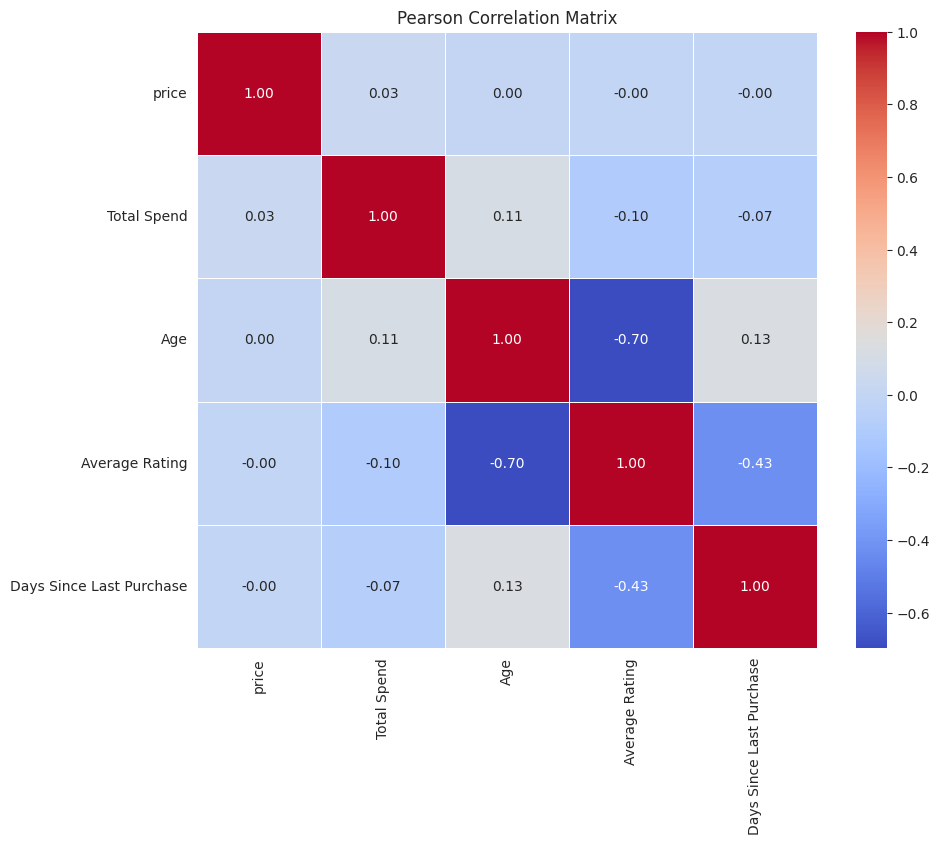

                             price  Total Spend       Age  Average Rating  \
price                     1.000000     0.026702  0.002760       -0.002563   
Total Spend               0.026702     1.000000  0.108861       -0.099584   
Age                       0.002760     0.108861  1.000000       -0.697353   
Average Rating           -0.002563    -0.099584 -0.697353        1.000000   
Days Since Last Purchase -0.004889    -0.069984  0.130224       -0.426917   

                          Days Since Last Purchase  
price                                    -0.004889  
Total Spend                              -0.069984  
Age                                       0.130224  
Average Rating                           -0.426917  
Days Since Last Purchase                  1.000000  

Interpretation: Values closer to 1 or -1 indicate stronger linear relationships.

### Spearman Correlation Matrix (Monotonic Relationship) ###


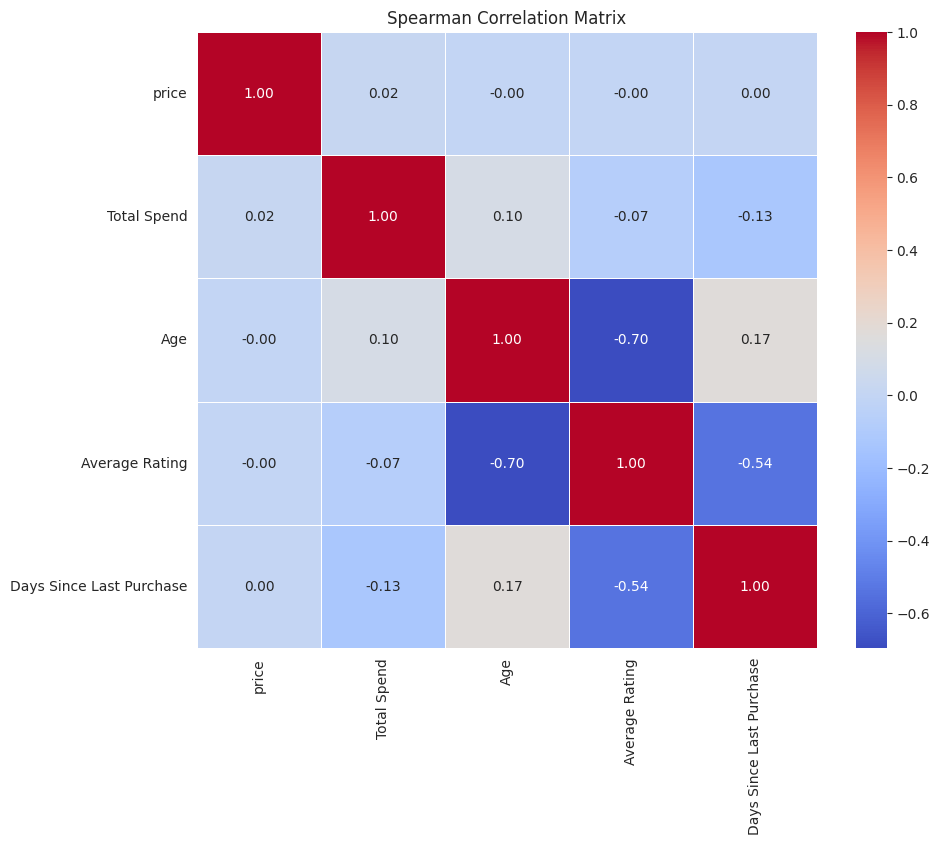

                             price  Total Spend       Age  Average Rating  \
price                     1.000000     0.019683 -0.001145       -0.001110   
Total Spend               0.019683     1.000000  0.104202       -0.070038   
Age                      -0.001145     0.104202  1.000000       -0.695550   
Average Rating           -0.001110    -0.070038 -0.695550        1.000000   
Days Since Last Purchase  0.003231    -0.129525  0.166158       -0.541393   

                          Days Since Last Purchase  
price                                     0.003231  
Total Spend                              -0.129525  
Age                                       0.166158  
Average Rating                           -0.541393  
Days Since Last Purchase                  1.000000  

Interpretation: Values closer to 1 or -1 indicate stronger monotonic (consistent but not necessarily linear) relationships.

### Kendall Correlation Matrix (Rank Agreement) ###


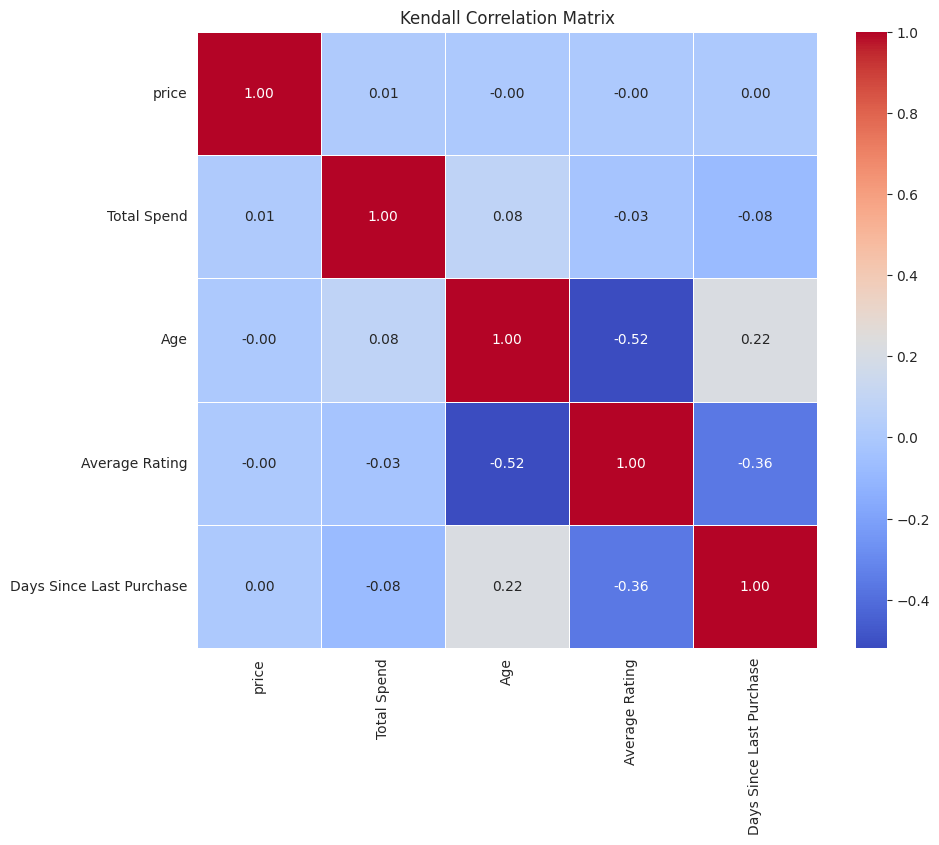

                             price  Total Spend       Age  Average Rating  \
price                     1.000000     0.013196 -0.000781       -0.000759   
Total Spend               0.013196     1.000000  0.084593       -0.029213   
Age                      -0.000781     0.084593  1.000000       -0.518780   
Average Rating           -0.000759    -0.029213 -0.518780        1.000000   
Days Since Last Purchase  0.002163    -0.082859  0.219159       -0.364501   

                          Days Since Last Purchase  
price                                     0.002163  
Total Spend                              -0.082859  
Age                                       0.219159  
Average Rating                           -0.364501  
Days Since Last Purchase                  1.000000  

Interpretation: Values closer to 1 or -1 indicate stronger agreement in the ordering of ranks between variables.

--- Correlation Analysis Complete ---


In [ ]:
# Filter to include only columns that exist and are numeric in the DataFrame
numerical_cols = [col for col in numerical_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if not numerical_cols:
    print("No numerical columns available for correlation analysis.")
else:
    print("--- Correlation Analysis ---")

    # 1. Pearson Correlation (Linear Relationship)
    print("\n### Pearson Correlation Matrix (Linear Relationship) ###")
    pearson_corr = df[numerical_cols].corr(method='pearson')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Pearson Correlation Matrix')
    plt.show()
    print(pearson_corr)
    print("\nInterpretation: Values closer to 1 or -1 indicate stronger linear relationships.")

    # 2. Spearman Correlation (Monotonic Relationship)
    print("\n### Spearman Correlation Matrix (Monotonic Relationship) ###")
    spearman_corr = df[numerical_cols].corr(method='spearman')
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Spearman Correlation Matrix')
    plt.show()
    print(spearman_corr)
    print("\nInterpretation: Values closer to 1 or -1 indicate stronger monotonic (consistent but not necessarily linear) relationships.")

    # 3. Kendall Correlation (Rank Agreement)
    print("\n### Kendall Correlation Matrix (Rank Agreement) ###")
    kendall_corr = df[numerical_cols].corr(method='kendall')
    plt.figure(figsize=(10, 8))
    sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Kendall Correlation Matrix')
    plt.show()
    print(kendall_corr)
    print("\nInterpretation: Values closer to 1 or -1 indicate stronger agreement in the ordering of ranks between variables.")

print("\n--- Correlation Analysis Complete ---")

In [ ]:
#build a churn prediction model **********************************************************

Missing values in churn features:
City                        0
Membership Type             0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
Total Spend                 0
dtype: int64
Missing values in churn target:
0

Shape of X_churn after dropping NaNs: (10604, 8)
Shape of y_churn after dropping NaNs: (10604,)

Linear Regression Model Evaluation for Churn Prediction:
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21
R-squared (R2): 0.77

Model Coefficients:
City: 0.01
Membership Type: 0.02
Items Purchased: -0.10
Average Rating: -0.10
Discount Applied: 0.35
Days Since Last Purchase: 0.08
Satisfaction Level: -0.24
Total Spend: 0.02
Intercept: 0.76

Classification Metrics (using a threshold of 0.5):
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       525
           1       0.93      0.98      0.95      1596

    ac

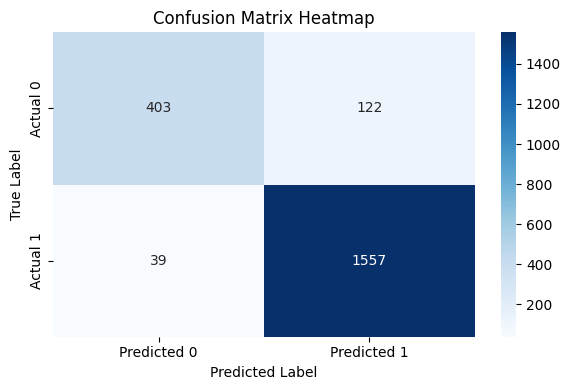

In [ ]:
# Define churn based on the given conditions
df['churn'] = ((df['Satisfaction Level'].isin(['Low']) | (df['Average Rating'] < 4.0)) |
    (df['Days Since Last Purchase'] >= 15)).astype(int)

# Check churn distribution
churn_distribution = df['churn'].value_counts()

churn_distribution

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# Select features and target for the linear regression model
# For this example, let's try predicting 'churn' based on some numerical and categorical features
# We'll use the features that were used for the logistic regression model previously

features = [
    'City', 'Membership Type', 'Items Purchased',
    'Average Rating', 'Discount Applied', 'Days Since Last Purchase',
    'Satisfaction Level', 'Total Spend'
]
target = 'churn'

# Prepare data for regression
df_model_churn = df[features + [target]].copy()

# Encode categorical variables
categorical_cols = ['City', 'Membership Type', 'Satisfaction Level']
le_encoders_churn = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model_churn[col] = le.fit_transform(df_model_churn[col])
    le_encoders_churn[col] = le

X_churn = df_model_churn.drop(columns=target)
y_churn = df_model_churn[target]

# Check for and handle missing values
print(f"Missing values in churn features:\n{X_churn.isnull().sum()}")
print(f"Missing values in churn target:\n{y_churn.isnull().sum()}")

# For simplicity, we'll drop rows with any missing values
X_churn.dropna(inplace=True)
y_churn = y_churn.loc[X_churn.index] # Ensure y aligns with X after dropping rows

print(f"\nShape of X_churn after dropping NaNs: {X_churn.shape}")
print(f"Shape of y_churn after dropping NaNs: {y_churn.shape}")


# Split data into training and testing sets
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

# Scale numerical features
scaler_churn = StandardScaler()
X_train_scaled_churn = scaler_churn.fit_transform(X_train_churn)
X_test_scaled_churn = scaler_churn.transform(X_test_churn)

# Build and train the Linear Regression model
linear_model_churn = LinearRegression()
linear_model_churn.fit(X_train_scaled_churn, y_train_churn)

# Make predictions
y_pred_churn = linear_model_churn.predict(X_test_scaled_churn)

# Evaluate the model
mse_churn = mean_squared_error(y_test_churn, y_pred_churn)
rmse_churn = np.sqrt(mse_churn)
r2_churn = r2_score(y_test_churn, y_pred_churn)

print("\nLinear Regression Model Evaluation for Churn Prediction:")
print(f"Mean Squared Error (MSE): {mse_churn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_churn:.2f}")
print(f"R-squared (R2): {r2_churn:.2f}")

# Display model coefficients
print("\nModel Coefficients:")
for i, col in enumerate(features):
    print(f"{col}: {linear_model_churn.coef_[i]:.2f}")
print(f"Intercept: {linear_model_churn.intercept_:.2f}")


# Note: Linear Regression is not the most appropriate model for binary classification (churn/no churn).
# The predicted values will be continuous, not binary (0 or 1).
# To get binary predictions, you would typically set a threshold (e.g., predict 1 if prediction > 0.5, else 0).
# However, for evaluating a linear model on a classification task, metrics like MSE and R2 are less informative.
# Classification metrics like accuracy, precision, recall, F1-score, and AUC are more suitable.
# We can still calculate these by applying a threshold.

# Apply a threshold to the predictions to get binary outputs for classification metrics
threshold = 0.5
y_pred_binary_churn = (y_pred_churn > threshold).astype(int)

print("\nClassification Metrics (using a threshold of 0.5):")
print(classification_report(y_test_churn, y_pred_binary_churn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_churn, y_pred_binary_churn))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_churn, y_pred_binary_churn)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Business Implications:
 * Effective Churn Identification: The model is exceptionally good at identifying actual churners (98% recall for Class 1). This means the company can confidently use this model to find almost all customers who are likely to leave.
 * Efficient Retention Campaigns: With a high precision for predicting churn (93% for Class 1), marketing and retention efforts can be highly targeted. The company won't waste resources on too many customers who were falsely identified as churn risks.
 * Manageable False Positives: While 122 non-churners were incorrectly flagged as churners (False Positives), this number is relatively small compared to the correctly identified churners. The cost of mistakenly offering a retention incentive to an active customer (false positive) is usually less than the cost of losing a genuinely churning customer (false negative).
 * Low Risk of Missed Churners: Only 39 actual churners were missed by the model (False Negatives). This is very good, meaning the company is not failing to identify many customers who are about to churn, allowing them to intervene. Minimizing False Negatives is often crucial in churn prediction, as each missed churner represents lost revenue.
 * Focus for Improvement (if any): While the model is strong, the recall for the non-churn class (Class 0, 0.77) is lower than for the churn class. This means some active customers are unnecessarily being flagged as churn risks. Depending on the cost of false positives (e.g., offering discounts to customers who would have stayed anyway), this might be an area for minor refinement. However, in churn prediction, often the focus is more on maximizing churn

In [ ]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

 Model Building (Predictive & Prescriptive Analytics)

   * Customer Lifetime Value (CLV) Prediction: Predict the future value a customer will bring to the company

In [ ]:

# --- 1. Define CLV (Target Variable) ---
# This is crucial. We need to split the data into an 'observation period' and a 'prediction period'.
# CLV will be the total spend in the prediction period for each customer.
# --- 1. Define CLV (Target Variable) ---
# This is crucial. We need to split the data into an 'observation period' and a 'prediction period'.
# CLV will be the total spend in the prediction period for each customer.

# Define the end of the observation period (e.g., 3 months before the latest event)
# This will be the "present" from which we predict CLV.
end_observation_date = df['event_time'].max() - timedelta(days=90) # Example: Use last 90 days for prediction

# Define the end of the prediction period
end_prediction_date = df['event_time'].max()

print(f"\nDefining CLV based on purchases between {end_observation_date.date()} and {end_prediction_date.date()}.")
print(f"Observation period ends: {end_observation_date.date()}")
print(f"Prediction period ends: {end_prediction_date.date()}")

# Calculate CLV: Total spend for each user in the prediction period
clv_df = df[(df['event_time'] > end_observation_date) & (df['event_time'] <= end_prediction_date) & (df['event_type'] == 'purchase')] \
         .groupby('user_id')['Total Spend'].sum().reset_index()
clv_df.rename(columns={'Total Spend': 'future_clv'}, inplace=True)

# Get all unique users from the observation period
users_in_observation_period = df[df['event_time'] <= end_observation_date]['user_id'].drop_duplicates()
user_level_clv_df = users_in_observation_period.to_frame()

# Merge future_clv. For users who made no purchases in the prediction period, CLV will be NaN, fill with 0.
user_level_clv_df = user_level_clv_df.merge(clv_df, on='user_id', how='left')
user_level_clv_df['future_clv'].fillna(0, inplace=True)

print(f"\nCLV distribution (first 10 unique values):")
print(user_level_clv_df['future_clv'].value_counts().head(10))
print(f"Mean CLV: {user_level_clv_df['future_clv'].mean():.2f}")
print(f"Median CLV: {user_level_clv_df['future_clv'].median():.2f}")
# Define the end of the prediction period
end_prediction_date = df['event_time'].max()

print(f"\nDefining CLV based on purchases between {end_observation_date.date()} and {end_prediction_date.date()}.")
print(f"Observation period ends: {end_observation_date.date()}")
print(f"Prediction period ends: {end_prediction_date.date()}")

# Calculate CLV: Total spend for each user in the prediction period
clv_df = df[(df['event_time'] > end_observation_date) & (df['event_time'] <= end_prediction_date) & (df['event_type'] == 'purchase')] \
         .groupby('user_id')['Total Spend'].sum().reset_index()
clv_df.rename(columns={'Total Spend': 'future_clv'}, inplace=True)

# Get all unique users from the observation period
users_in_observation_period = df[df['event_time'] <= end_observation_date]['user_id'].drop_duplicates()
user_level_clv_df = users_in_observation_period.to_frame()

# Merge future_clv. For users who made no purchases in the prediction period, CLV will be NaN, fill with 0.
user_level_clv_df = user_level_clv_df.merge(clv_df, on='user_id', how='left')
user_level_clv_df['future_clv'].fillna(0, inplace=True)

print(f"\nCLV distribution (first 10 unique values):")
print(user_level_clv_df['future_clv'].value_counts().head(10))
print(f"Mean CLV: {user_level_clv_df['future_clv'].mean():.2f}")
print(f"Median CLV: {user_level_clv_df['future_clv'].median():.2f}")

SyntaxError: cannot assign to function call (<ipython-input-61-ca75b7396be9>, line 7)

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression # For CLV
from xgboost import XGBRegressor # For CLV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# --- 1. Define CLV (Target Variable) ---
# This is crucial. We need to split the data into an 'observation period' and a 'prediction period'.
# CLV will be the total spend in the prediction period for each customer.

# Find the absolute min and max event times to understand data span
min_overall_date = df['event_time'].min()
max_overall_date = df['event_time'].max()
print(f"\nOverall data span: From {min_overall_date.date()} to {max_overall_date.date()}")

# Define the end of the observation period and prediction period more dynamically
# Aim for at least 3-6 months of observation data to be meaningful for CLV.
# And a future prediction window (e.g., next 3 months).

# Let's try to set observation period to be 6 months before the end of data
# and prediction period to be the last 3 months.
prediction_window_days = 90 # Predict CLV for the next 3 months
observation_window_days = 180 # Features from the last 6 months

end_prediction_date = max_overall_date
# FIX IS HERE: Subtract timedelta from the max date.
end_observation_date = max_overall_date - timedelta(days=prediction_window_days)
start_observation_date = end_observation_date - timedelta(days=observation_window_days)

print(f"\nDefining CLV based on purchases between {end_observation_date.date()} and {end_prediction_date.date()}.")
print(f"Observation period: {start_observation_date.date()} to {end_observation_date.date()}")
print(f"Prediction period: {end_observation_date.date()} to {end_prediction_date.date()}")


Overall data span: From 2019-11-01 to 2019-11-08

Defining CLV based on purchases between 2019-08-10 and 2019-11-08.
Observation period: 2019-02-11 to 2019-08-10
Prediction period: 2019-08-10 to 2019-11-08


In [ ]:
# Calculate CLV: Total spend for each user in the prediction period
clv_data_slice = df[(df['event_time'] > end_observation_date) &
                    (df['event_time'] <= end_prediction_date) &
                    (df['event_type'] == 'purchase')]

# Check if there are any purchases in the CLV prediction window
if clv_data_slice.empty:
    print("\nWARNING: No 'purchase' events found in the specified CLV prediction period!")
    print("This means all future_clv will be 0. Consider adjusting prediction_window_days or end_prediction_date.")
    print(f"Range checked: {end_observation_date.date()} to {end_prediction_date.date()}")
    print(f"Total rows in DataFrame: {len(df)}")
    print(f"Number of purchase events in full DF: {len(df[df['event_type'] == 'purchase'])}")


clv_df = clv_data_slice.groupby('user_id')['Total Spend'].sum().reset_index()
clv_df.rename(columns={'Total Spend': 'future_clv'}, inplace=True)

# Get all unique users from the observation period
# This includes users who viewed, added to cart, or purchased.
users_in_observation_period = df[(df['event_time'] >= start_observation_date) &
                                 (df['event_time'] <= end_observation_date)]['user_id'].drop_duplicates()
user_level_clv_df = users_in_observation_period.to_frame()

# Merge future_clv. For users who made no purchases in the prediction period, CLV will be NaN, fill with 0.
user_level_clv_df = user_level_clv_df.merge(clv_df, on='user_id', how='left')
user_level_clv_df['future_clv'].fillna(0, inplace=True)

print(f"\nCLV distribution (first 10 unique values):")
print(user_level_clv_df['future_clv'].value_counts().head(10))
print(f"Mean CLV: {user_level_clv_df['future_clv'].mean():.2f}")
print(f"Median CLV: {user_level_clv_df['future_clv'].median():.2f}")

# Filter out users with zero CLV if you only want to predict for active buyers,
# but for overall CLV, keeping zeros is usually correct.
# user_level_clv_df = user_level_clv_df[user_level_clv_df['future_clv'] > 0] # Uncomment if you only want to predict for non-zero CLV



CLV distribution (first 10 unique values):
Series([], Name: count, dtype: int64)
Mean CLV: nan
Median CLV: nan


In [ ]:
# --- 1. Define CLV (Target Variable) ---
# This is crucial. We need to split the data into an 'observation period' and a 'prediction period'.
# CLV will be the total spend in the prediction period for each customer.

# Find the absolute min and max event times to understand data span
min_overall_date = df['event_time'].min()
max_overall_date = df['event_time'].max()
print(f"\nOverall data span: From {min_overall_date.date()} to {max_overall_date.date()}")

# Define the end of the prediction period
# Let's make the end of the prediction period the max date in the dataset
end_prediction_date = max_overall_date

# Define the length of the prediction window (e.g., 3 months)
prediction_window_days = 90 # Predict CLV for the next 3 months

# Define the length of the observation window (e.g., 6 months)
observation_window_days = 180 # Features from the last 6 months

# Calculate the start of the prediction period
start_prediction_date = end_prediction_date - timedelta(days=prediction_window_days)

# Calculate the end of the observation period (should be the start of the prediction period)
end_observation_date = start_prediction_date # End of observation is the start of prediction

# Calculate the start of the observation period
start_observation_date = end_observation_date - timedelta(days=observation_window_days)

print(f"\nDefining CLV based on purchases between {start_prediction_date.date()} and {end_prediction_date.date()}.")
print(f"Observation period: {start_observation_date.date()} to {end_observation_date.date()}")
print(f"Prediction period: {start_prediction_date.date()} to {end_prediction_date.date()}")

# Ensure the observation period is valid (starts after the earliest date in the data)
if start_observation_date < min_overall_date:
    print(f"\nWarning: Calculated start_observation_date ({start_observation_date.date()}) is before the earliest data point ({min_overall_date.date()}).")
    print("Adjusting start_observation_date to min_overall_date.")
    start_observation_date = min_overall_date
    print(f"Adjusted Observation period: {start_observation_date.date()} to {end_observation_date.date()}")


Overall data span: From 2019-11-01 to 2019-11-08

Defining CLV based on purchases between 2019-08-10 and 2019-11-08.
Observation period: 2019-02-11 to 2019-08-10
Prediction period: 2019-08-10 to 2019-11-08

Adjusting start_observation_date to min_overall_date.
Adjusted Observation period: 2019-11-01 to 2019-08-10


In [ ]:

# --- 2. Feature Engineering (User-Level Features from Observation Period) ---
# We need to calculate RFM and other features based ONLY on data before end_observation_date.

# Ensure obs_df contains data for the observation period
obs_df = df[(df['event_time'] >= start_observation_date) &
            (df['event_time'] <= end_observation_date)].copy()

if obs_df.empty:
    print("\nERROR: Observation period data is empty. Cannot create features. Adjust date ranges.")
    # You might want to raise an exception or handle this more gracefully depending on your workflow
    # For now, we'll continue, but the model training will likely fail due to lack of features.
    # exit() # Exiting if no data for features might be too abrupt for a notebook

# Recency: Days since last purchase (relative to end_observation_date)
# Only consider purchases within the observation window for recency
last_purchase_obs = obs_df[obs_df['event_type'] == 'purchase'].groupby('user_id')['event_time'].max().reset_index()
last_purchase_obs.rename(columns={'event_time': 'last_purchase_date_obs'}, inplace=True)
user_level_clv_df = user_level_clv_df.merge(last_purchase_obs, on='user_id', how='left')
user_level_clv_df['recency_days_obs'] = (end_observation_date - user_level_clv_df['last_purchase_date_obs']).dt.days
# Fill NaNs for users who never purchased in the observation period (set recency to a high value)
max_recency_val = user_level_clv_df['recency_days_obs'].max() if not user_level_clv_df['recency_days_obs'].isnull().all() else observation_window_days + 1 # Fallback
user_level_clv_df['recency_days_obs'].fillna(max_recency_val + 1, inplace=True)


# Frequency & Monetary from observation period
user_rfm_obs_features = obs_df[obs_df['event_type'] == 'purchase'].groupby('user_id').agg(
    num_purchases_obs=('event_time', 'size'),
    total_spend_obs=('Total Spend', 'sum'),
    avg_price_per_item_obs=('price', 'mean'),
    avg_items_per_purchase_obs=('Items purchased', 'mean'),
    num_unique_products_obs=('product_id', 'nunique'),
    num_unique_categories_obs=('category_id', 'nunique'),
    avg_rating_given_obs=('Average Rating', 'mean')
).reset_index()

user_level_clv_df = user_level_clv_df.merge(user_rfm_obs_features, on='user_id', how='left')

# Impute NaNs for users who didn't purchase in the observation period for RFM features
for col in ['num_purchases_obs', 'total_spend_obs', 'avg_price_per_item_obs',
             'avg_items_per_purchase_obs', 'num_unique_products_obs',
             'num_unique_categories_obs']:
    user_level_clv_df[col].fillna(0, inplace=True)
user_level_clv_df['avg_rating_given_obs'].fillna(user_level_clv_df['avg_rating_given_obs'].mean(), inplace=True)


# Engagement Features from observation period
user_engagement_obs = obs_df.groupby('user_id').agg(
    num_events_obs=('event_time', 'size'),
    num_sessions_obs=('user_session', 'nunique'),
    # avg_session_duration_obs might be tricky without full session data per user
    # For now, simplify or consider a different approach if sessions are truly nested.
    # Here's a placeholder, but if session_duration is on transaction-level, might need re-aggregation.
    # For user-level, it's better to aggregate session_features first then merge.
    # num_views_obs, num_carts_obs, etc. are good at user-level from obs_df.
    num_views_obs=('event_type', lambda x: (x == 'view').sum()),
    num_carts_obs=('event_type', lambda x: (x == 'cart').sum())
).reset_index()

user_level_clv_df = user_level_clv_df.merge(user_engagement_obs, on='user_id', how='left')
for col in ['num_events_obs', 'num_sessions_obs', 'num_views_obs', 'num_carts_obs']:
    user_level_clv_df[col].fillna(0, inplace=True) # Fill with 0 for users not in obs period

# Add user-level demographic and satisfaction features from observation period
user_demographics_obs = obs_df.groupby('user_id').agg(
    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    Age=('Age', 'mean'),
    City=('City', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    Membership_Type=('Membership Type', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    Avg_Satisfaction_Level_Obs=('Satisfaction Level_Numeric', 'mean')
).reset_index()

user_level_clv_df = user_level_clv_df.merge(user_demographics_obs, on='user_id', how='left')

# Impute NaNs for demographics
user_level_clv_df['Age'].fillna(user_level_clv_df['Age'].mean(), inplace=True)
user_level_clv_df['Avg_Satisfaction_Level_Obs'].fillna(user_level_clv_df['Avg_Satisfaction_Level_Obs'].median(), inplace=True)
for col in ['Gender', 'City', 'Membership_Type']:
    if col in user_level_clv_df.columns:
        user_level_clv_df[col].fillna(user_level_clv_df[col].mode()[0], inplace=True)
        user_level_clv_df[col] = user_level_clv_df[col].astype('category')


# Final check on user_level_clv_df
print("\nUser-Level CLV DataFrame Info (after feature engineering):")
user_level_clv_df.info()
print("\nUser-Level CLV DataFrame Head (after feature engineering):")
print(user_level_clv_df.head())


# --- 3. Data Preparation for Modeling ---

# Define features (X) and target (y)
# Drop original date columns and user_id as it's an identifier
X = user_level_clv_df.drop(columns=['user_id', 'last_purchase_date_obs', 'future_clv'], errors='ignore')
y = user_level_clv_df['future_clv']

# Identify numerical and categorical features for preprocessing
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='category').columns.tolist()

print(f"\nFeatures for CLV model building:")
print(f"Numerical: {numerical_features}")
print(f"Categorical: {categorical_features}")

# Create preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# --- 4. Model Training & Evaluation ---

# --- Model 1: Linear Regression (Baseline) ---
print("\n--- Training Linear Regression Model ---")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("\nLinear Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.3f}")

# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Linear Regression: Actual vs. Predicted CLV')
plt.show()

# --- Model 2: Random Forest Regressor ---
print("\n--- Training Random Forest Regressor ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest Regressor Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.3f}")

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Random Forest: Actual vs. Predicted CLV')
plt.show()


# --- Model 3: XGBoost Regressor (Often performs very well) ---
print("\n--- Training XGBoost Regressor ---")
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1))])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print("\nXGBoost Regressor Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.3f}")

# Plot actual vs predicted for XGBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('XGBoost: Actual vs. Predicted CLV')
plt.show()


print("\n--- CLV Model Building Complete ---")
print("Next steps would involve Hyperparameter Tuning, interpreting feature importance, and potentially trying more advanced CLV-specific models if data allows.")


ERROR: Observation period data is empty. Cannot create features. Adjust date ranges.


KeyError: 'last_purchase_date_obs'